<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Function-for-plotting-phylogeny" data-toc-modified-id="Function-for-plotting-phylogeny-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Function for plotting phylogeny</a></span></li><li><span><a href="#Import-fitness-and-acquisition-age-(for-labelling-phylogeny)" data-toc-modified-id="Import-fitness-and-acquisition-age-(for-labelling-phylogeny)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import fitness and acquisition age (for labelling phylogeny)</a></span></li><li><span><a href="#Draw-phylogeny" data-toc-modified-id="Draw-phylogeny-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Draw phylogeny</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [35]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
import ast
from ast import literal_eval

In [4]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Helvetica'

In [5]:
#define the colors from colorbrewer2
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'

In [6]:
mutation_classes = {'NPM1': 'NPM1',
                   'DNMT3A': 'DNA methylation',
                   'TET2': 'DNA methylation',
                   'IDH1': 'DNA methylation',
                   'IDH2': 'DNA methylation',
                   'ASXL1': 'Chromatin modifiers',
                   'EZH2': 'Chromatin modifiers',
                   'RUNX1': 'Transcription factors',
                   'CEBPA': 'Transcription factors',
                   'GATA2': 'Transcription factors',
                   'BCOR': 'Transcriptional corepressors',
                   'BCORL1': 'Transcriptional corepressors',
                   'TP53': 'Tumour suppressor',
                   'PPM1D': 'Tumour suppressor',
                   'CHEK2': 'Tumour suppressor',
                   'WT1': 'Tumour suppressor',
                   'CBL': 'Tumour suppressor',
                   'DDX41': 'Tumour suppressor',
                   'SRSF2': 'Spliceosome',
                   'SF3B1': 'Spliceosome',
                   'U2AF1': 'Spliceosome',
                   'ZRSR2': 'Spliceosome',
                   'RAD21': 'Cohesin',
                   'STAG2': 'Cohesin',
                   'FLT3': 'Cell signalling',
                   'KIT': 'Cell signalling',
                   'JAK2': 'Cell signalling',
                   'KRAS': 'Cell signalling',
                   'NRAS': 'Cell signalling',
                   'PTPN11': 'Cell signalling',
                   'CSF3R': 'Cell signalling',
                   'GNB1': 'Cell signalling',
                   'GNAS': 'Cell signalling',
                   'MPL': 'Cell signalling',
                    'mCA': 'mCA',
                   '15q CNLOH': 'mCA',
                   '4q CNLOH': 'mCA',
                   '4 gain?': 'mCA',
                   'X gain': 'mCA',
                    'chrX': 'mCA',
                    'chr19p': 'mCA',
                    'chr9p': 'mCA',
                    'chr7q': 'mCA',
                    'chr4': 'mCA',
                    'chr4q': 'mCA',
                    'chr15q': 'mCA',
                   '19p CNLOH': 'mCA',
                   '9p CNLOH': 'mCA',
                   '7q CNLOH': 'mCA',
                   'X': 'missing driver',
                   'Z': 'missing driver 2'}

In [11]:
#create a dictionary of the sample details
cases = {} #e.g. {'C92_002': ['C92_002_s1', 'C92_002_s2', 'C92_002_s3', 'C92_002_s4'....]}
controls = {} #e.g. {'CNTRL_001': ['CNTRL_001_s1', 'CNTRL_001_s10', 'CNTRL_001_s2'...]}
cases_and_controls = {}
sample_ages = {} #e.g. {'C92_002_s1': 73.73, 'C92_002_s2': 75.0, 'C92_002_s3': 75.83...}
sample_diagnosis_age = {} #e.g. {'C92_002': 81.1, 'C92_003': 75.21, 'C92_005': 70.09...}
sample_DNA_amount = {} #e.g. {'C92_002_s1': '45', 'C92_002_s2': '50', 'C92_002_s3': '50'...}
matched_sample = {} #e.g. {'C92_002': 'CNTRL_169', 'C92_003': 'CNTRL_002'...}

with open('Data_files/UKCTOCS_samples_processed_information.csv') as csvfile:
    readreader = csv.reader(csvfile)
    row_count=0
    for row in readreader:
        if row_count>0:
            sample_name = row[1].split('_')[0]+'_'+row[1].split('_')[1]
            timepoint = row[1]
            sample_ages[timepoint]=float(row[6])
            sample_DNA_amount[timepoint]=row[2]
            if row[7]!='':
                if '_' in row[7]:
                    matched_sample_name = row[7].split('_')[0]+'_'+row[7].split('_')[1]
                    matched_sample[sample_name]=matched_sample_name
                    
            if sample_name in cases_and_controls.keys():
                cases_and_controls[sample_name].append(timepoint)
            else:
                cases_and_controls[sample_name]=[timepoint]
                    
            if row[0]=='Case':
                if sample_name in cases.keys():
                    cases[sample_name].append(timepoint)
                else:
                    cases[sample_name]=[timepoint]
                    
                sample_diagnosis_age[sample_name]=float(row[5])
                
            if row[0]=='Control':
                if sample_name in controls.keys():
                    controls[sample_name].append(timepoint)
                else:
                    controls[sample_name]=[timepoint]
                if sample_name in matched_sample.keys():
                    sample_diagnosis_age[sample_name]=sample_diagnosis_age[matched_sample[sample_name]]

        row_count+=1
        
cases_and_controls_sorted = {}
for k, v in cases_and_controls.items():
    ages_sorted = []
    for i in v:
        timepoint_number = int(i.split('_')[2][1:])
        ages_sorted.append((timepoint_number, i))
    sorted_v = sorted(ages_sorted, reverse = False)
    cases_and_controls_sorted[k]=[]
    for i in sorted_v:
        cases_and_controls_sorted[k].append(i[1])

# cases_and_controls_sorted

In [31]:
multiple_mutant_clone_colors = {1: {1: ['#6ba3d6'],
                                   2: ['#2171b5', '#9ecae1'],
                                   3: ['#08306b', '#2171b5', '#9ecae1'],
                                   4: ['#08306b', '#2171b5', '#9ecae1', '#deebf7'],
                                   5: ['#08306b', '#08519c', '#4292c6', '#9ecae1', '#deebf7']},
                               2: {1: ['#41ab5d'],
                                  2: ['#006d2c', '#74c476'],
                                  3: ['#00441b', '#238b45', '#a1d99b'],
                                  4: ['#00441b', '#238b45', '#a1d99b', '#e5f5e0']},
                               3: {1: ['#fd8d3c'],
                                  2: ['#ec7014', '#fed976'],
                                  3: ['#cc4c02', '#fe9929', '#fee391'],
                                  4: ['#993404', '#ec7014', '#fec44f', '#ffeda0'],
                                  5: ['#662506', '#cc4c02', '#fe9929', '#fed976', '#fff7bc'],
                                  6: ['#662506', '#993404', '#cc4c02', '#fe9929', '#fed976', '#fff7bc']},
                               4: {1: ['#da2b2b'],
                                  2: ['#bc2221', '#f0a1a1'],
                                  3: ['#bc2221', '#e9807f', '#fad4d4'],
                                  4: ['#9b191c', '#da2b2b', '#f0a1a1', '#fad4d4'],
                                  5: ['#791614', '#b9181f', '#eb5770', '#f3a0a3', '#fad4d4']},
                               5: {1: ['#834594'],
                                  2: ['#834594', '#ba9bc9']},
                               6: {1: ['#4e4d4d']}}

In [32]:
dark_colors = ['#4292c6',
 '#2171b5',
 '#08306b',
 '#08519c',
 '#41ab5d',
 '#238b45',
 '#006d2c',
 '#00441b',
 '#cc4c02',
 '#ec7014',
 '#662506',
 '#993404',
 '#da2b2b',
 '#bc2221',
 '#9b191c',
 '#791614',
 '#b9181f',
'#eb5770',
 '#834594',
 '#4e4d4d']

In [33]:
light_colors = []
for k, v in multiple_mutant_clone_colors.items():
    for number, colors in v.items():
        for i in colors:
            if i not in dark_colors:
                if i not in light_colors:
                    light_colors.append(i)

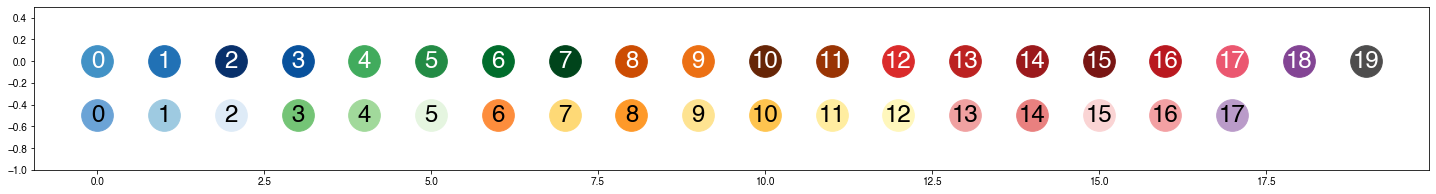

In [34]:
#plot colors
fig, ax1 = plt.subplots(1, 1, figsize = (25, 3))

i = 0
for color in dark_colors:
    ax1.scatter(i, 0, s = 1000, color = color)
    ax1.annotate(i, xy = (i, 0), xycoords = 'data',
                 xytext = (i, 0), ha = "center", va = 'center', zorder = 100, fontsize = 24, color = 'white')
    i+=1
    
i = 0
for color in light_colors:
    ax1.scatter(i, -0.5, s = 1000, color = color)
    ax1.annotate(i, xy = (i, -0.5), xycoords = 'data',
                 xytext = (i, -0.5), ha = "center", va = 'center', zorder = 100, fontsize = 24, color = 'k')
    i+=1
    
ax1.set_ylim(-1, 0.5)
    
plt.show()

# Function for plotting phylogeny

In [24]:
def establishment_age(variant, sample_name):
    establishment_time = ''
    for clone, est_time in optimiser_df_d[sample_name]['Establishment_times'].items():
        if clone[-1]==variant:
            establishment_time = (int(est_time))

    return establishment_time

In [25]:
def plot_phylogenies_v2(sample_name, optimiser_results, dark_colors):
    phylogeny_df = pd.read_csv('Data_files/Phylogeny_csvs/'+sample_name+'_phylogenies_version_14.csv', index_col=None)
    phylogeny_df = phylogeny_df.fillna('')
    phylogeny_df['siblings'] = phylogeny_df['siblings'].apply(literal_eval)
    phylogeny_df['est_time']=phylogeny_df['Unnamed: 0'].apply(establishment_age, sample_name = sample_name)
    phylogeny_df = phylogeny_df.set_index('Unnamed: 0')
    phylogeny_df = phylogeny_df.sort_values(by=['mutations_in_clone', 'est_time'])
    full_phylogeny_d = phylogeny_df.to_dict(orient = 'index')
    
    helvetica_4_5 = 28
    
    variants_s_t = {}
    variant_fitness = {}
    
    #Get the fitness and establishment time of the final variant in the clone
    for variant in full_phylogeny_d.keys():
        for clone, fitness in optimiser_results[sample_name]['Fitnesses'].items():
            if clone[-1]==variant:
                variants_s_t[variant]={'Fitness': int(fitness*100), 'Est_time': int(optimiser_results[sample_name]['Establishment_times'][clone])}
                variant_fitness[variant]=int(fitness*100)
                
    #Get the dominant path to AML
    sorted_variant_fitness = {k: v for k, v in sorted(variant_fitness.items(), key=lambda item: item[1], reverse = True)}
    sorted_variants_by_fitness = []
    for k in sorted_variant_fitness.keys():
        sorted_variants_by_fitness.append(k)
        
    fittest_variant = sorted_variants_by_fitness[0]
    
    print('fittest variant = ', fittest_variant)
    
    fittest_parent = full_phylogeny_d[fittest_variant]['parent']
    
    AML_ancestors = [fittest_variant] #start a list of the AML clone ancestors
    
    variant_in_AML_clone = fittest_variant
    while full_phylogeny_d[variant_in_AML_clone]['parent'] != '':
        parent = full_phylogeny_d[variant_in_AML_clone]['parent']
        AML_ancestors.append(parent)
        variant_in_AML_clone = parent
        
    if 'C92' in sample_name:
        print('AML ancestors = ', AML_ancestors)
    
    #create the phylogeny coordinates
    variants_plotted = []
    variant_y_coordinates = {}
    variant_x_coordinates = {}
    variants_with_s_t = []

    number_mutations_coordinates_list = {}
    coordinates_plotted={}
    number_of_mutations = []
    number_of_siblings = []
    
    variant_number_mutations_in_clone = {}

    for k, v in full_phylogeny_d.items():
        number_of_mutations.append(v['mutations_in_clone'])
        number_of_siblings.append(len(v['siblings']))
        variant_number_mutations_in_clone[k]=v['mutations_in_clone']
                
        if k == 'stem cells':
            variant_y_coordinates[k]=0
            variant_x_coordinates[k]=0
        else:
            parent = v['parent']
            parent_y_coordinates = variant_y_coordinates[parent]
            
            if parent == 'stem cells':
                variant_y_coordinates[k]=parent_y_coordinates-1
            else:
                variant_y_coordinates[k]=parent_y_coordinates-1.2

            parent_x_coordinates = variant_x_coordinates[parent]
            number_siblings = len(v['siblings'])
            if number_siblings == 0:
                variant_x_coordinates[k]=parent_x_coordinates
            else:
                number_mutations = v['mutations_in_clone']
                siblings_each_side_of_parent = (number_siblings+1)/2
                coordinates_list = np.linspace(parent_x_coordinates-siblings_each_side_of_parent, parent_x_coordinates+siblings_each_side_of_parent, number_siblings+1)
                if number_mutations in number_mutations_coordinates_list.keys():
                    coordinates = number_mutations_coordinates_list[number_mutations] #retrieve the x coordinates for that level of phylogeny
                    for i in coordinates:
                        if i not in coordinates_plotted[number_mutations]: #take the next coordinate not plotted
                            variant_x_coordinates[k]=i
                            coordinates_plotted[number_mutations].append(i)
                            break
                else:
                    number_mutations_coordinates_list[number_mutations]=coordinates_list
                    variant_x_coordinates[k]=coordinates_list[0]
                    coordinates_plotted[number_mutations]=[coordinates_list[0]]

    #plot the phylogeny
    fig, ax1 = plt.subplots(1, 1, figsize = (18, 17))

    x = []
    y = []
    
    variants_with_fitness_est_times = []

    for variant, y_coord in variant_y_coordinates.items():
        x_coord = variant_x_coordinates[variant]
        x.append(x_coord)
        y.append(y_coord)
        color = full_phylogeny_d[variant]['variant color']
        if color in dark_colors:
            text_color = 'white'
        else:
            text_color = 'k'
        if 'chr' in variant:
            variant_label = variant.replace('_', ' ').replace('chr', '')
        elif 'FLT3' in variant:
            variant_label = variant.replace('_', ' ')
        elif variant == 'X':
            variant_label = 'missing driver'
        elif variant == 'Z':
            variant_label = 'missing driver 2'
        else:
            variant_label = variant.split('_')[0]
            
        #Plot the variant
        if 'missing driver' in variant_label:
            ax1.scatter(x_coord, y_coord, color = color, s = 2600, hatch=3*'\\', edgecolor = grey5, zorder = 250)
            ax1.scatter(x_coord, y_coord, color = 'none', s = 2600, edgecolor = 'k', zorder = 260)
        else:
            ax1.scatter(x_coord, y_coord, color = color, s = 2600, edgecolor = 'k', zorder = 250)
        
        #Label with variant, fitness and age
        clone_number_mutations = variant_number_mutations_in_clone[variant]
        if clone_number_mutations ==0:
            ax1.annotate('stem cells', xy = (x_coord, y_coord-0.43), xycoords = 'data', xytext = (0, -1.5),
                         textcoords = 'offset points', ha = "center", va = 'center', 
                         bbox=dict(boxstyle="round", fc="w", ec = 'w', alpha = 0.9, pad = 0.1), zorder = 100, fontsize = helvetica_4_5)
        elif clone_number_mutations ==1:
            ax1.annotate(variant_label, xy = (x_coord, y_coord-0.43), xycoords = 'data', xytext = (0, -1.5),
                         textcoords = 'offset points', ha = "center", va = 'center', 
                         bbox=dict(boxstyle="round", fc="w", ec = 'w', alpha = 0.9, pad = 0.1), zorder = 100, fontsize = helvetica_4_5)
        else:
            ax1.annotate(variant_label, xy = (x_coord, y_coord-0.43), xycoords = 'data', xytext = (0, -1.5),
                         textcoords = 'offset points', ha = "center", va = 'center', 
                         bbox=dict(boxstyle="round", fc="w", ec = 'w', alpha = 0.9, pad = 0.1), zorder = 150, fontsize = helvetica_4_5)
        
        if variant in variants_s_t.keys():
            fitness_effect = variants_s_t[variant]['Fitness']
            establishment_time = variants_s_t[variant]['Est_time']
            ax1.annotate('s: '+str(fitness_effect)+'%', xy = (x_coord, y_coord-0.72), xycoords = 'data', xytext = (0, -1.5),
                         textcoords = 'offset points', ha = "center", va = 'center',  
                         bbox=dict(boxstyle="round", fc="w", ec = 'w', alpha = 0.9, pad = 0.1), zorder = 100, color = '#4c4c4c', fontsize = helvetica_4_5)
            
            ax1.annotate(str(establishment_time), xy = (x_coord, y_coord), xycoords = 'data', color = text_color,
                         xytext = (x_coord, y_coord), ha = "center", va = 'center', zorder = 350, fontsize = helvetica_4_5)

    #plot the phylogeny lines
    for k, v in full_phylogeny_d.items():
        if v['parent']!='':
            parent_x = variant_x_coordinates[v['parent']]
            parent_y = variant_y_coordinates[v['parent']]
            variant_x = variant_x_coordinates[k]
            variant_y = variant_y_coordinates[k]
            if 'C92' in sample_name:
                if (k in AML_ancestors) and (v['parent'] in AML_ancestors):
                    line_width = 5
                else:
                    line_width = 2
            else:
                line_width = 2
                
            if len(v['siblings'])>0:
                ax1.plot([parent_x, parent_x], [parent_y, (variant_y+(parent_y-variant_y)/3)], color = 'k', zorder = 0, lw = line_width)
                ax1.plot([variant_x, variant_x], [(variant_y+(parent_y-variant_y)/3), variant_y,], color = 'k', zorder = 0, lw = line_width)
                ax1.plot([parent_x, variant_x], [(variant_y+(parent_y-variant_y)/3), (variant_y+(parent_y-variant_y)/3)], color = 'k', zorder = 0, lw = line_width)
            else:
                ax1.plot([parent_x, variant_x], [parent_y, variant_y], color = 'k', zorder = 0, lw = line_width)

    for axis in ['top', 'bottom', 'right', 'left']:
        ax1.spines[axis].set_visible(False)

    ax1.set_xlim(-4.5, 4.5)
    ax1.set_ylim(-8, 0.5)

    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False) 

#     plt.tight_layout()
    return plt.show()

# Import fitness and acquisition age (for labelling phylogeny)

In [13]:
# seeds = 25

In [20]:
optimiser_df = pd.read_csv('Data_files/Optimiser_results_v14.txt', sep = '\t', index_col=None)
# optimiser_df = optimiser_df.set_index('Date_time')
optimiser_df = optimiser_df.fillna('')
optimiser_df['Final_seed_likelihoods'] = optimiser_df['Final_seed_likelihoods'].apply(literal_eval)
optimiser_df['Fitnesses'] = optimiser_df['Fitnesses'].apply(literal_eval)
optimiser_df['Establishment_times'] = optimiser_df['Establishment_ages'].apply(literal_eval)
optimiser_df = optimiser_df.set_index('Sample_name')
optimiser_df = optimiser_df[['Fitnesses', 'Establishment_times']]
optimiser_df_d = optimiser_df.to_dict(orient = 'index')
# optimiser_df_d

# Draw phylogeny

C92_002
fittest variant =  TET2_p.Q108Ffs*6
AML ancestors =  ['TET2_p.Q108Ffs*6', 'TET2_p.P869Qfs*4', 'SF3B1_p.K700E', 'DNMT3A_p.Q606X', 'stem cells']


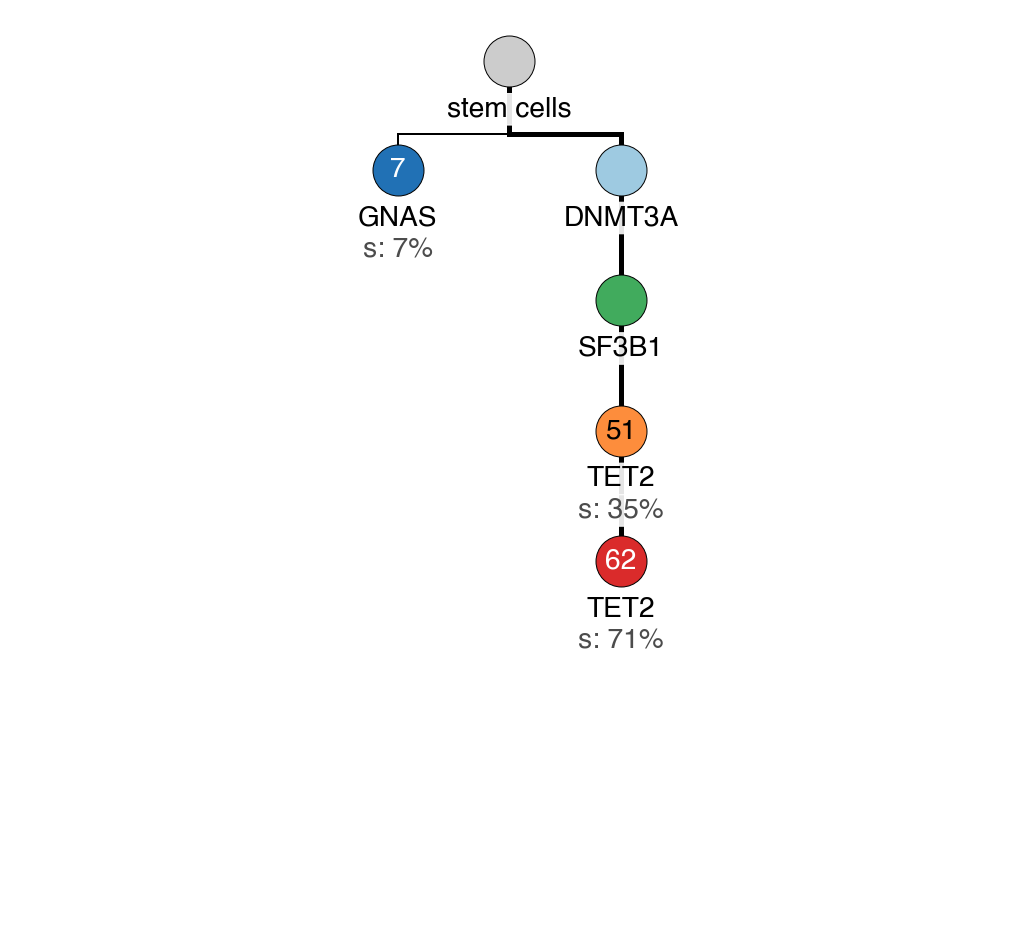

C92_003
fittest variant =  X
AML ancestors =  ['X', 'chr7q_CNLOH', 'DNMT3A_p.P777R', 'DNMT3A_p.R736H', 'stem cells']


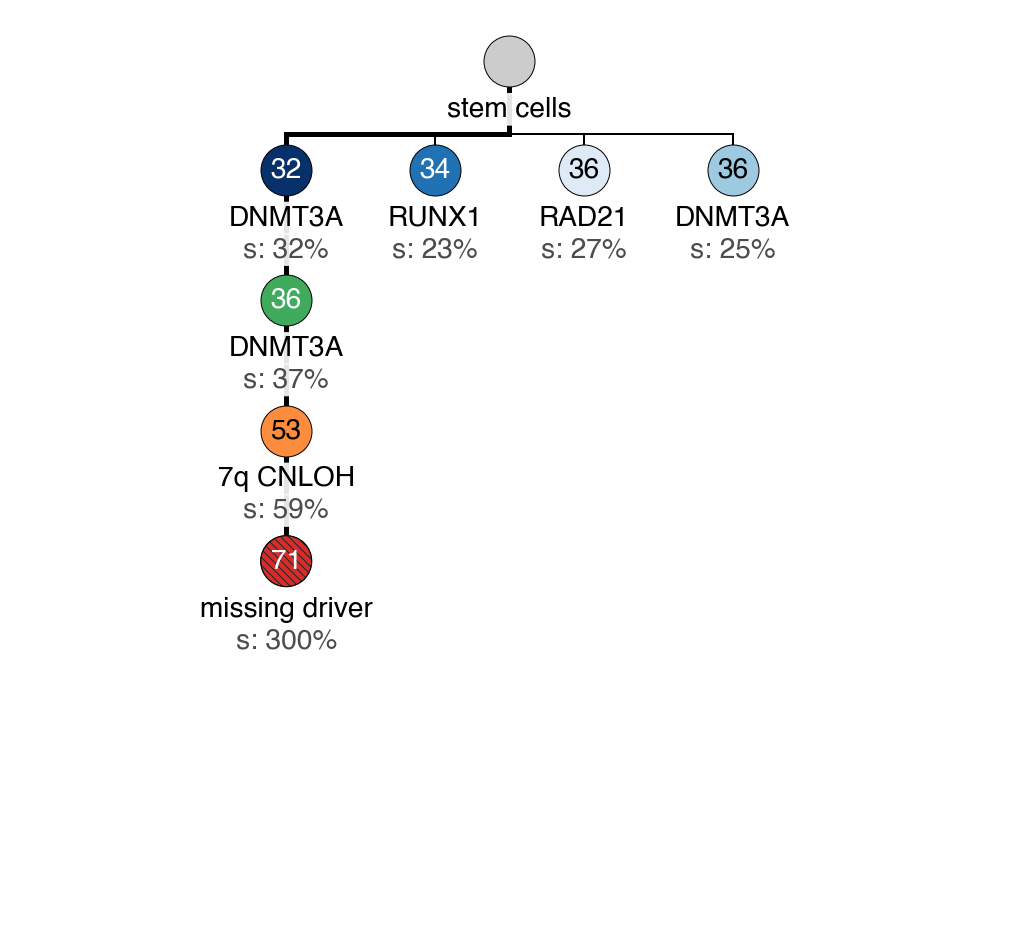

C92_005
fittest variant =  DNMT3A_p.R544S
AML ancestors =  ['DNMT3A_p.R544S', 'GATA2_p.A302S', 'TET2_p.Q538X', 'stem cells']


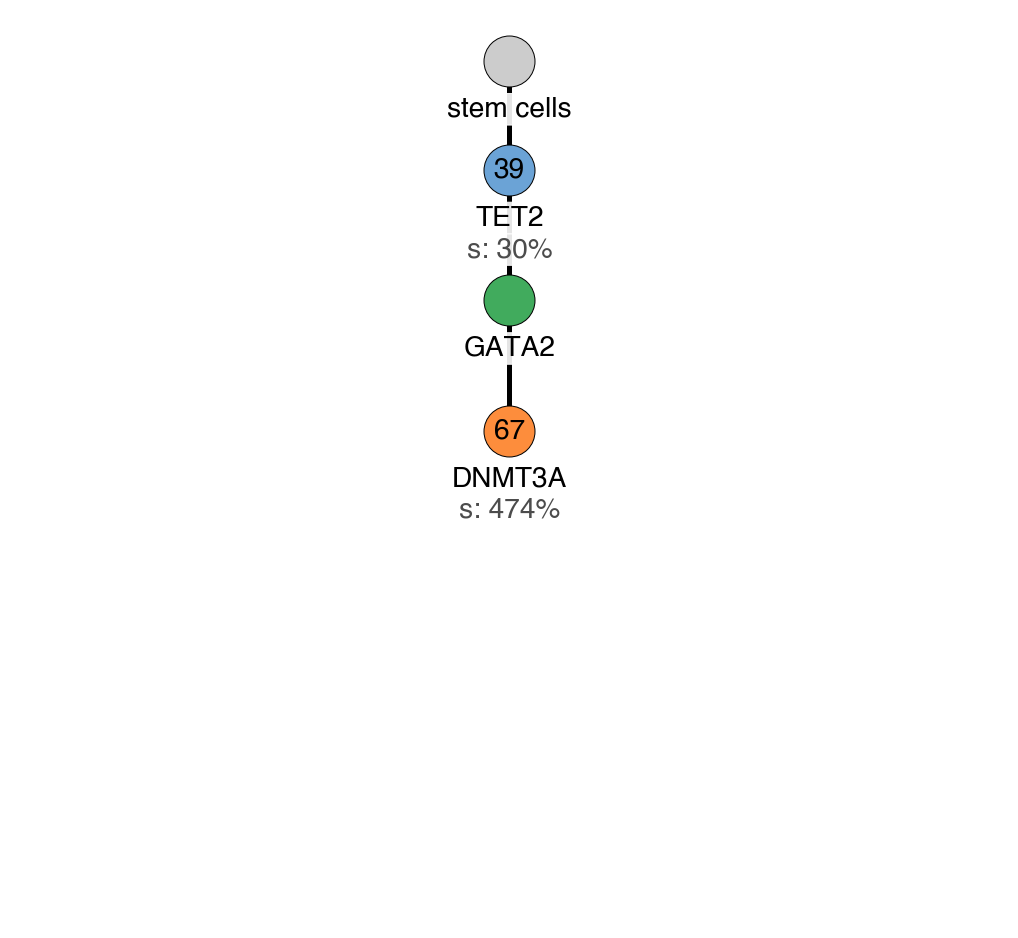

C92_007
fittest variant =  IDH2_p.R140Q
AML ancestors =  ['IDH2_p.R140Q', 'SRSF2_p.P95L', 'stem cells']


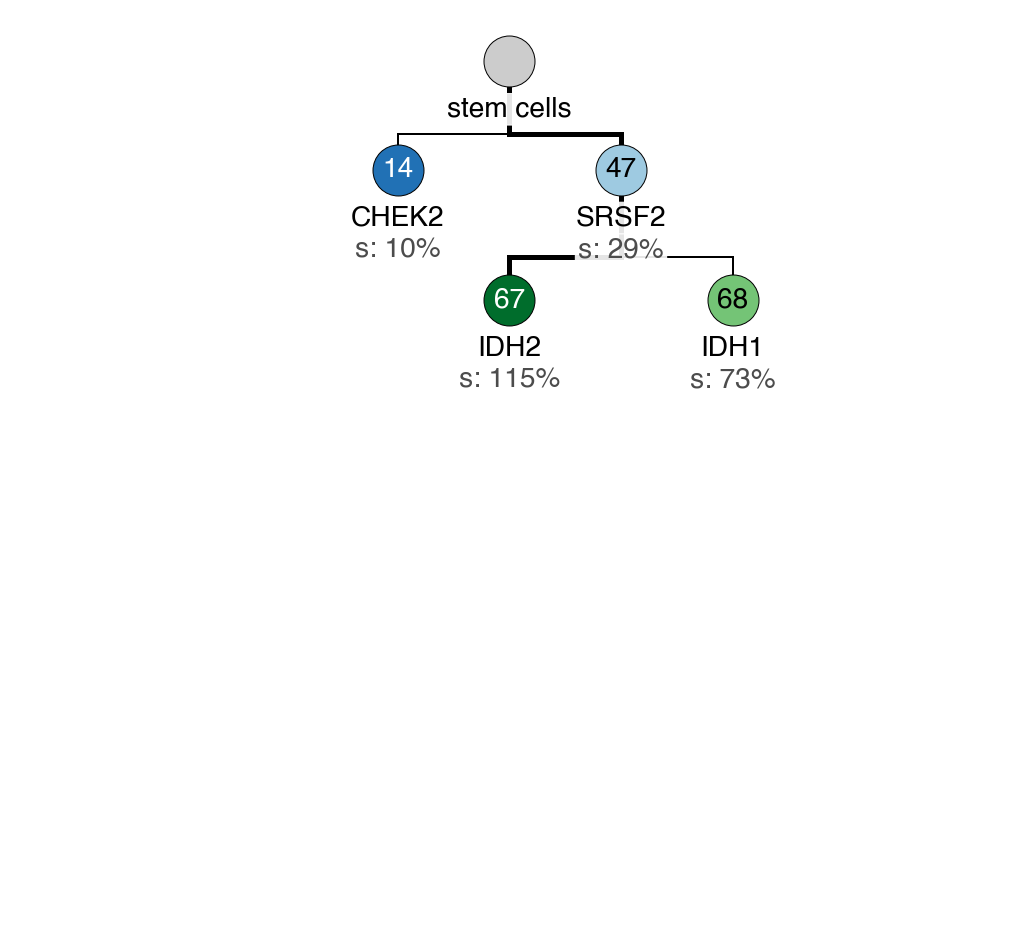

C92_008
fittest variant =  TET2_p.G1361V
AML ancestors =  ['TET2_p.G1361V', 'stem cells']


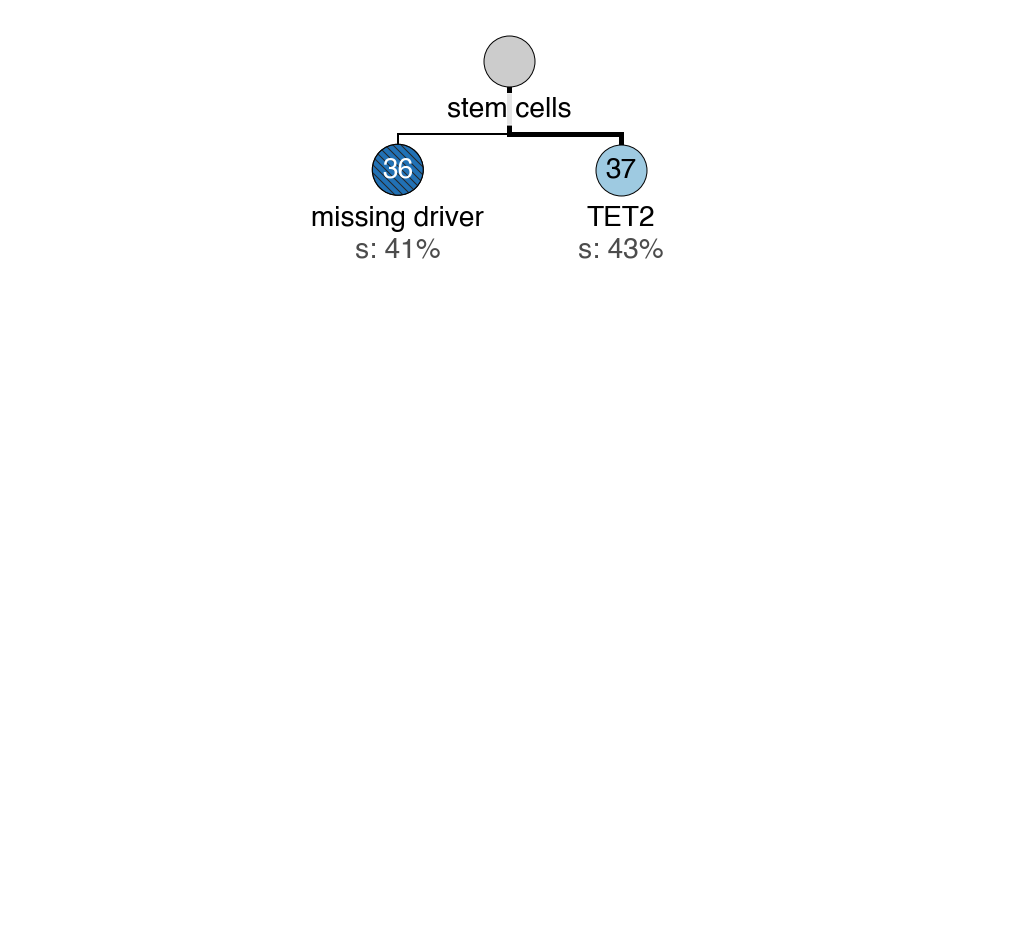

C92_009
fittest variant =  U2AF1_p.Q157R
AML ancestors =  ['U2AF1_p.Q157R', 'TP53_p.V216M', 'stem cells']


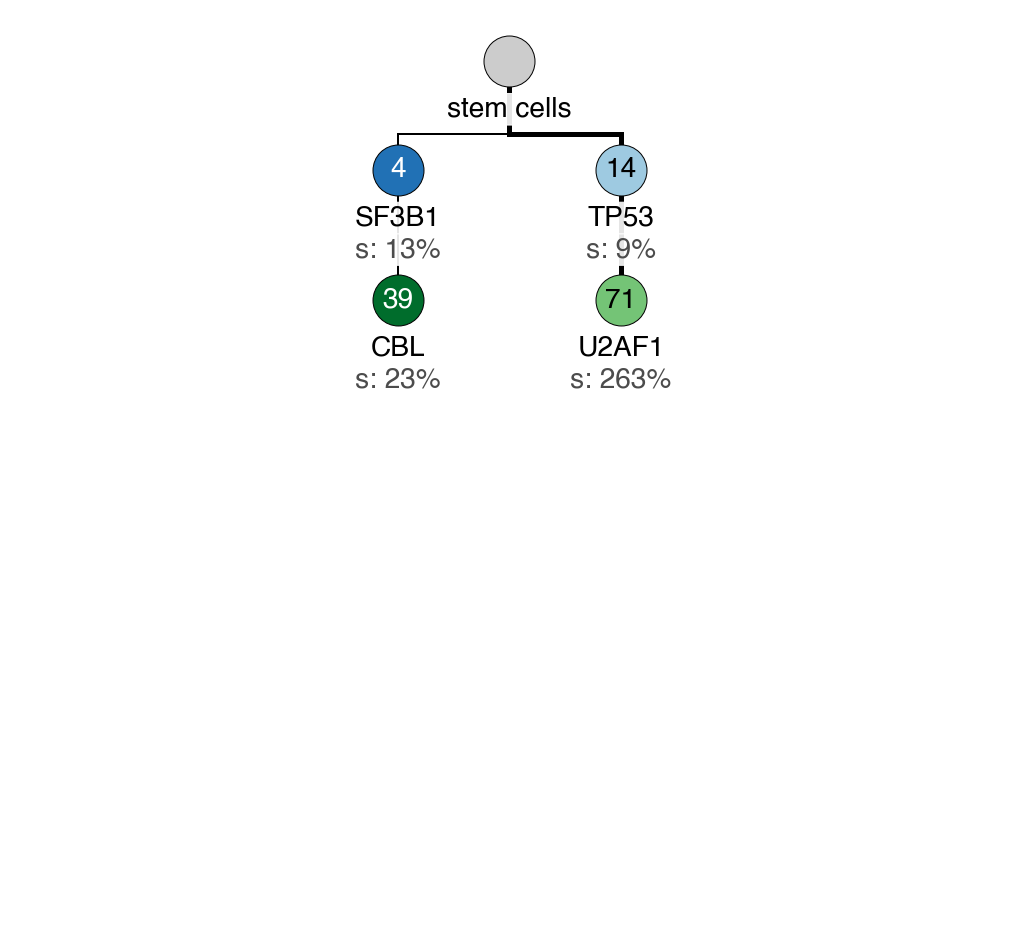

C92_011
fittest variant =  TP53_p.H193R
AML ancestors =  ['TP53_p.H193R', 'X', 'stem cells']


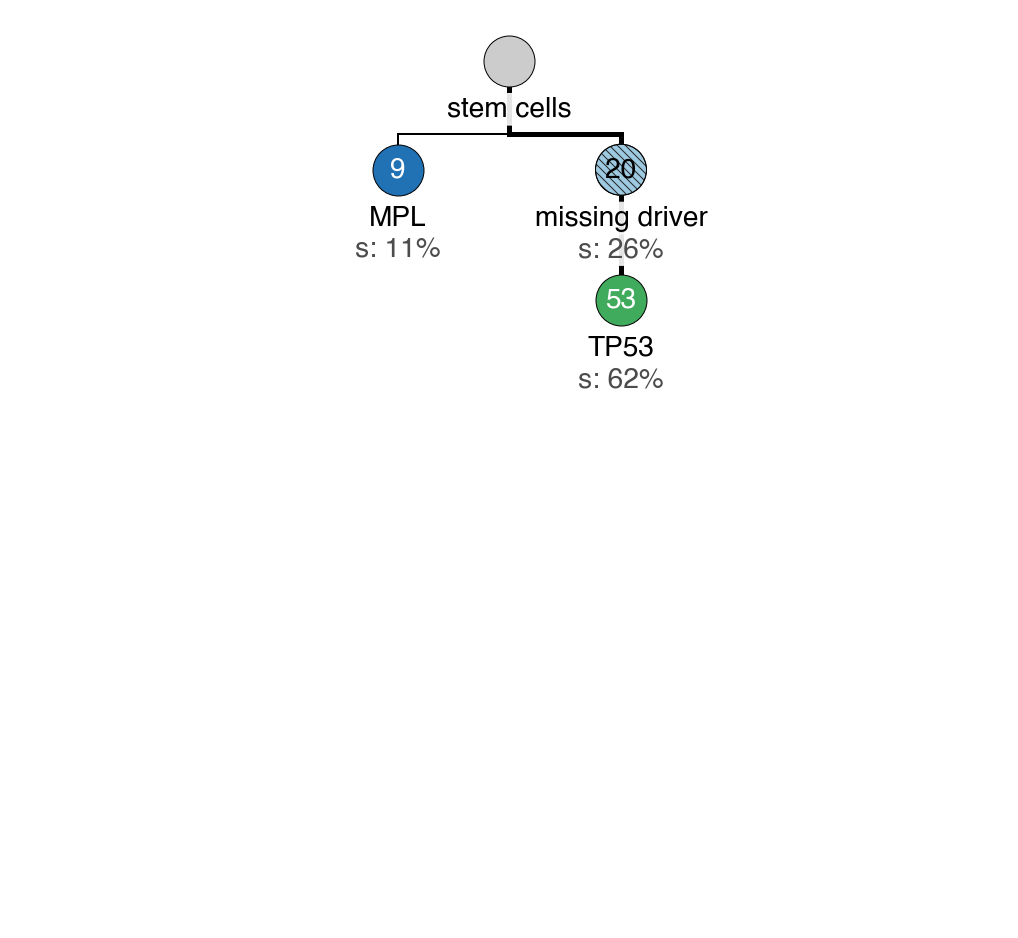

C92_012
fittest variant =  X
AML ancestors =  ['X', 'TET2_p.N1266S', 'SRSF2_p.P95H', 'stem cells']


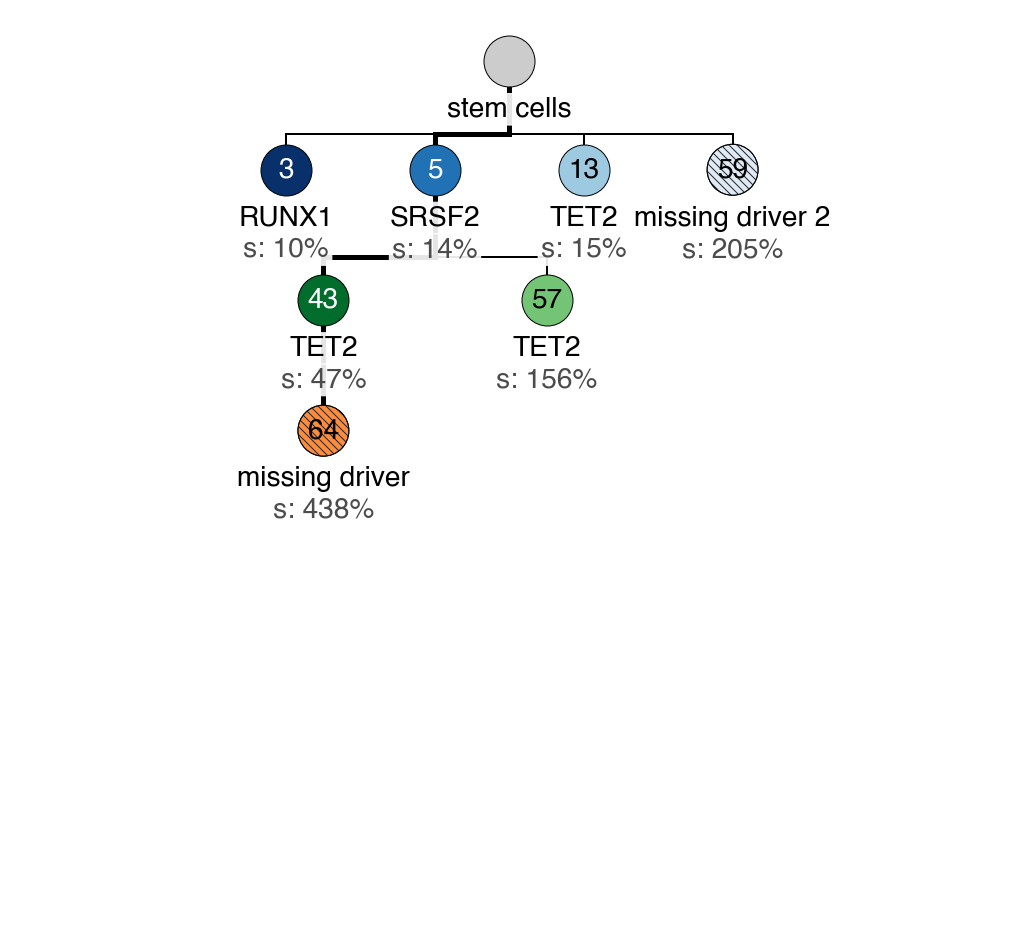

C92_016
fittest variant =  FLT3_ITD
AML ancestors =  ['FLT3_ITD', 'WT1_p.V384Dfs*8', 'NPM1_p.W288Cfs*12', 'stem cells']


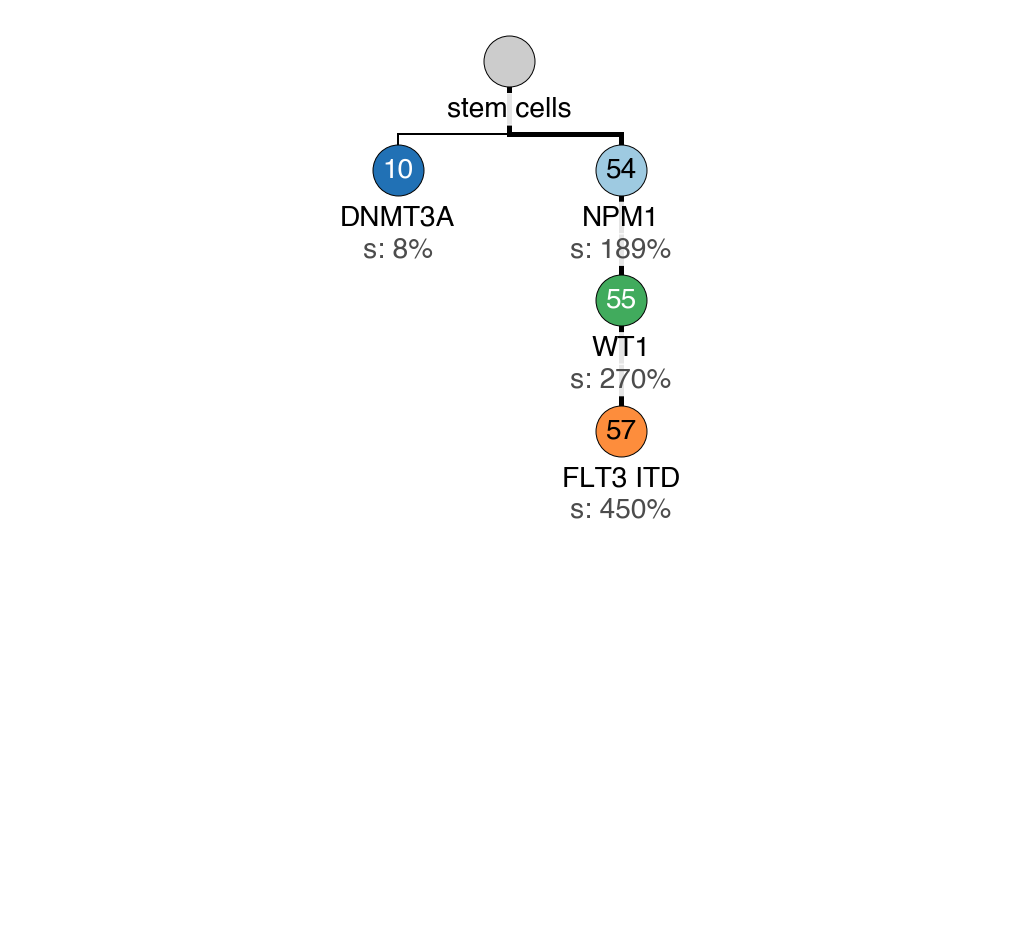

C92_018
fittest variant =  WT1_p.R385Gfs*5
AML ancestors =  ['WT1_p.R385Gfs*5', 'WT1_p.E500K', 'NPM1_p.W288Cfs*12', 'SF3B1_p.K666N', 'stem cells']


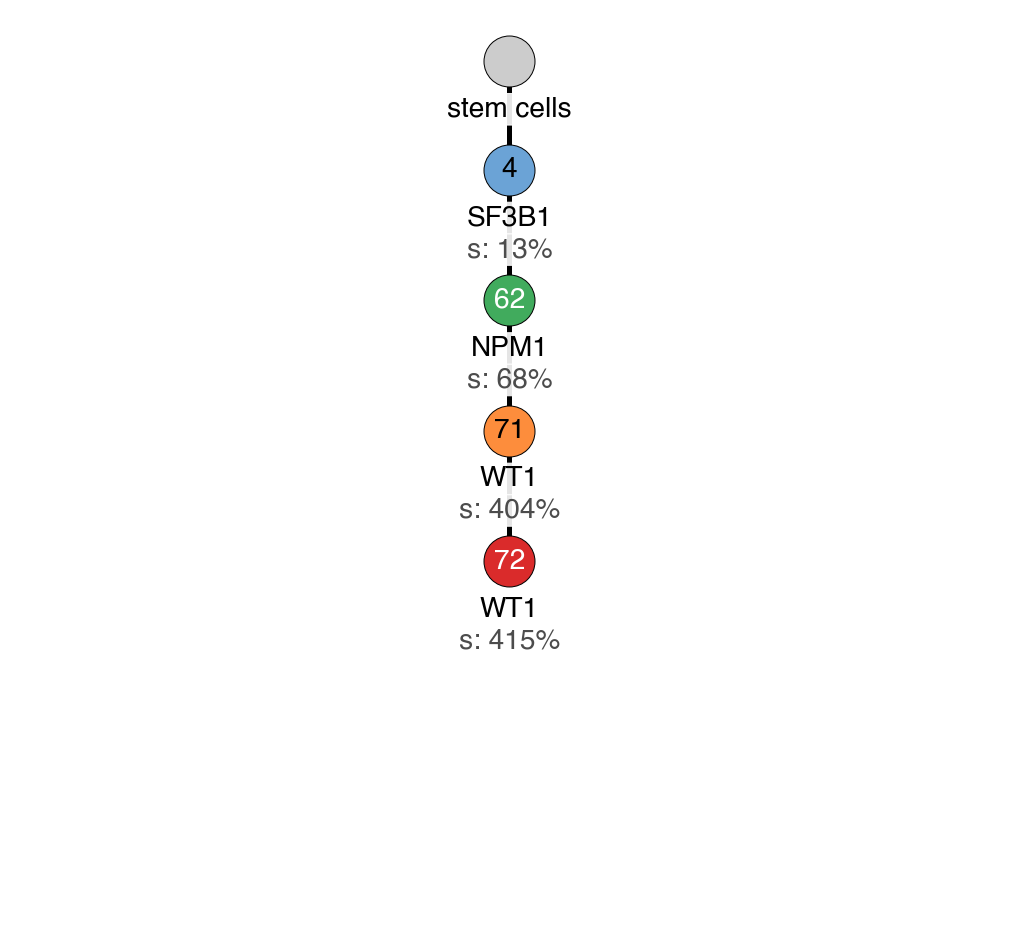

C92_019
fittest variant =  X
AML ancestors =  ['X', 'BCORL1_p.R1536H', 'stem cells']


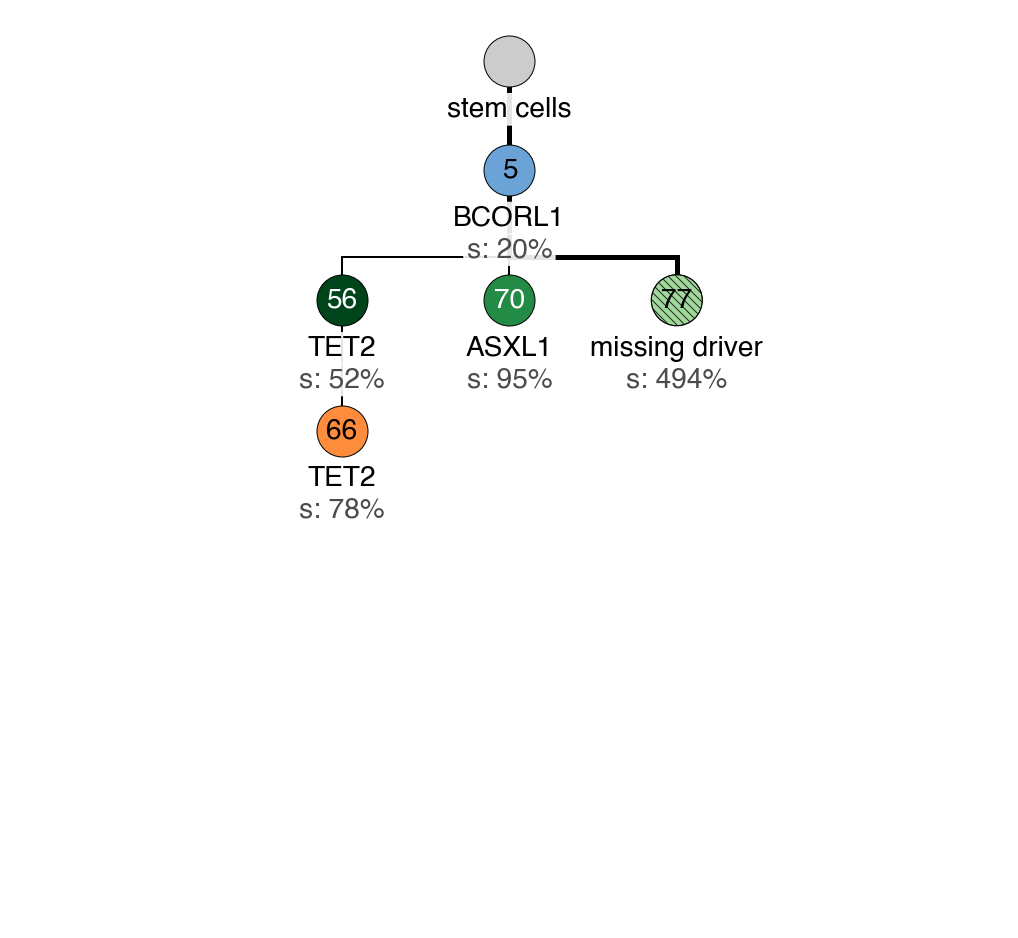

C92_022
fittest variant =  X
AML ancestors =  ['X', 'chr9p_CNLOH', 'JAK2_p.V617F', 'SRSF2_p.P95H', 'TET2_p.H1380D', 'TET2_p.S1593Afs*3', 'stem cells']


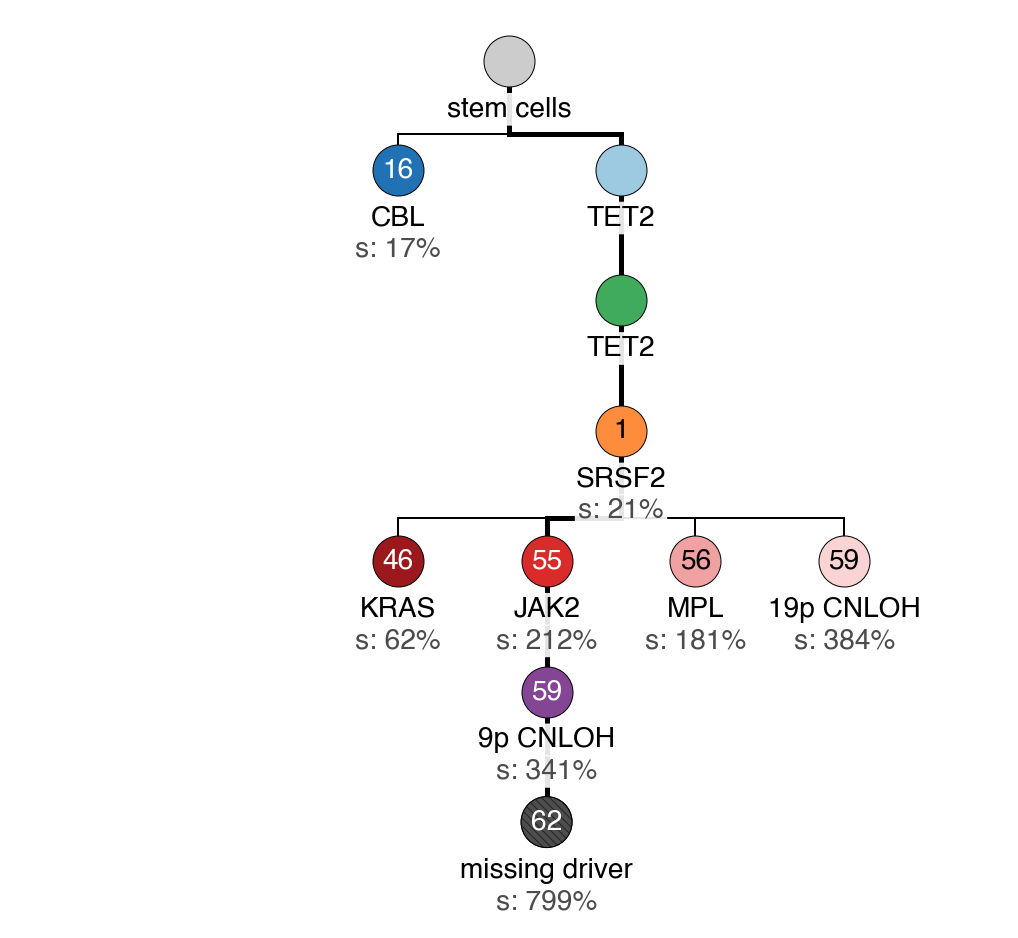

C92_023
fittest variant =  X
AML ancestors =  ['X', 'NRAS_p.G12D', 'ASXL1_p.G643Rfs*15', 'TET2_p.P1079Qfs*3', 'stem cells']


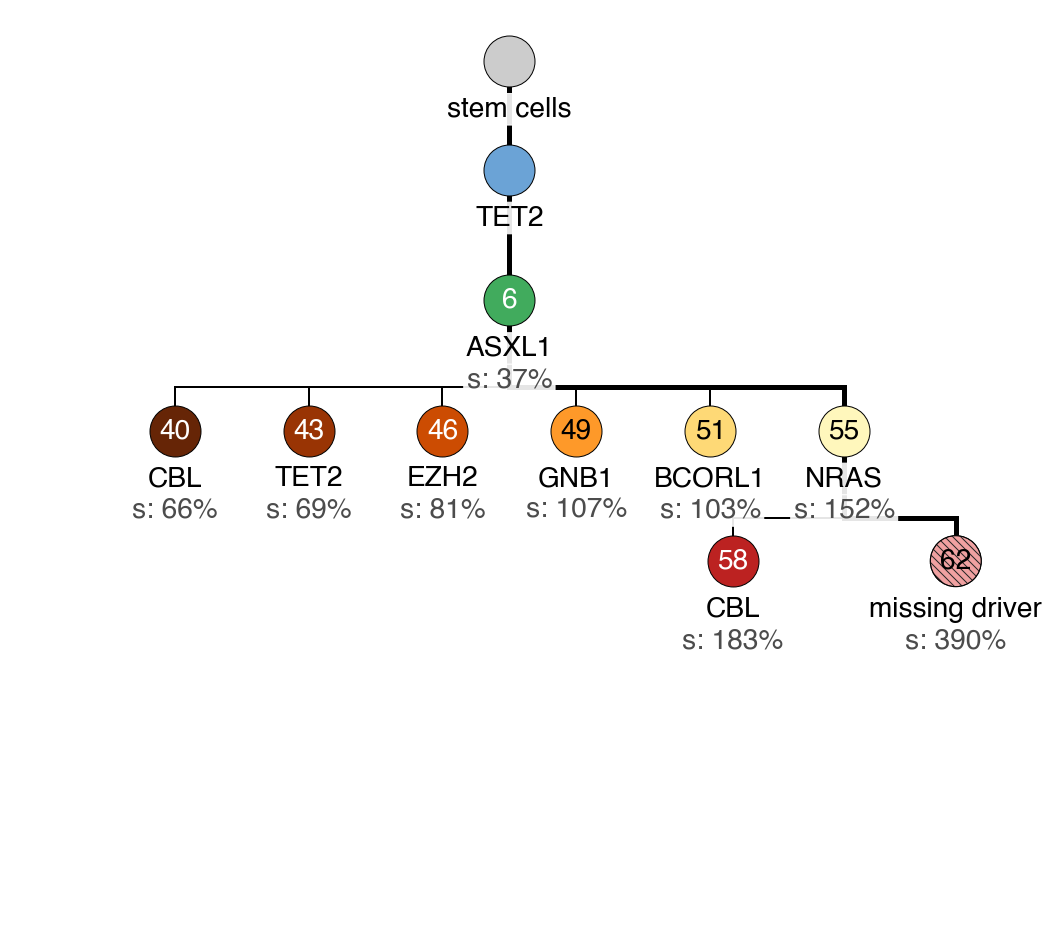

C92_024
fittest variant =  WT1_p.P381Rfs*73
AML ancestors =  ['WT1_p.P381Rfs*73', 'DNMT3A_p.K154del', 'stem cells']


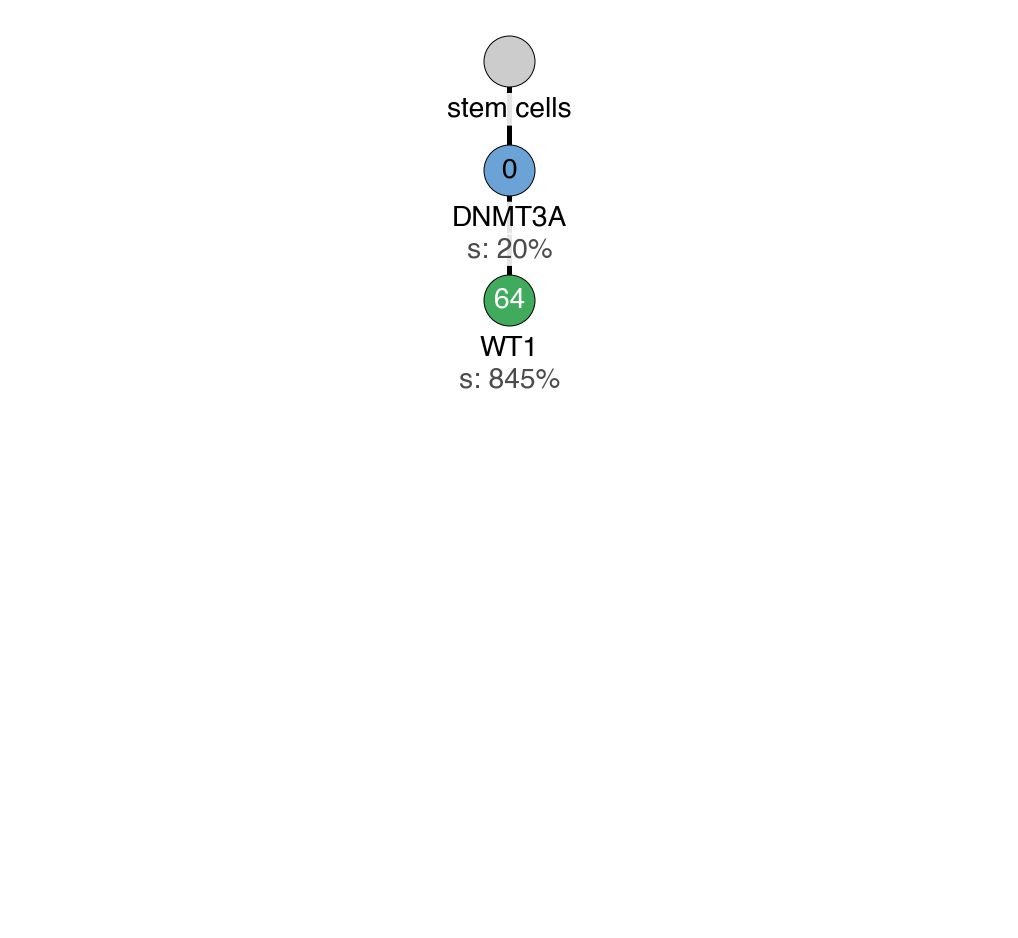

C92_032
fittest variant =  DNMT3A_p.R688G
AML ancestors =  ['DNMT3A_p.R688G', 'DNMT3A_p.L637P', 'stem cells']


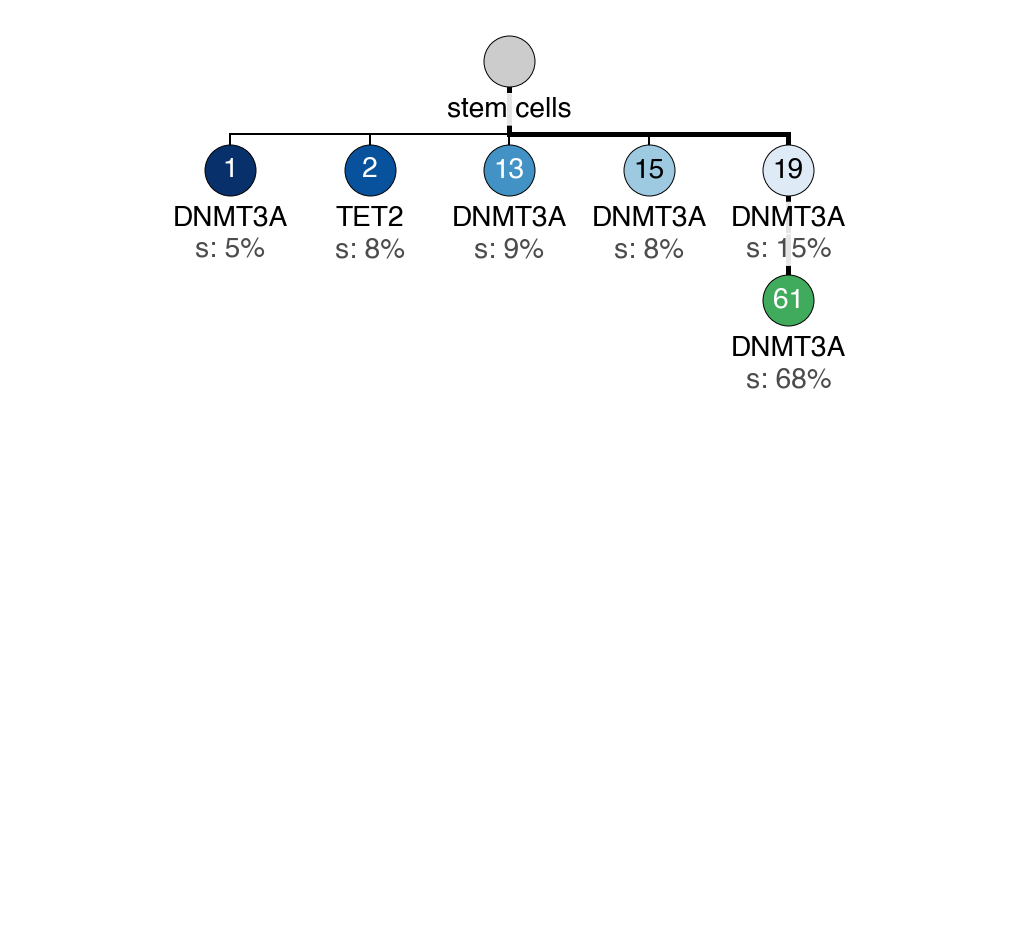

C92_033
fittest variant =  MPL_p.Y591D
AML ancestors =  ['MPL_p.Y591D', 'TET2_p.H1036Tfs*19', 'SRSF2_p.P95H', 'stem cells']


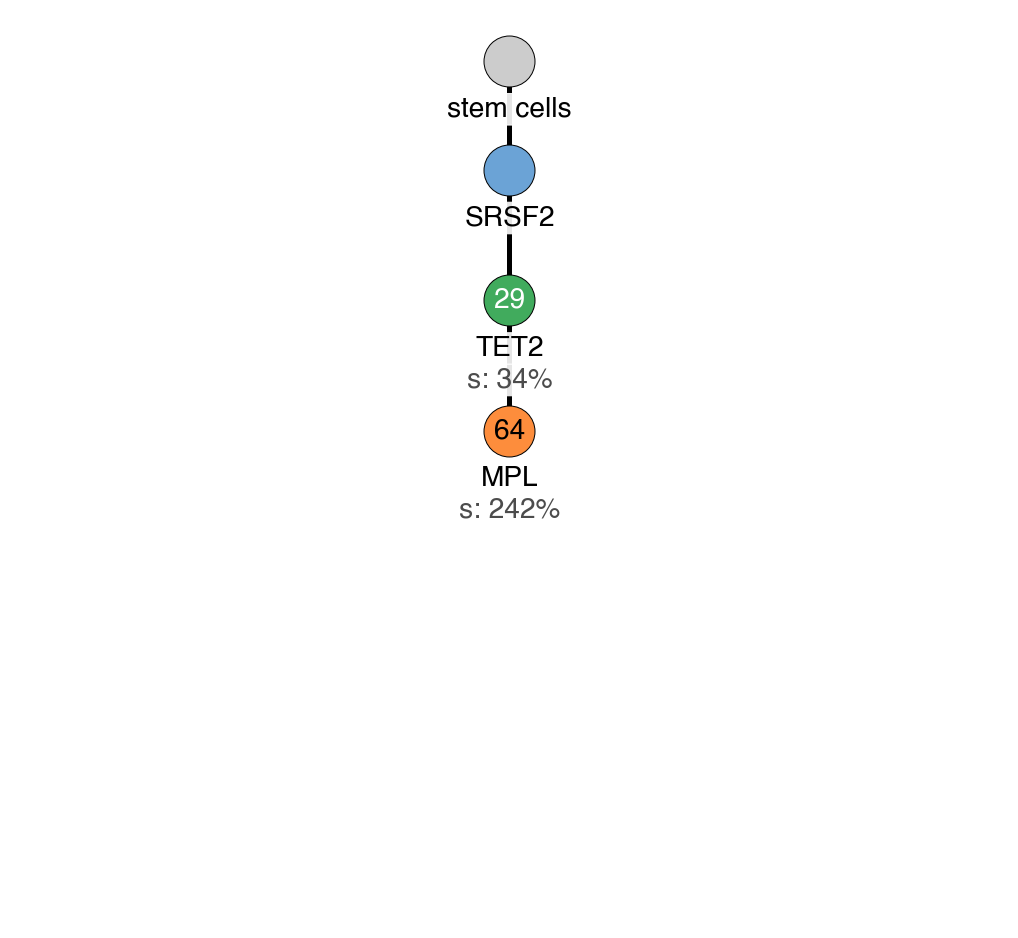

C92_034
fittest variant =  SRSF2_p.P95H
AML ancestors =  ['SRSF2_p.P95H', 'EZH2_p.P558Q', 'DNMT3A_p.R882H', 'chrX_gain', 'stem cells']


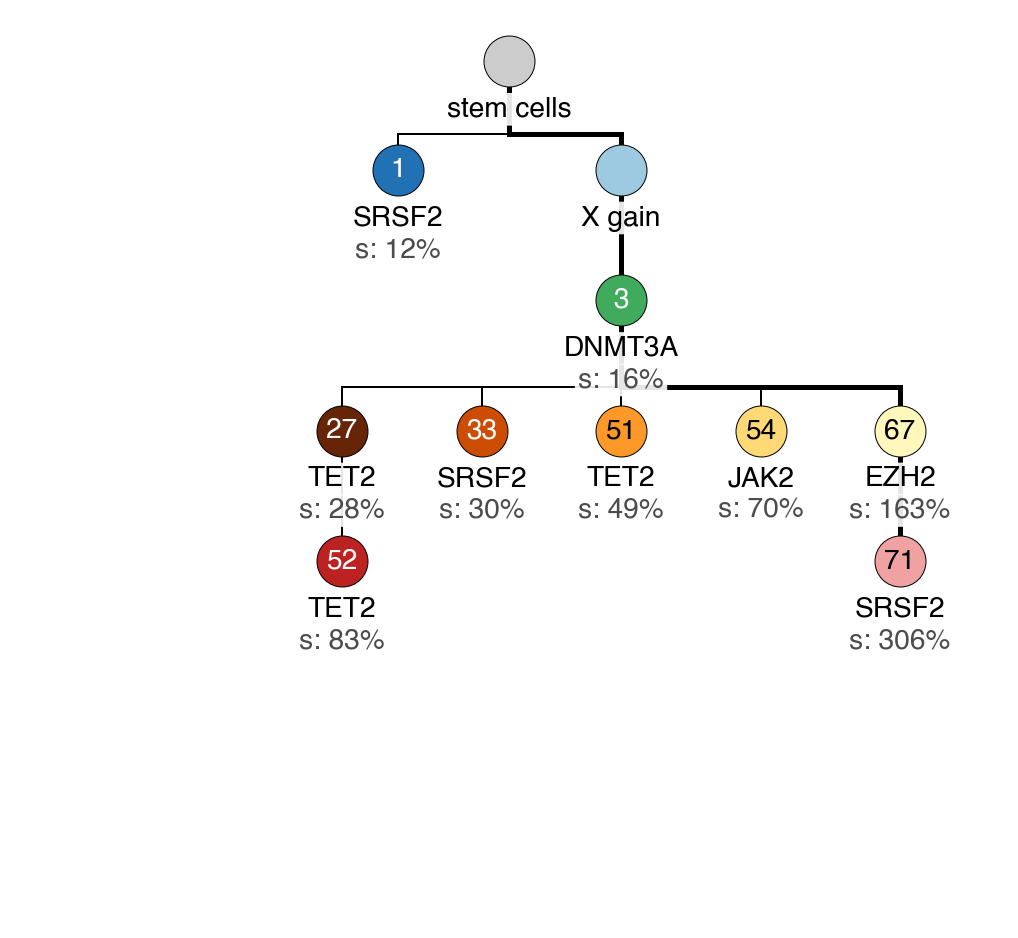

C92_036
fittest variant =  X
AML ancestors =  ['X', 'stem cells']


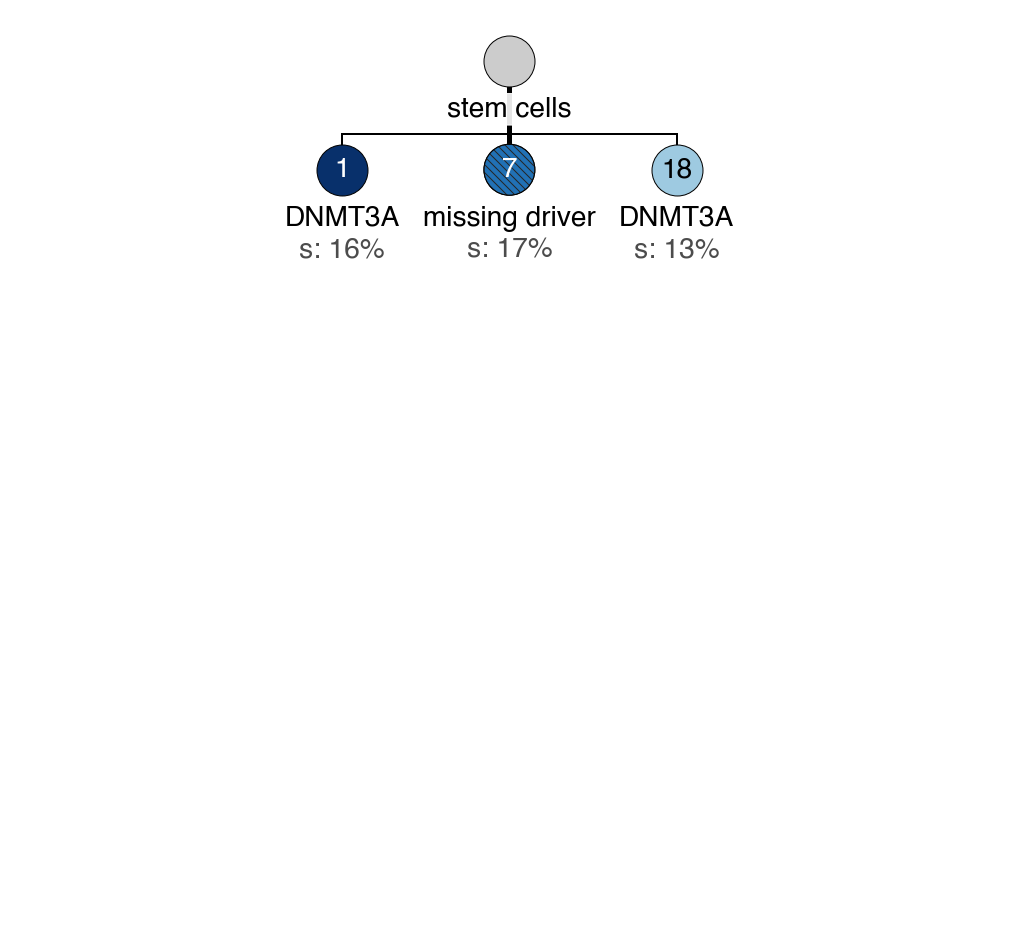

C92_041
fittest variant =  DNMT3A_p.R882H
AML ancestors =  ['DNMT3A_p.R882H', 'stem cells']


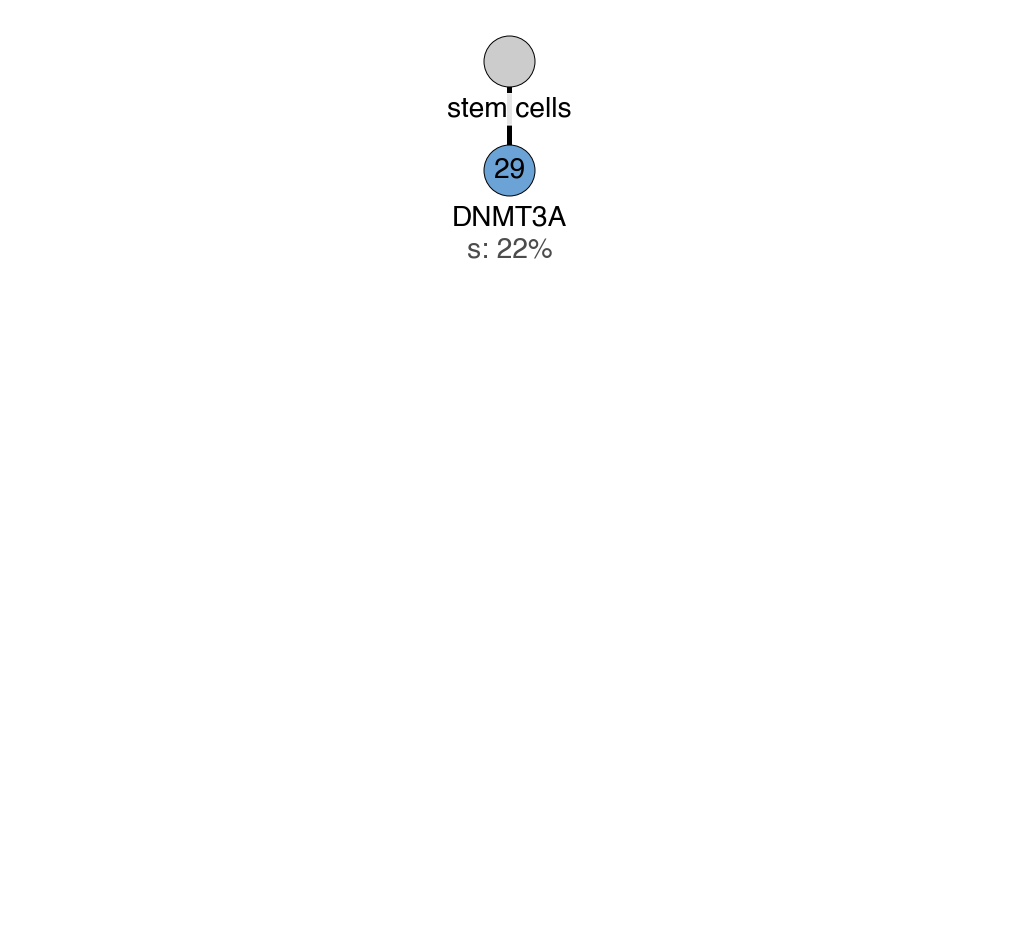

C92_042
fittest variant =  SRSF2_p.P95H
AML ancestors =  ['SRSF2_p.P95H', 'SF3B1_p.K666R', 'STAG2_p.M1175L', 'stem cells']


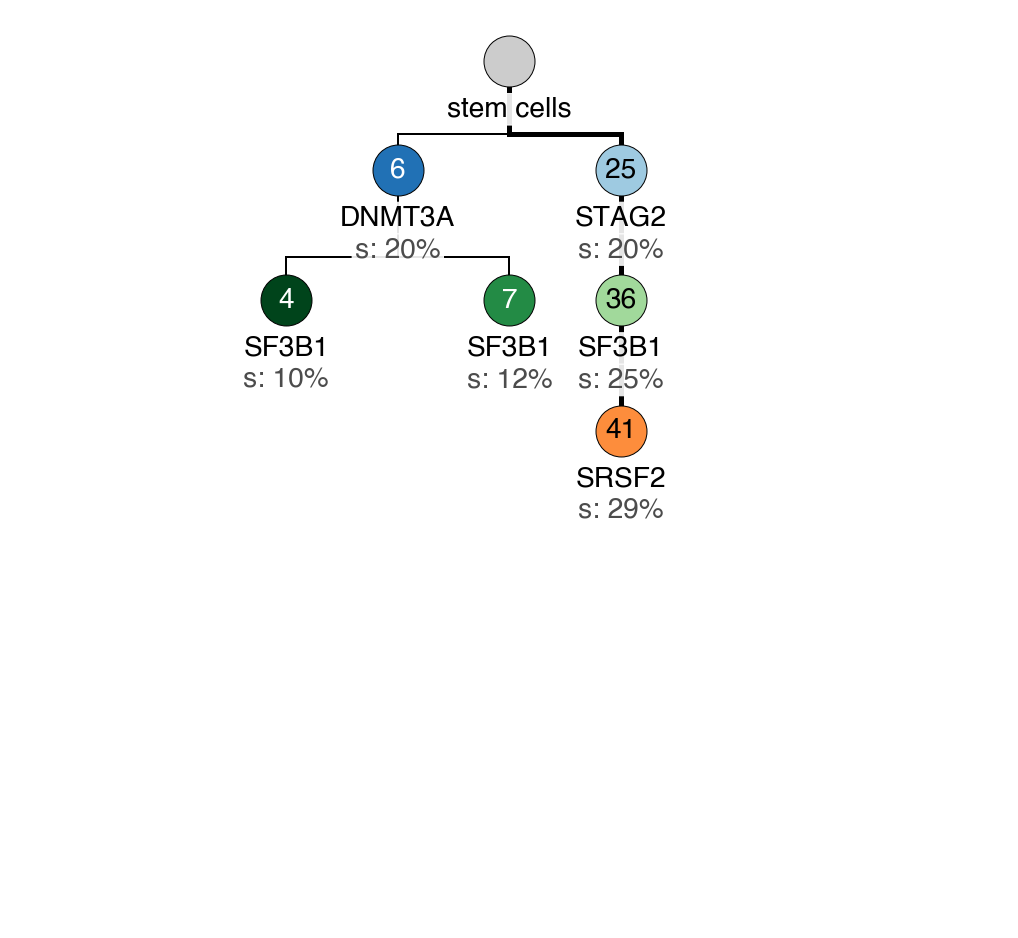

C92_045
fittest variant =  X
AML ancestors =  ['X', 'stem cells']


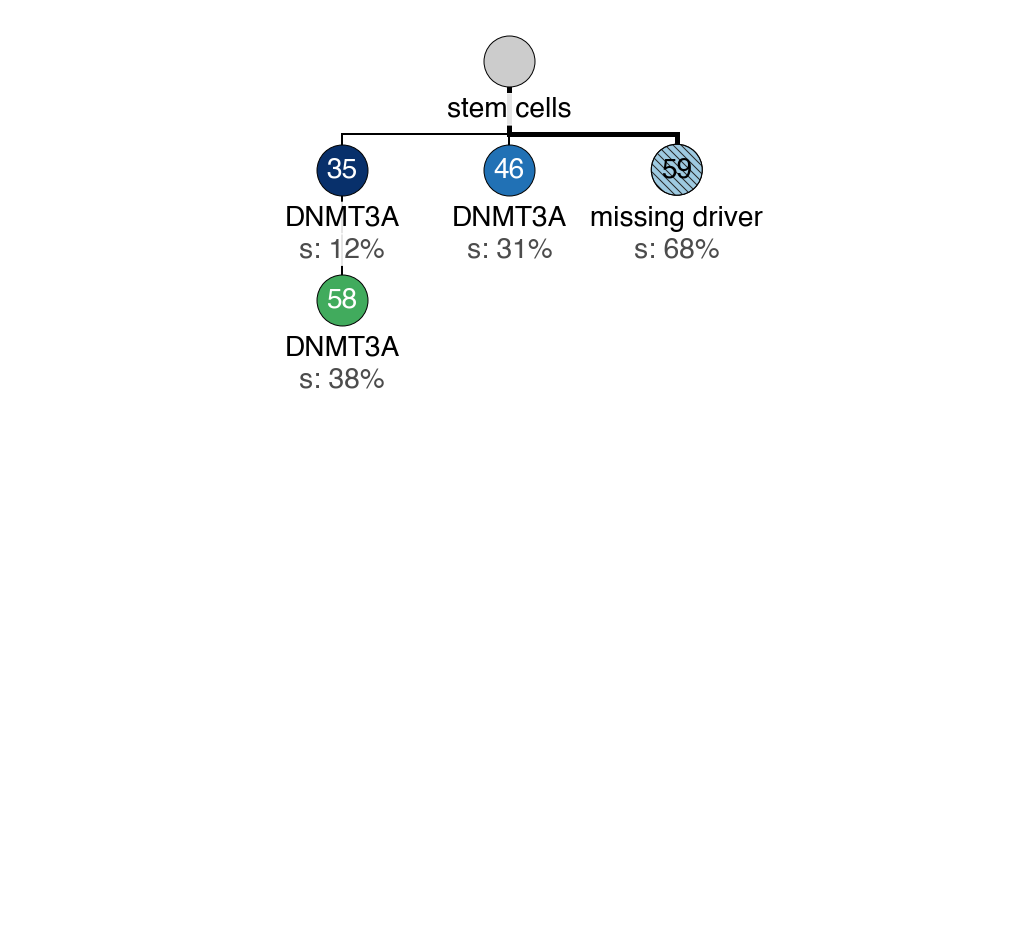

C92_047
fittest variant =  RUNX1_p.R139X
AML ancestors =  ['RUNX1_p.R139X', 'stem cells']


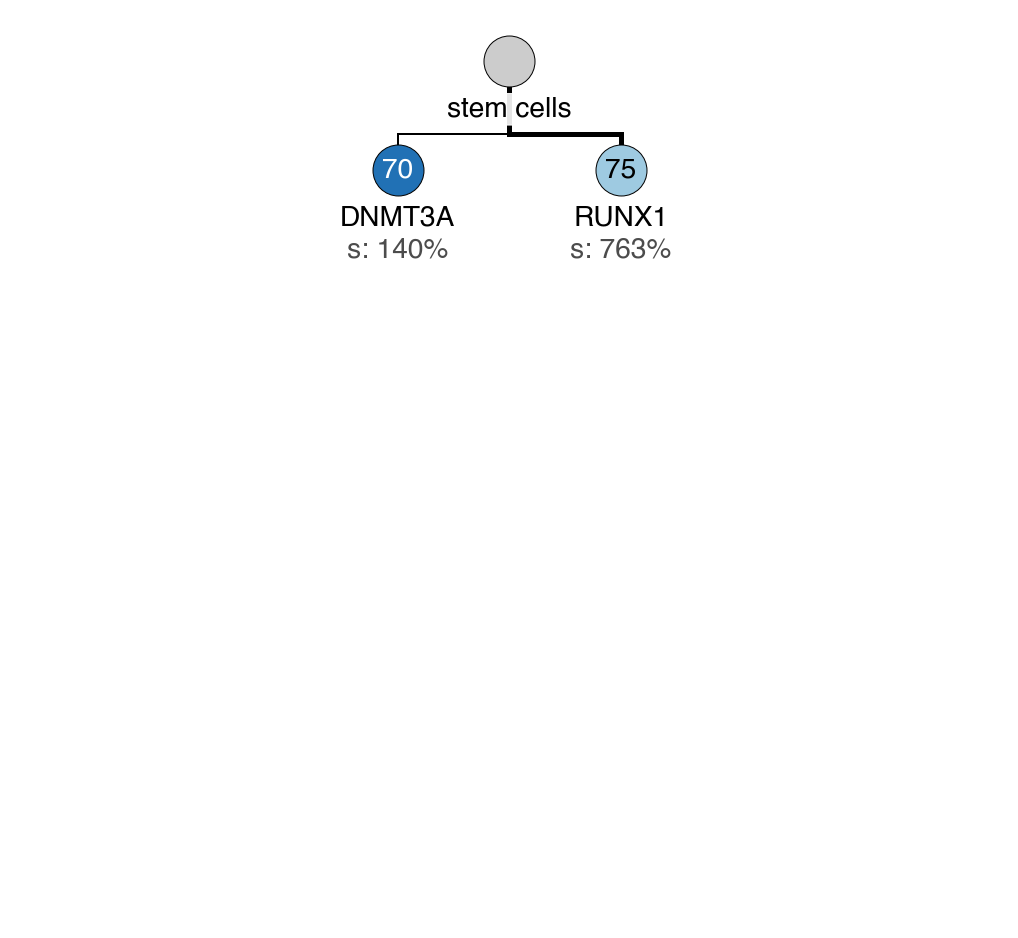

C92_049
fittest variant =  IDH2_p.R140Q
AML ancestors =  ['IDH2_p.R140Q', 'DNMT3A_p.R326C', 'stem cells']


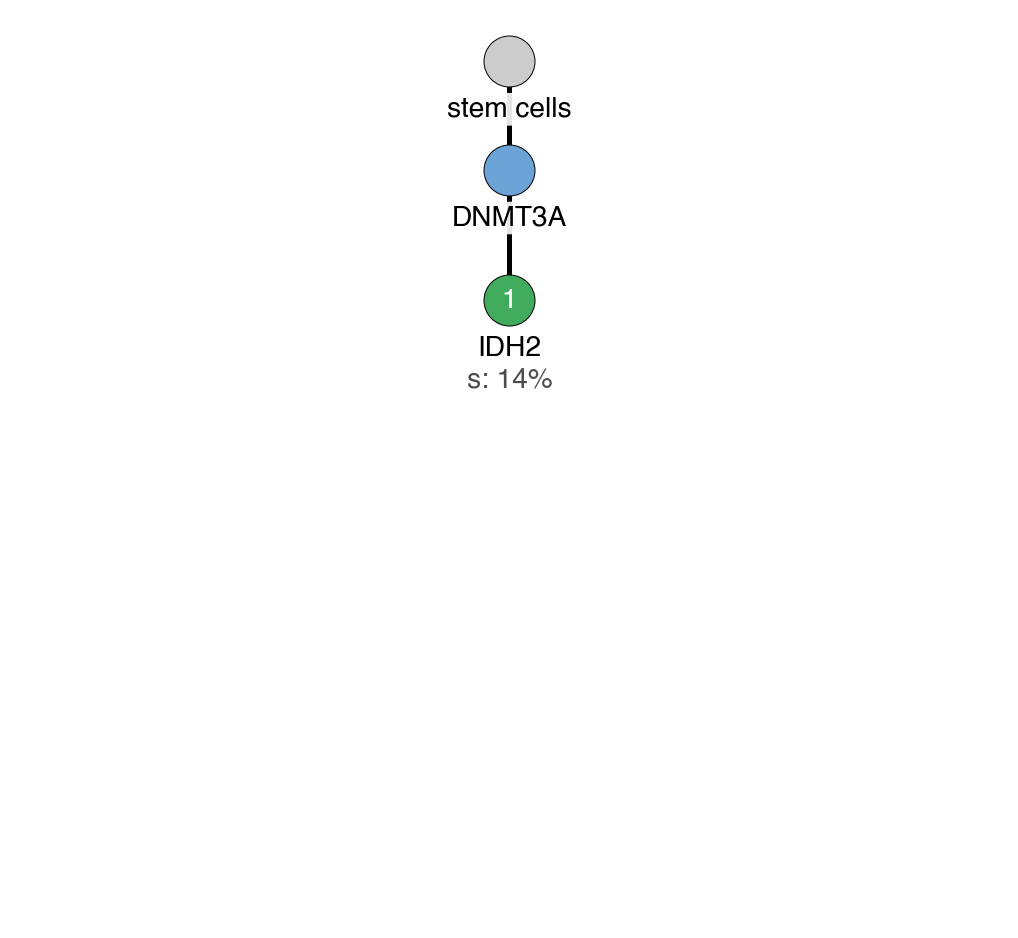

C92_050
fittest variant =  Z
AML ancestors =  ['Z', 'CBL_p.C404Y', 'CBL_p.L380P', 'stem cells']


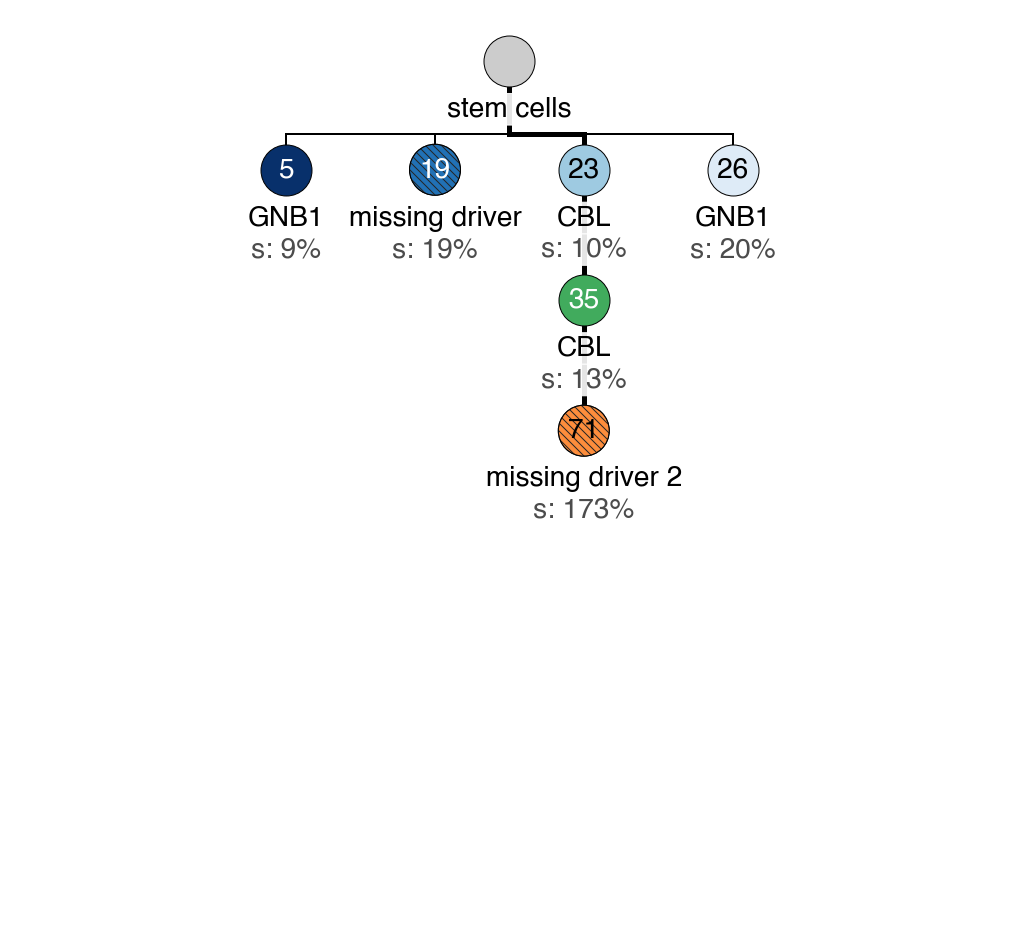

C92_051
fittest variant =  ASXL1_p.E1006X
AML ancestors =  ['ASXL1_p.E1006X', 'X', 'stem cells']


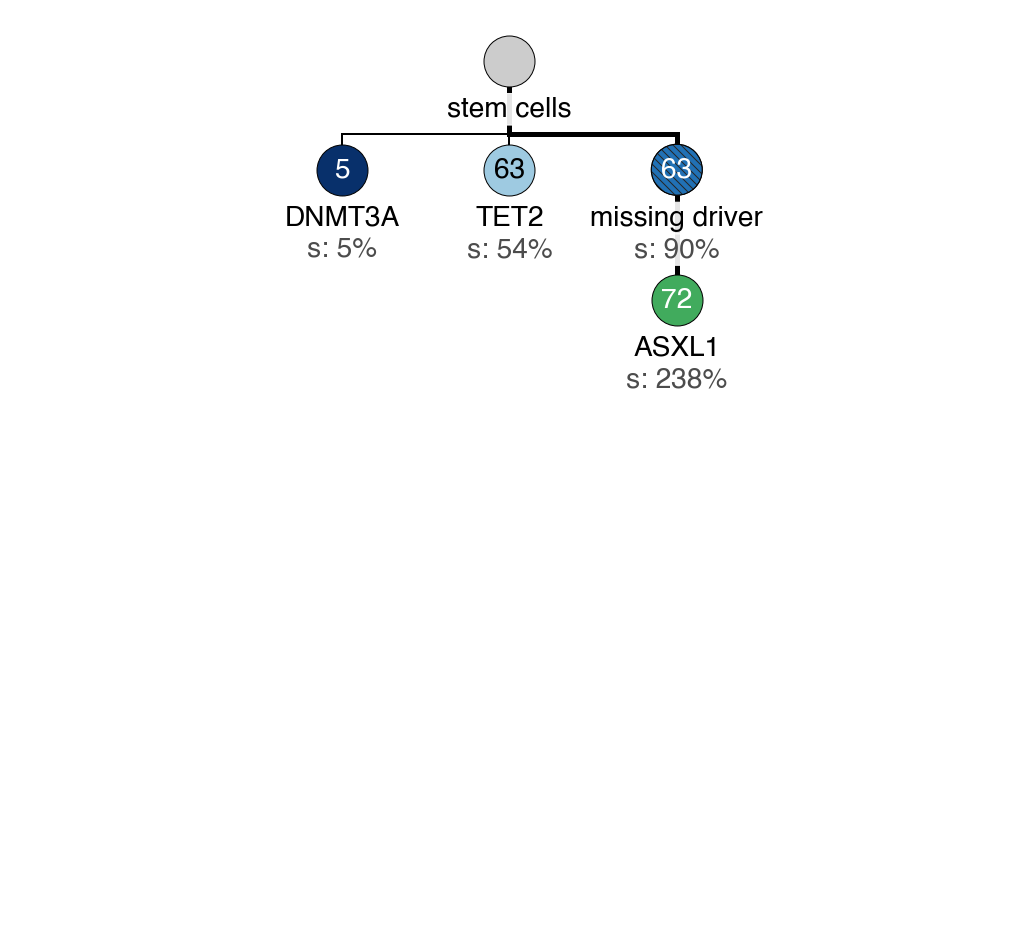

C92_052
fittest variant =  SRSF2_p.P95H
AML ancestors =  ['SRSF2_p.P95H', 'DDX41_p.D344E', 'stem cells']


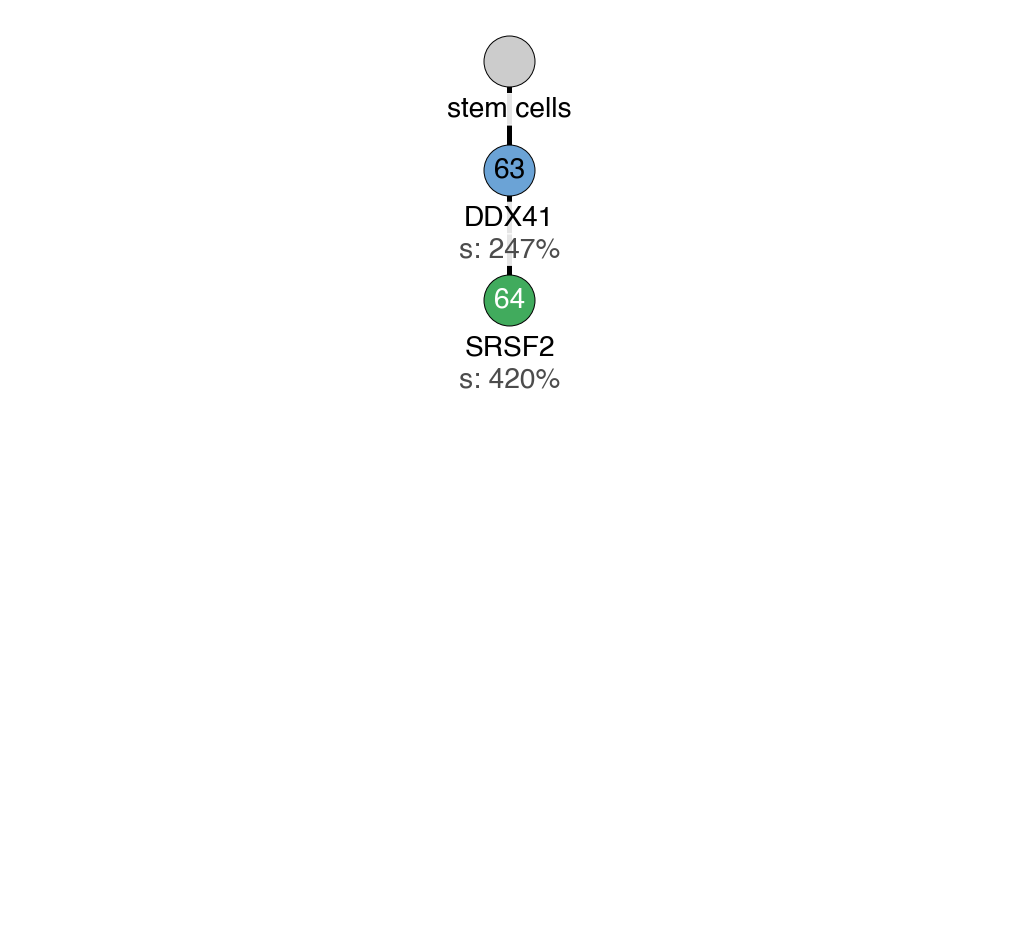

C92_053
fittest variant =  TP53_p.N239*
AML ancestors =  ['TP53_p.N239*', 'TP53_p.G244S', 'TET2_p.Q1903X', 'JAK2_p.V617F', 'stem cells']


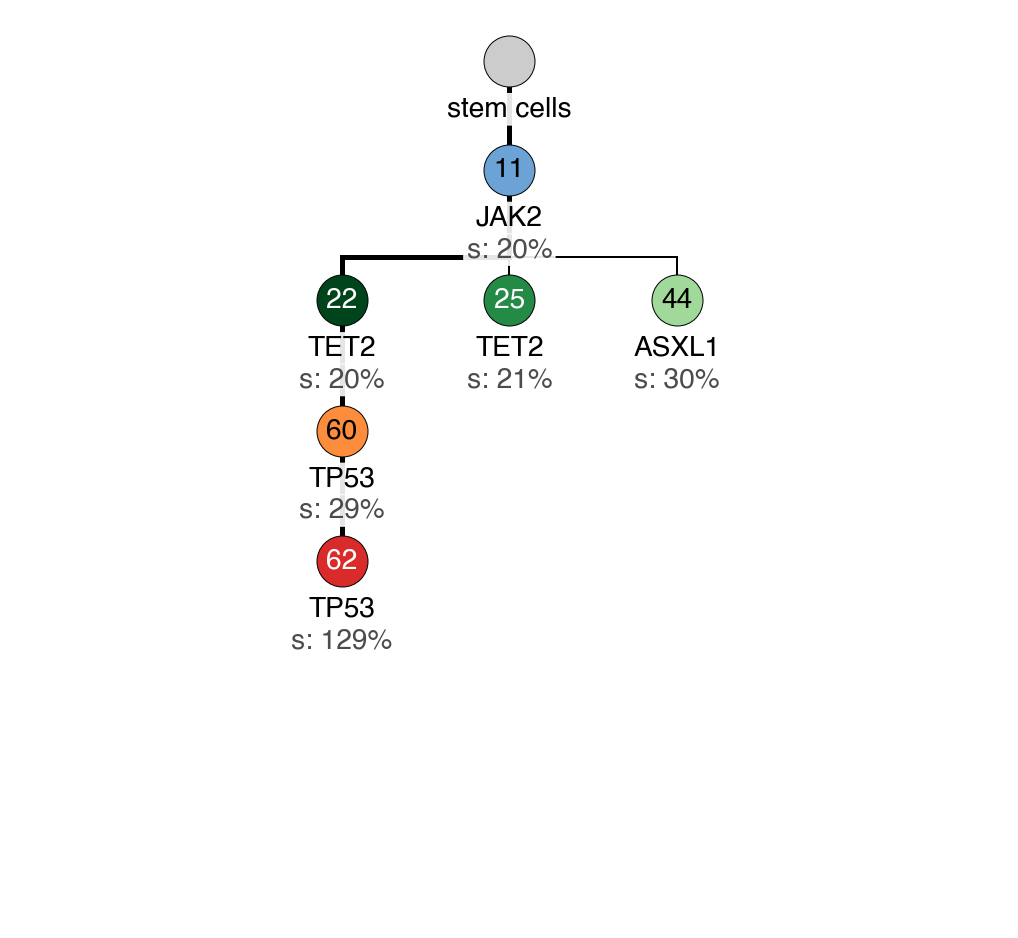

C92_054
fittest variant =  RUNX1_p.A443T
AML ancestors =  ['RUNX1_p.A443T', 'chr4_gain?', 'DNMT3A_p.R882C', 'stem cells']


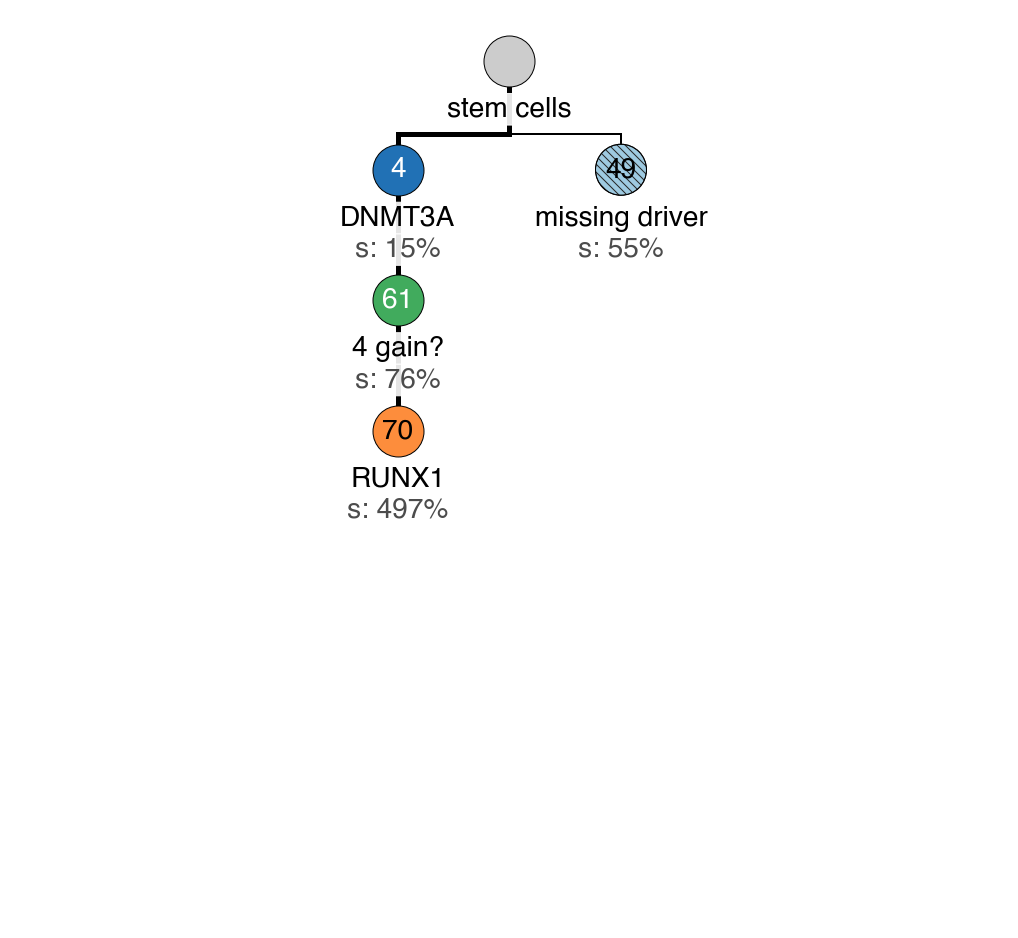

C92_055
fittest variant =  NPM1_p.W288Cfs*12
AML ancestors =  ['NPM1_p.W288Cfs*12', 'stem cells']


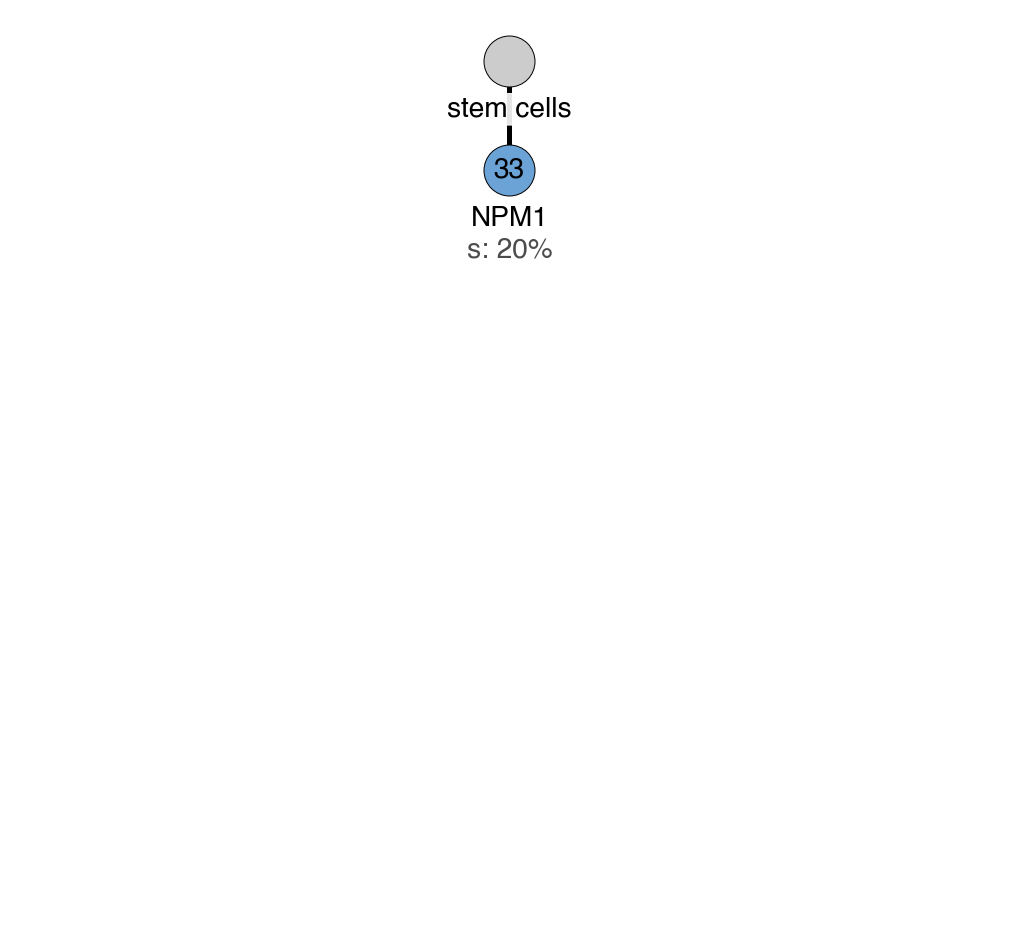

C92_056
fittest variant =  EZH2_p.S690W
AML ancestors =  ['EZH2_p.S690W', 'MPL_p.Y631Nfs*52', 'DNMT3A_p.R882H', 'stem cells']


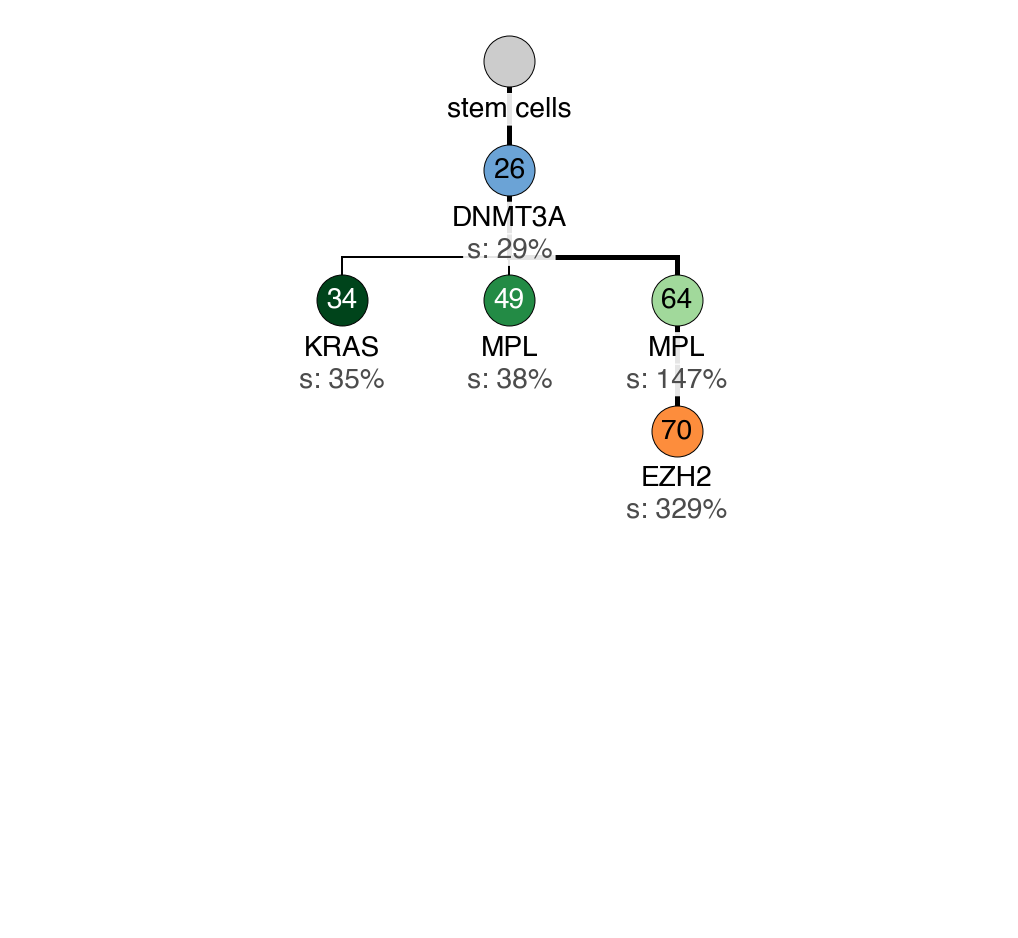

C92_057
fittest variant =  X
AML ancestors =  ['X', 'stem cells']


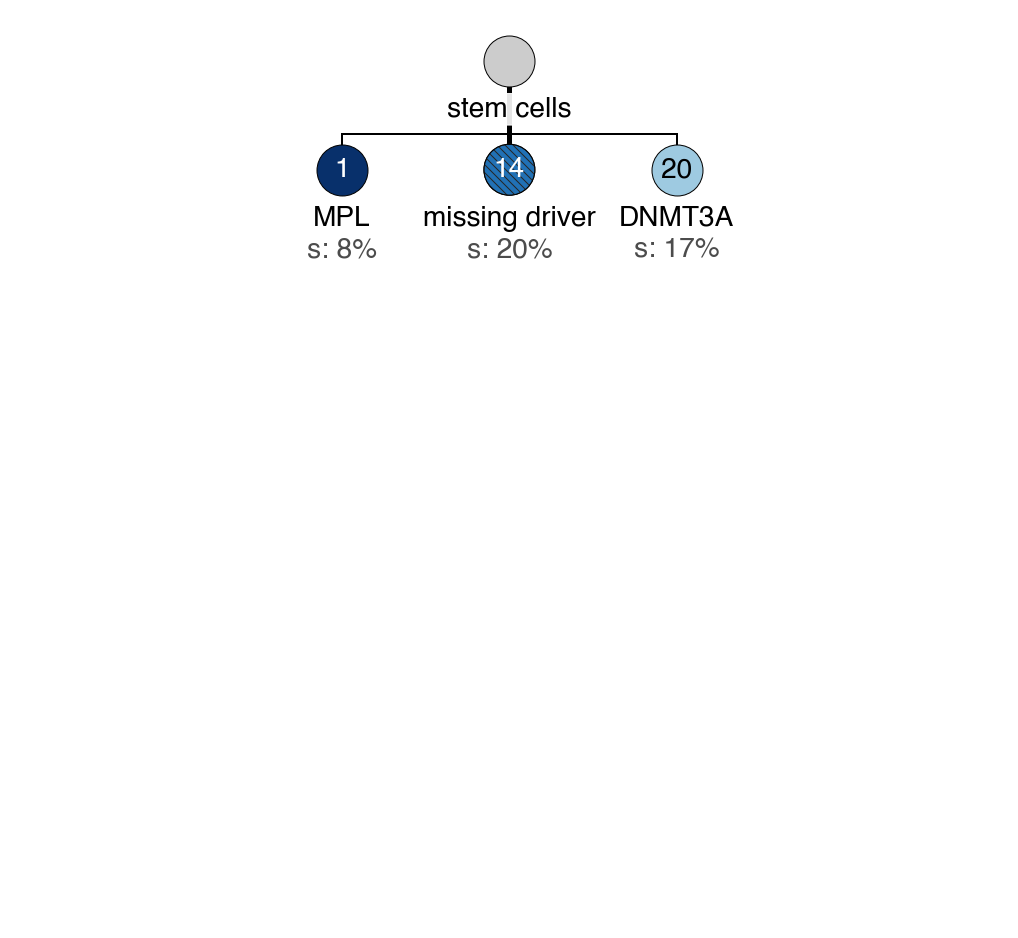

C92_058
fittest variant =  ASXL1_p.D1057G
AML ancestors =  ['ASXL1_p.D1057G', 'stem cells']


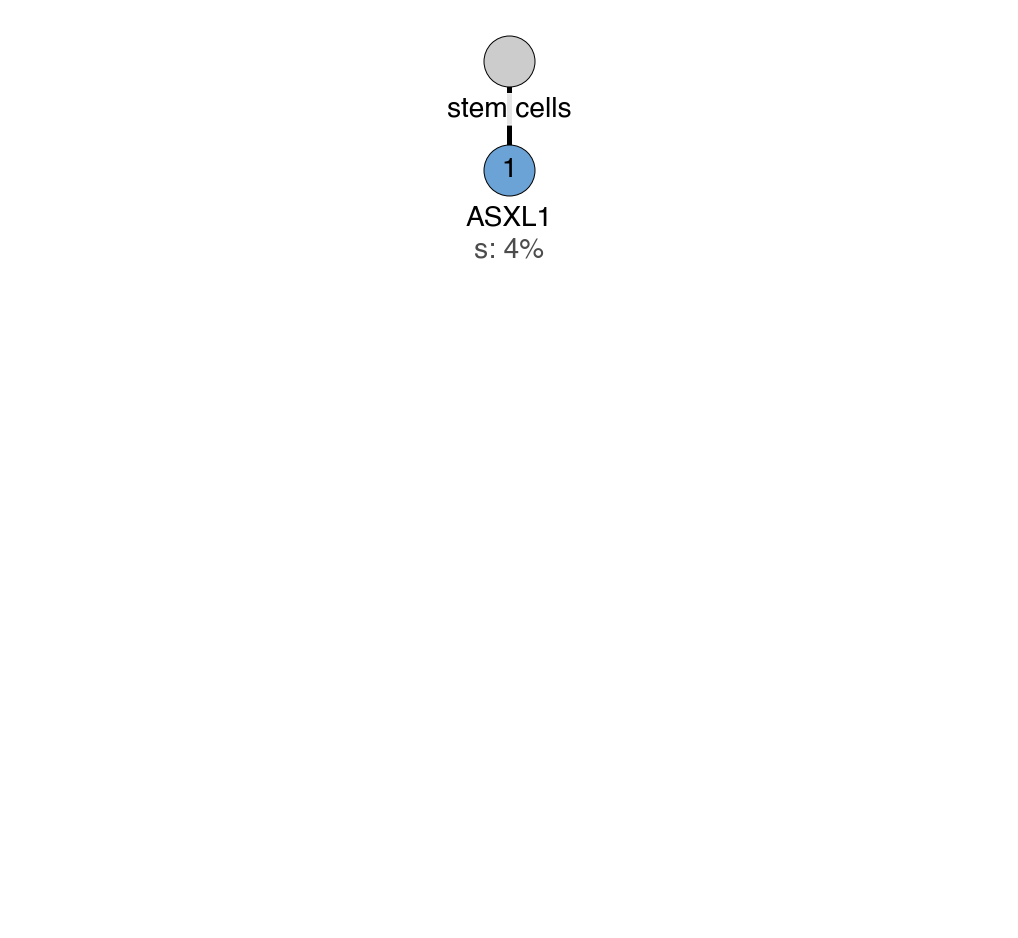

C92_061
fittest variant =  TET2_p.R1261C
AML ancestors =  ['TET2_p.R1261C', 'stem cells']


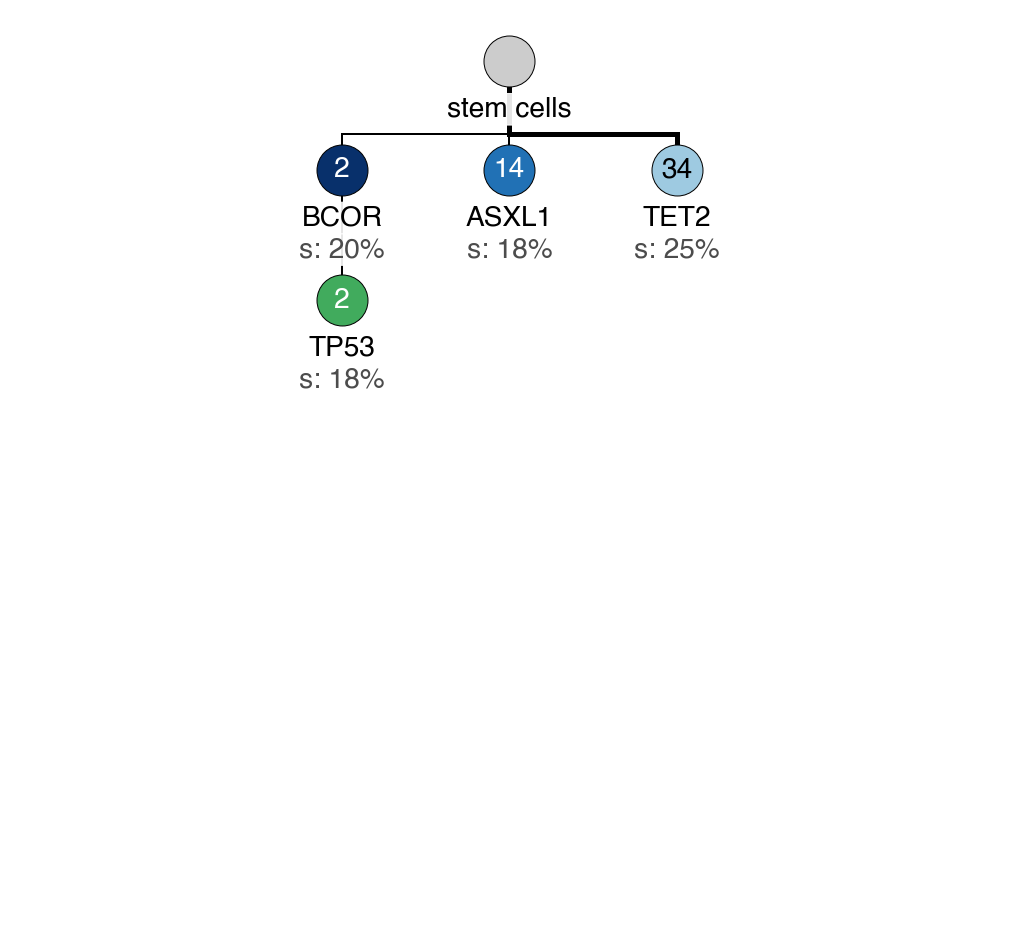

C92_062
fittest variant =  chr4q_CNLOH
AML ancestors =  ['chr4q_CNLOH', 'TET2_p.Y1766*', 'DNMT3A_p.G685R', 'stem cells']


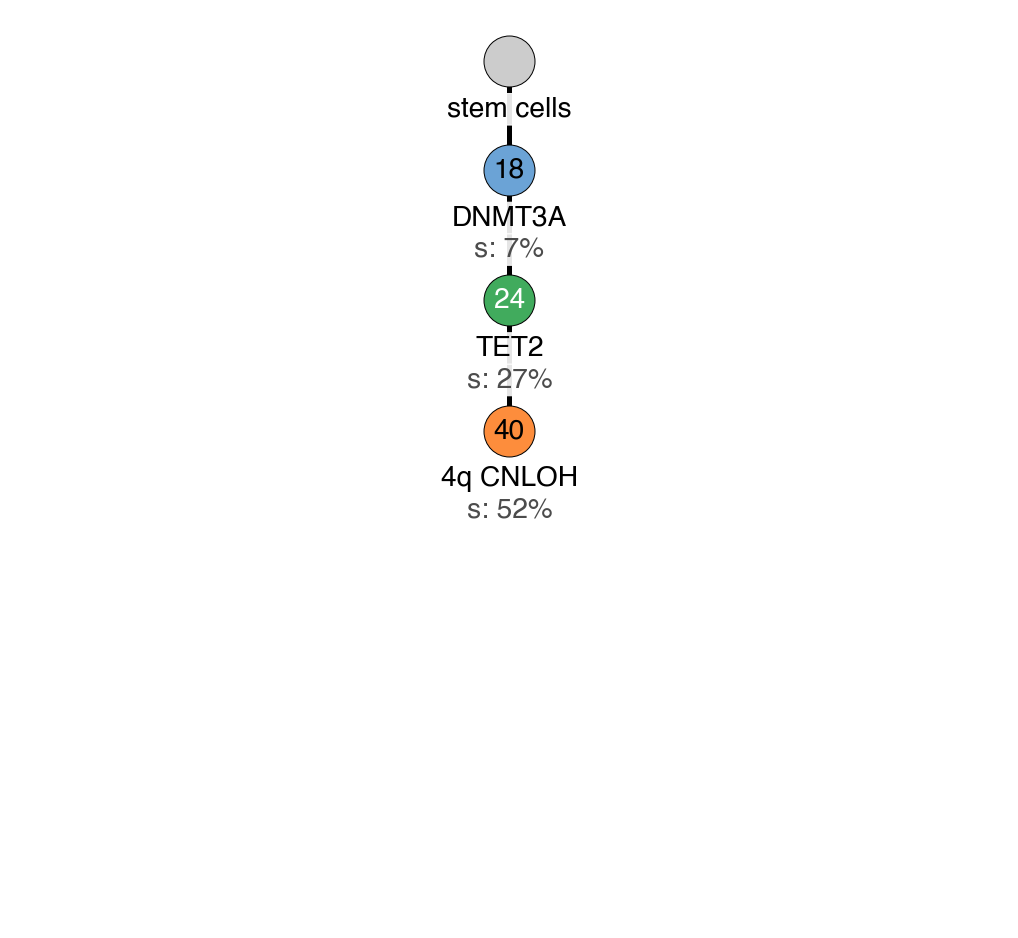

C92_064
fittest variant =  CEBPA_p.A170V
AML ancestors =  ['CEBPA_p.A170V', 'X', 'stem cells']


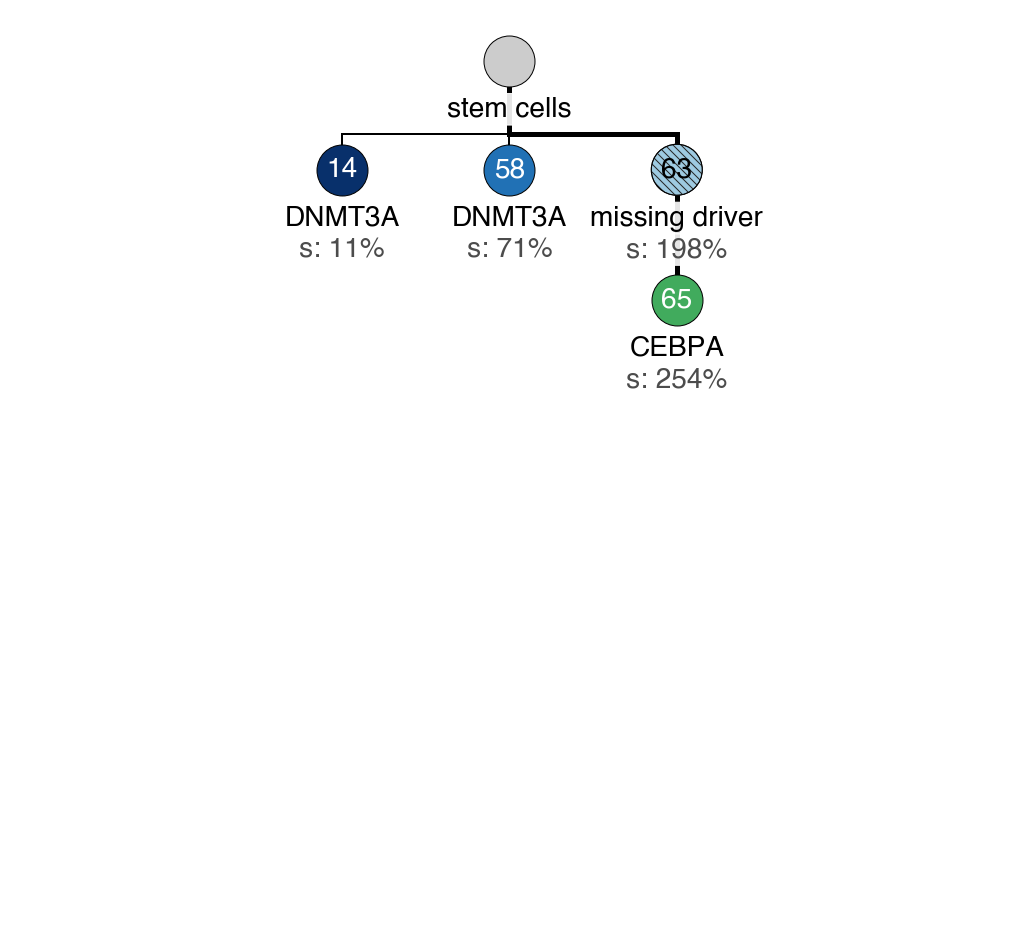

C92_065
fittest variant =  DNMT3A_p.Y365H
AML ancestors =  ['DNMT3A_p.Y365H', 'stem cells']


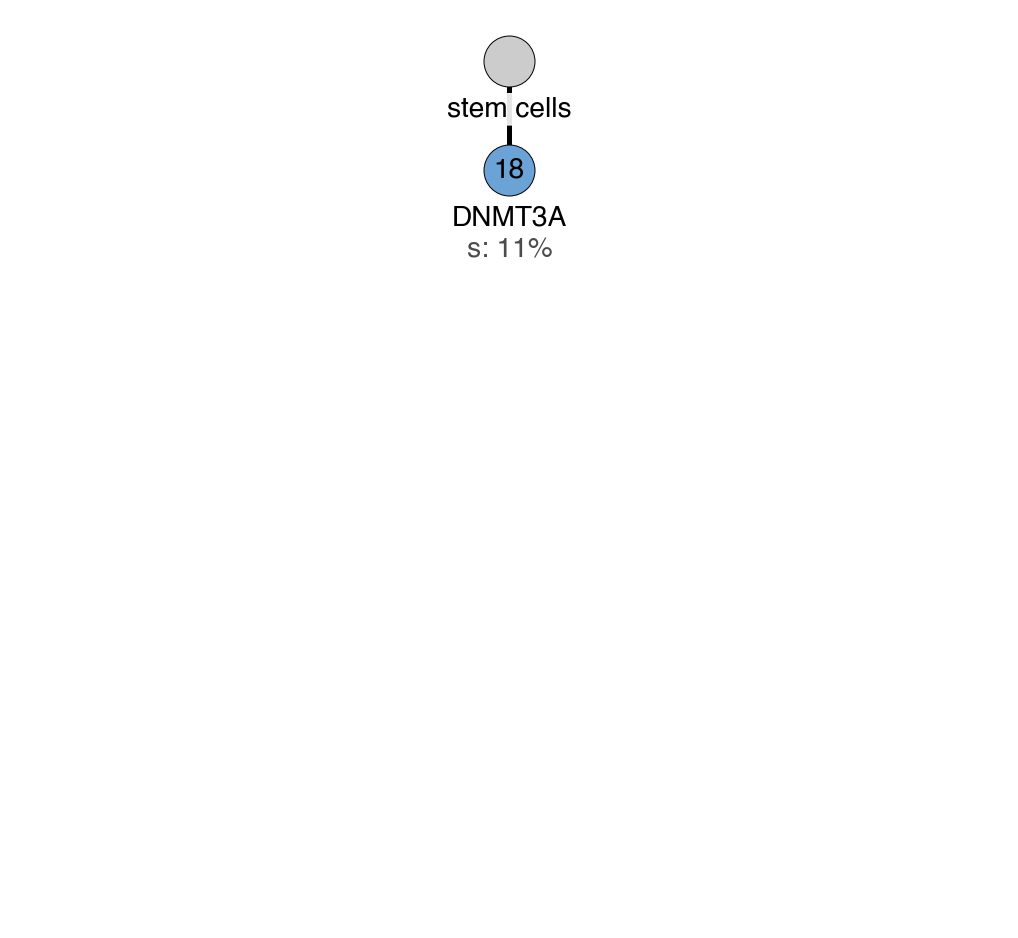

C92_066
fittest variant =  TP53_p.L111Q
AML ancestors =  ['TP53_p.L111Q', 'stem cells']


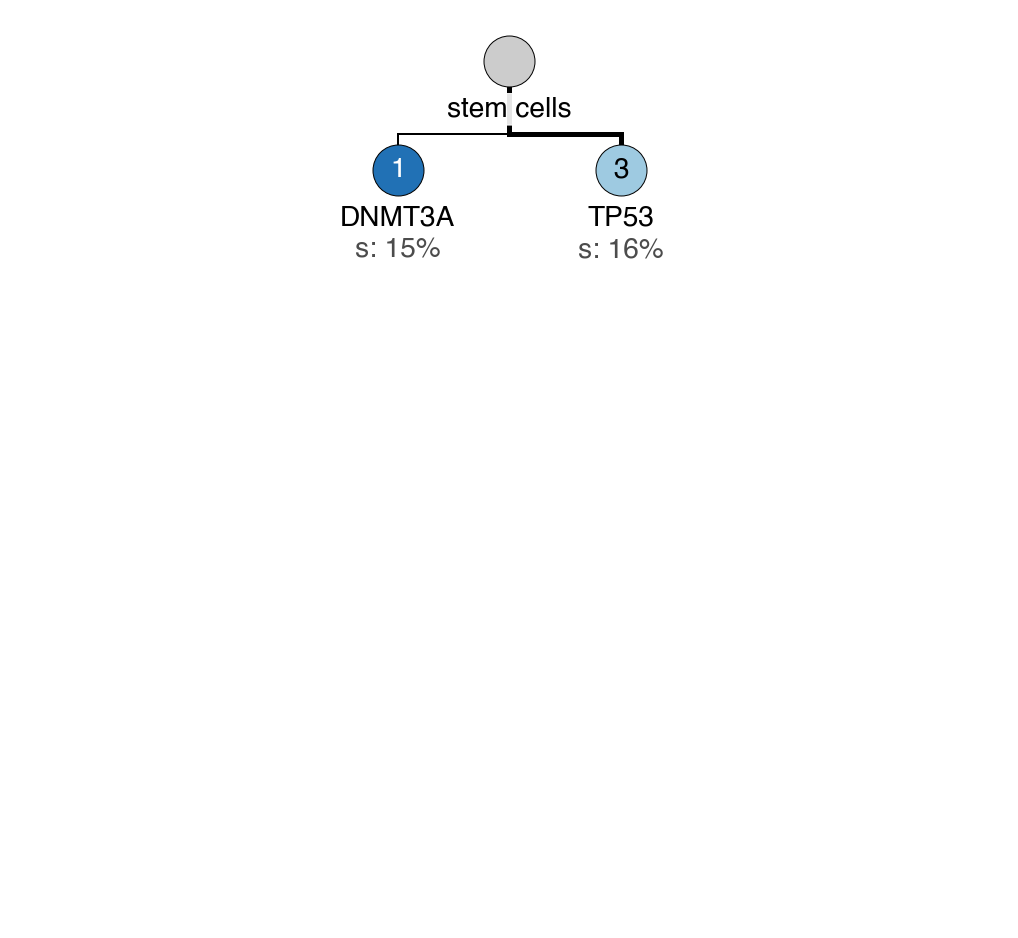

C92_067
fittest variant =  DNMT3A_p.Q692X
AML ancestors =  ['DNMT3A_p.Q692X', 'X', 'stem cells']


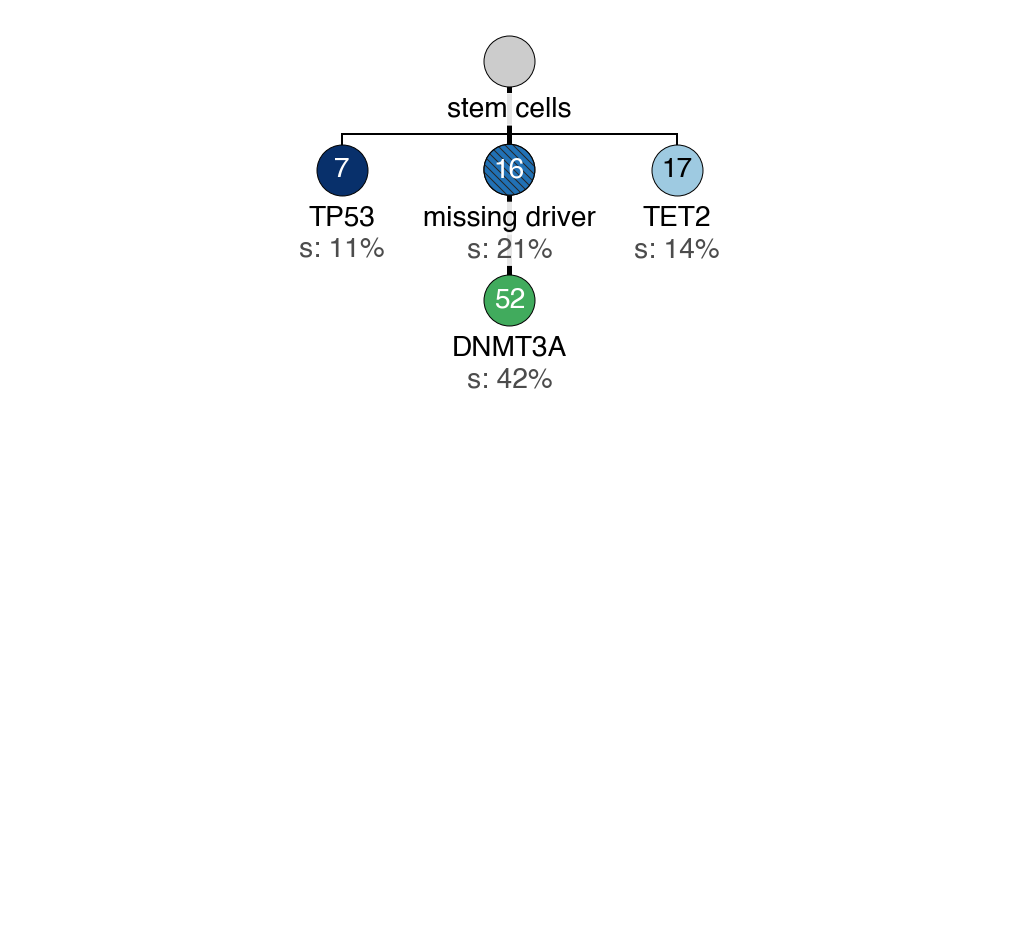

C92_068
fittest variant =  TET2_p.S675X
AML ancestors =  ['TET2_p.S675X', 'stem cells']


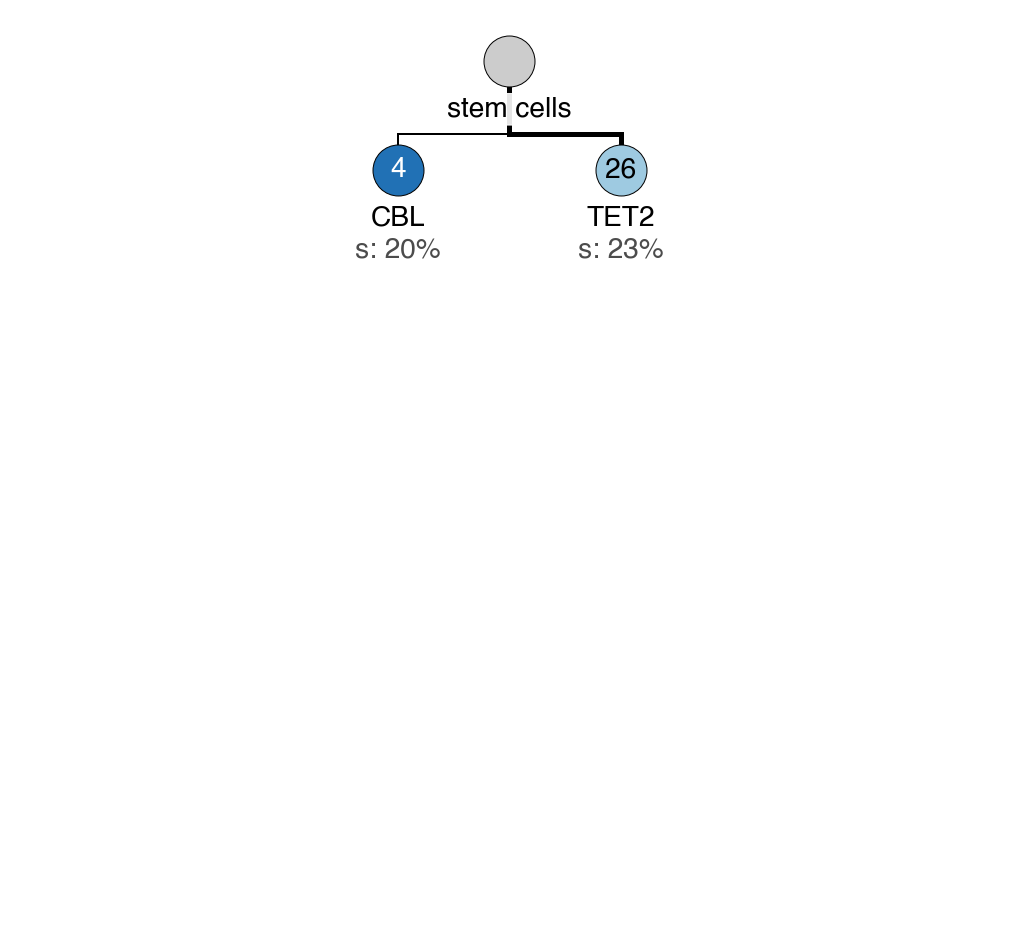

C92_070
fittest variant =  TP53_p.Y234C
AML ancestors =  ['TP53_p.Y234C', 'stem cells']


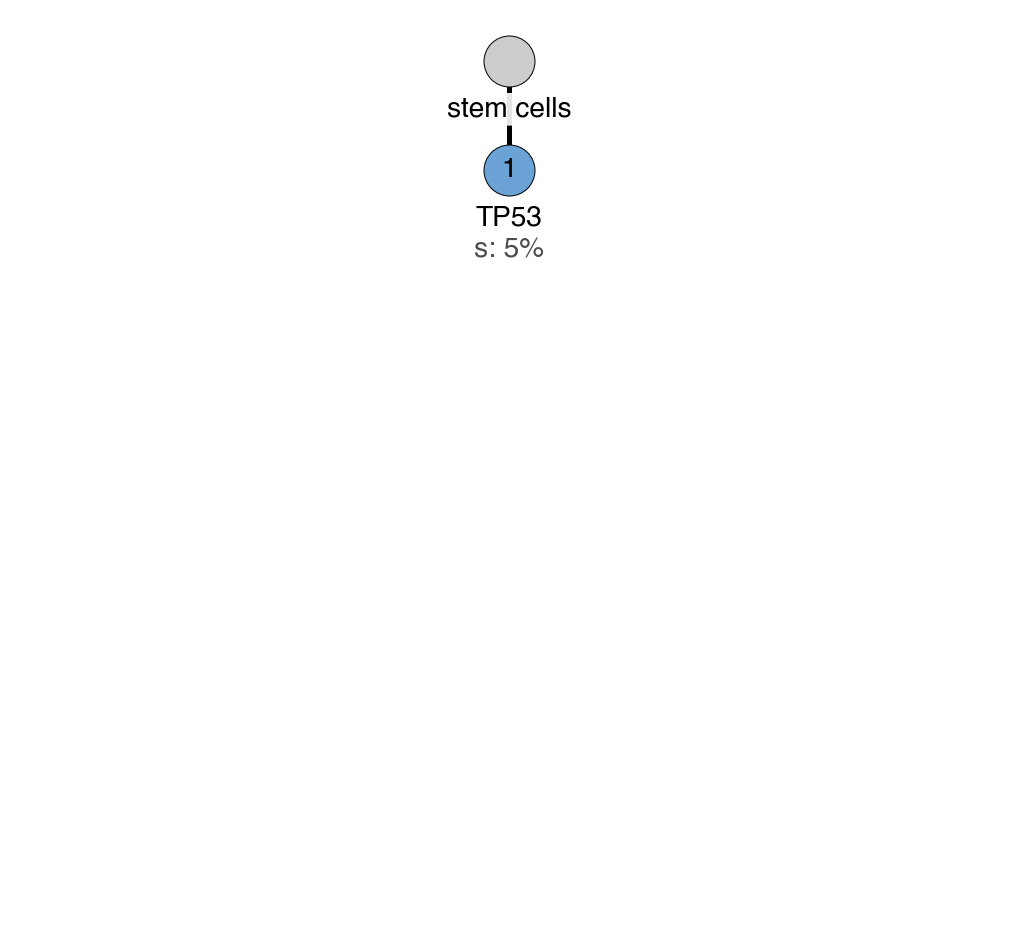

C92_072
fittest variant =  STAG2_p.R246X
AML ancestors =  ['STAG2_p.R246X', 'stem cells']


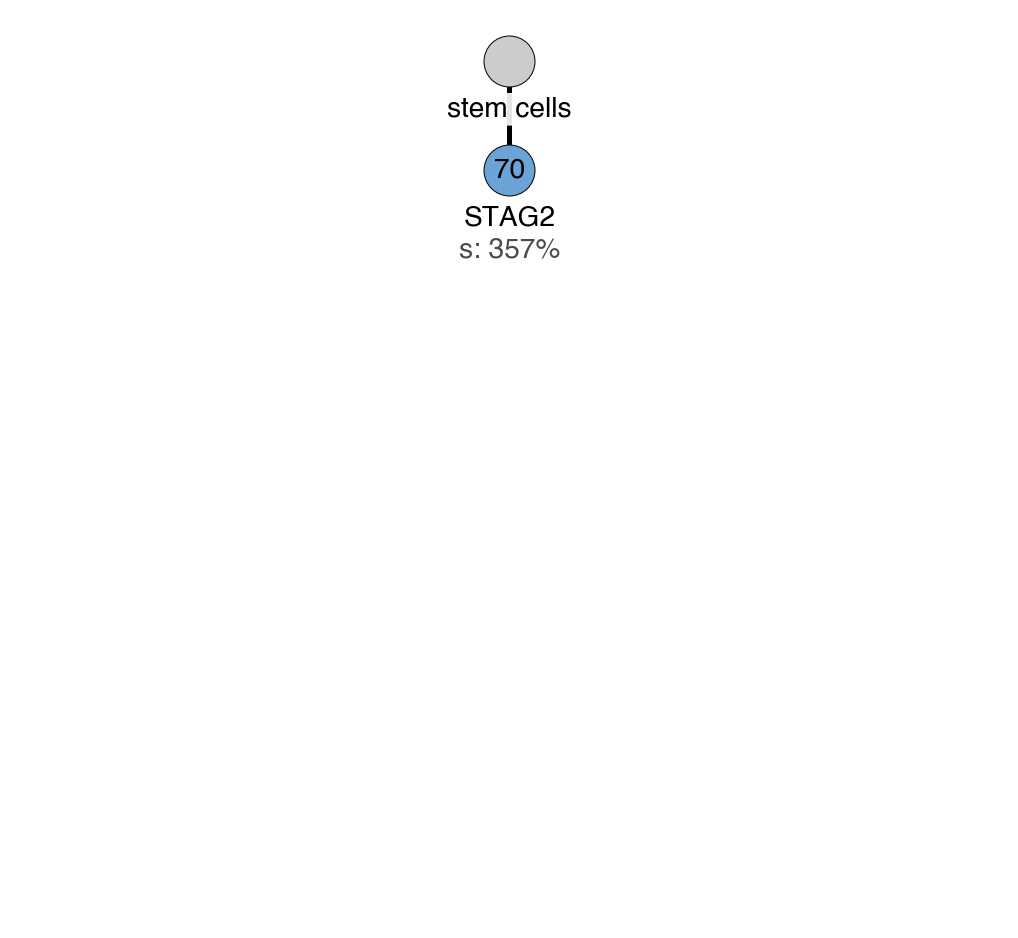

C92_086
fittest variant =  TET2_p.Q958Tfs*14
AML ancestors =  ['TET2_p.Q958Tfs*14', 'TET2_p.Y1560*', 'DNMT3A_p.R882H', 'stem cells']


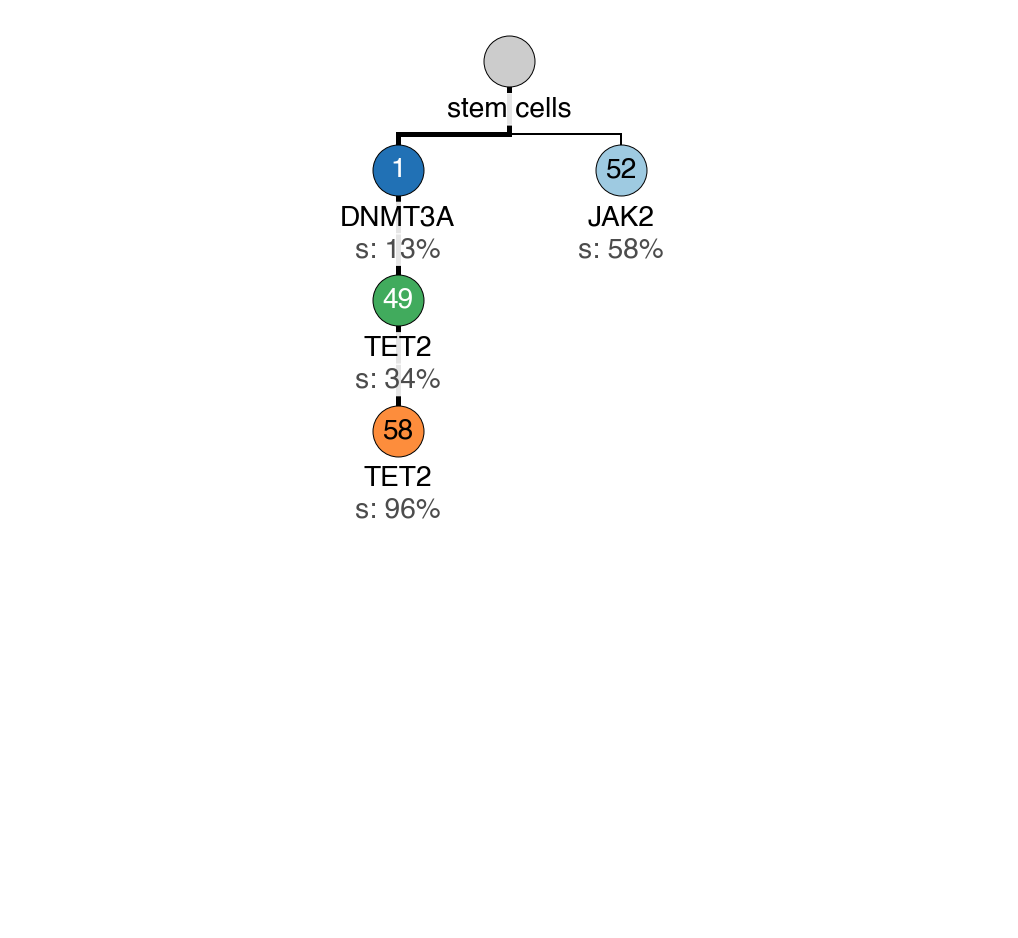

C92_088
fittest variant =  X
AML ancestors =  ['X', 'stem cells']


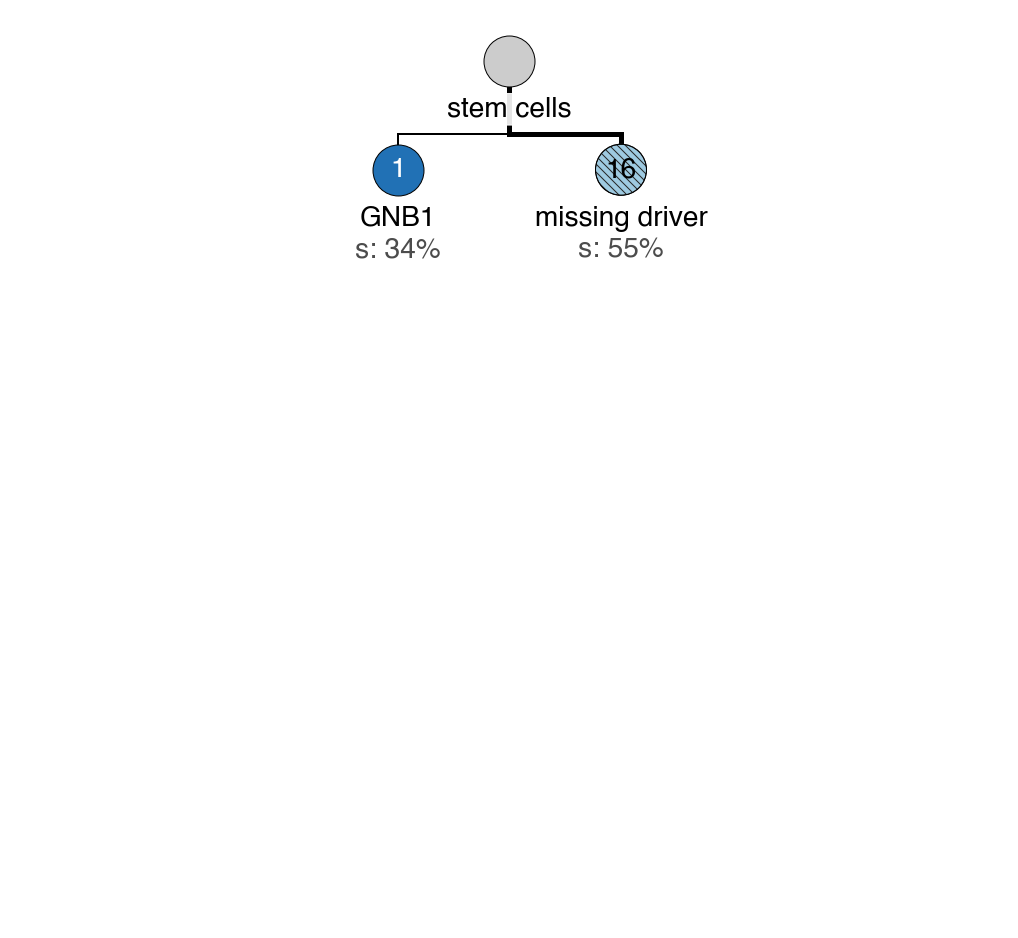

C92_090
fittest variant =  DNMT3A_p.R803K
AML ancestors =  ['DNMT3A_p.R803K', 'stem cells']


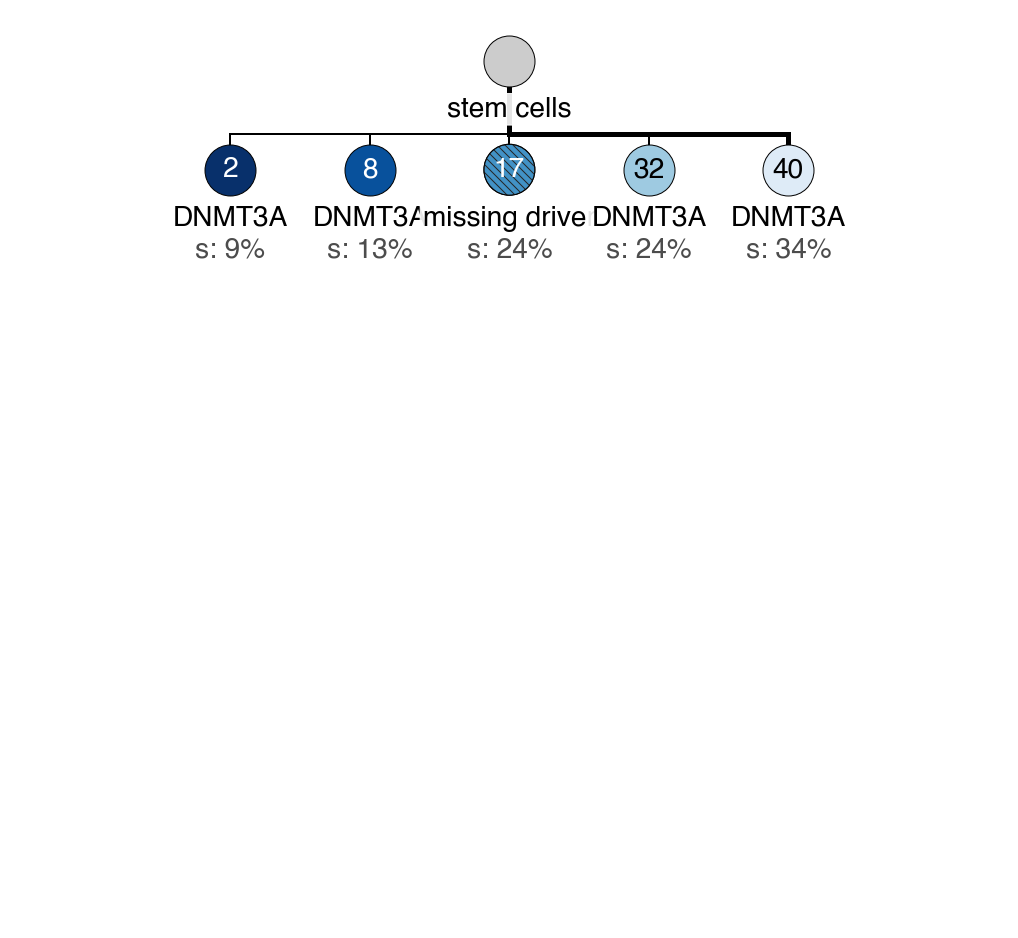

In [29]:
for case in cases.keys():
    if case not in ['C92_015', 'C92_039', 'C92_043', 'C92_044', 'C92_048', 'C92_063']: #these samples did not have detectable variants
        print(case)
        plot_phylogenies_v2(case, optimiser_df_d, dark_colors)

CNTRL_001
fittest variant =  DNMT3A_p.Q110R


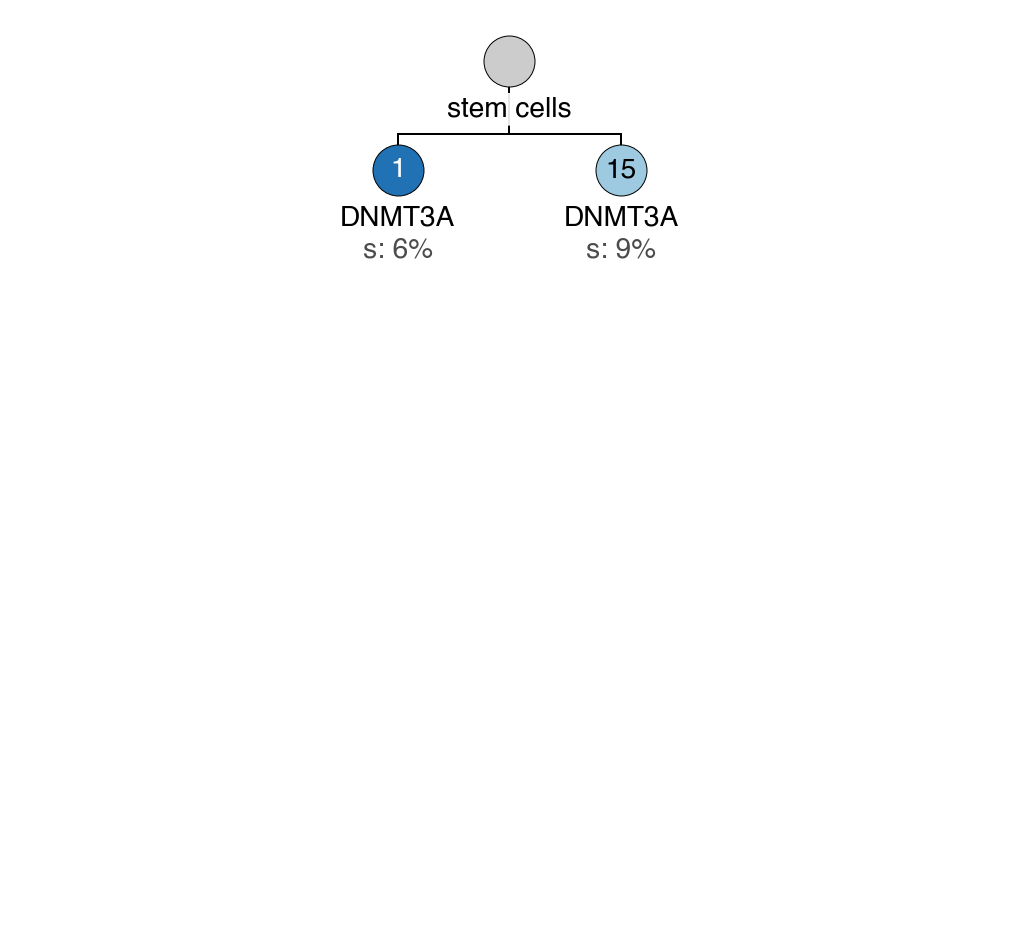

CNTRL_002
fittest variant =  TP53_p.P151S


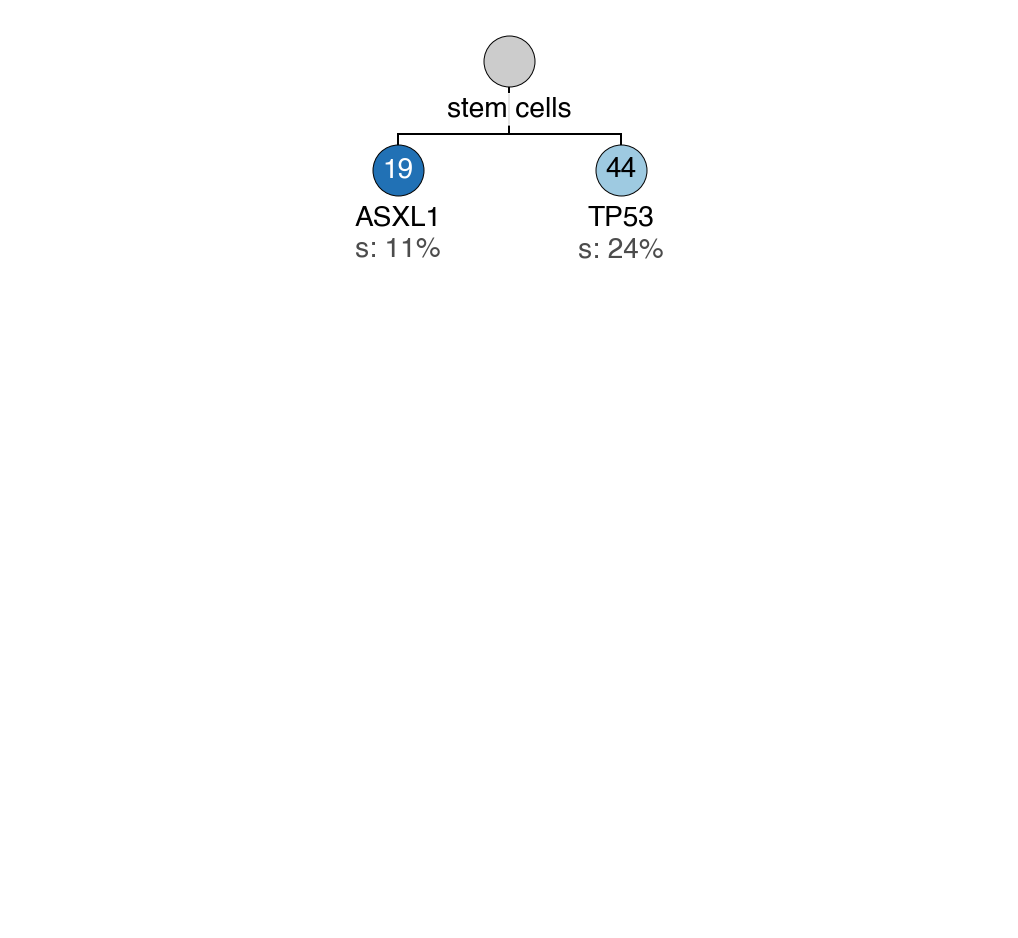

CNTRL_004
fittest variant =  DNMT3A_p.F731I


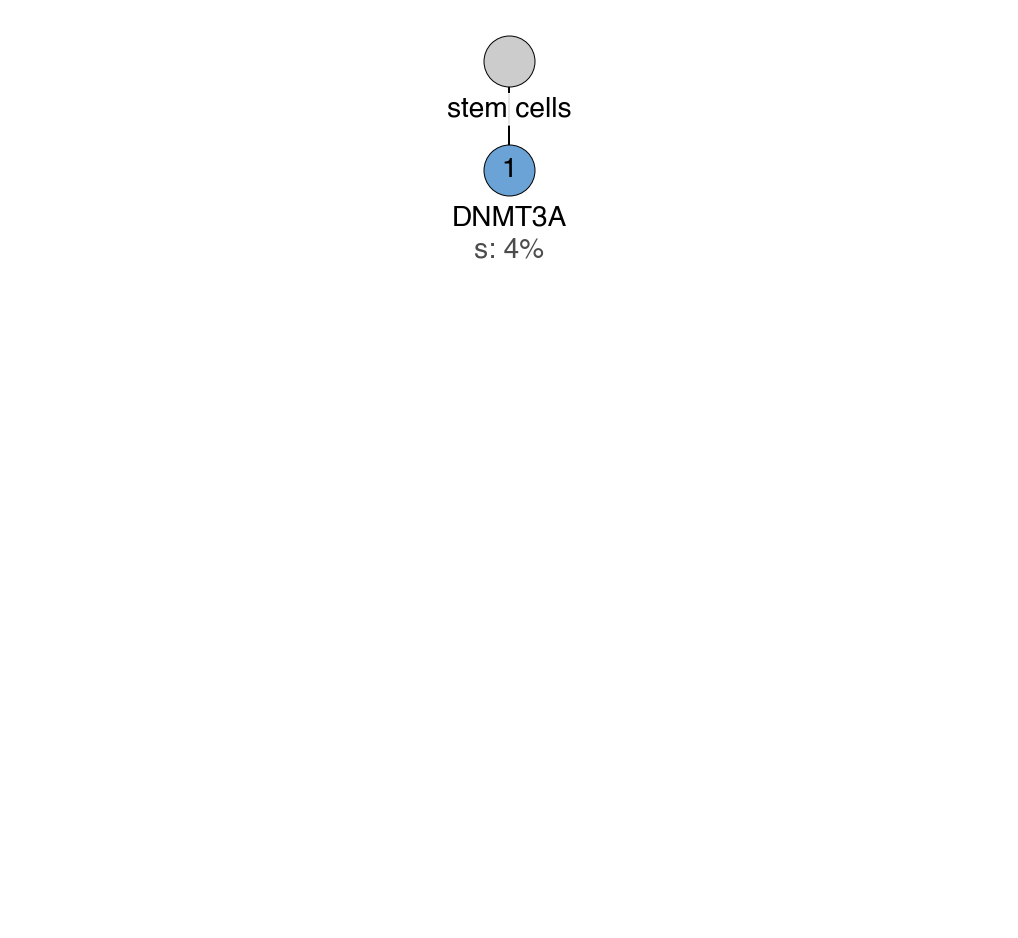

CNTRL_005
fittest variant =  X


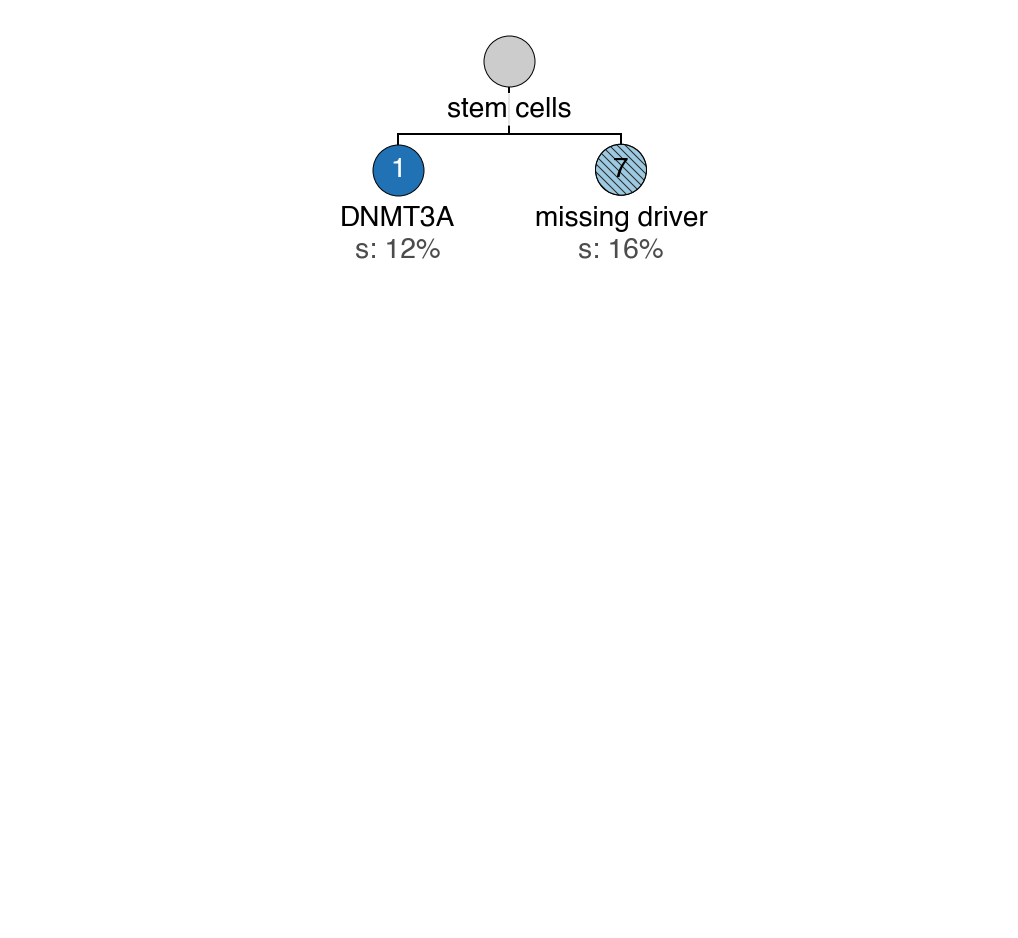

CNTRL_122
fittest variant =  TET2_p.P267Hfs*26


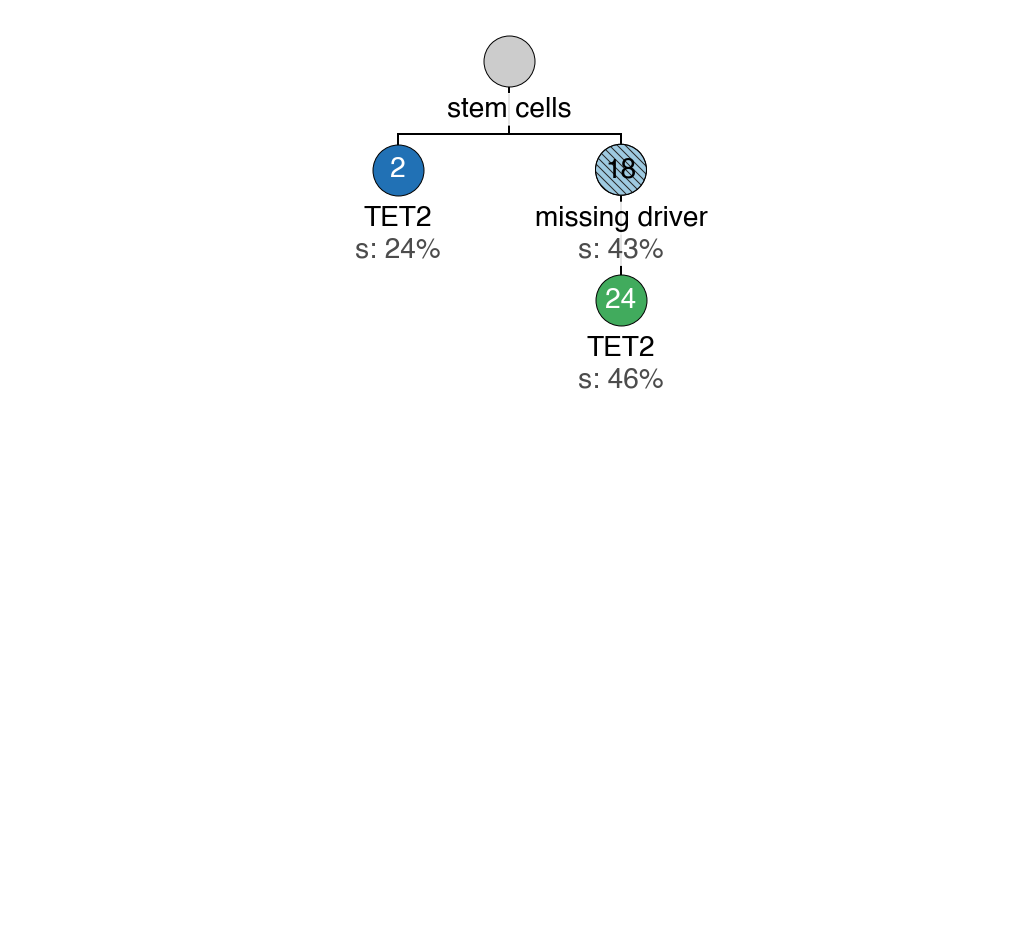

CNTRL_160
fittest variant =  TET2_p.C1263F


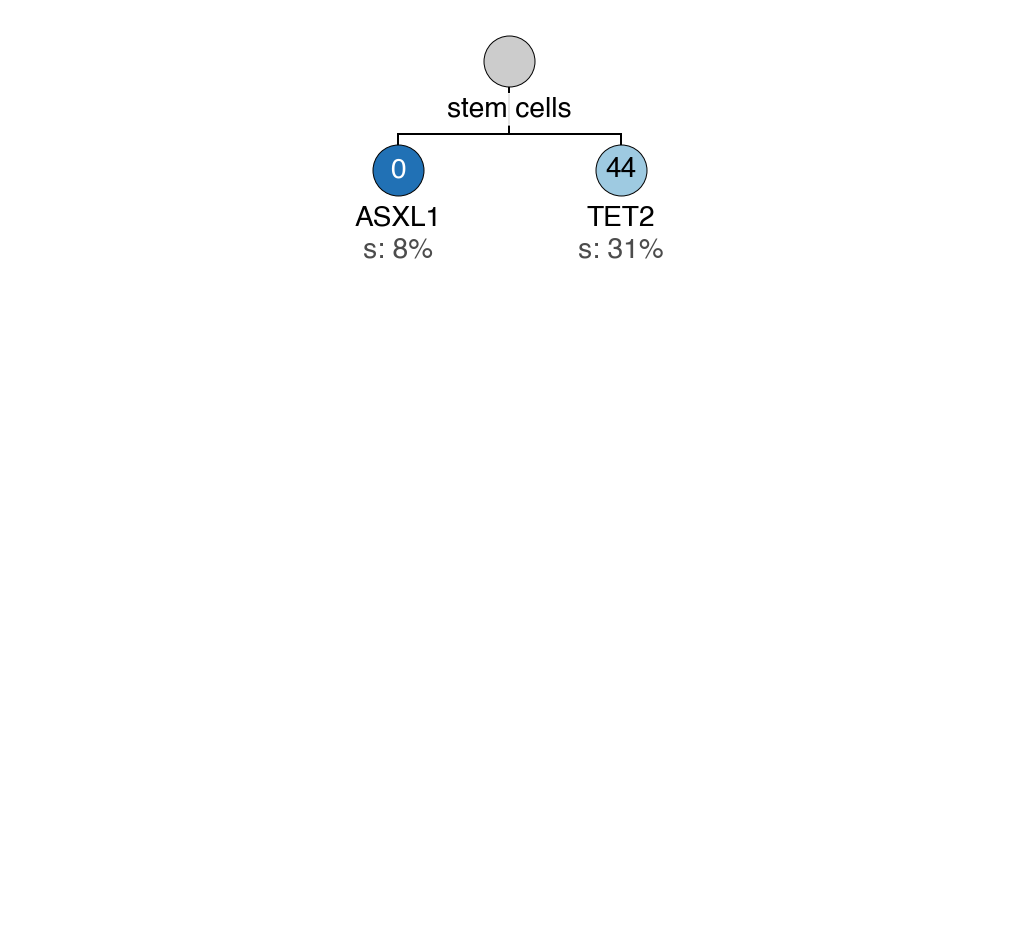

CNTRL_162
fittest variant =  X


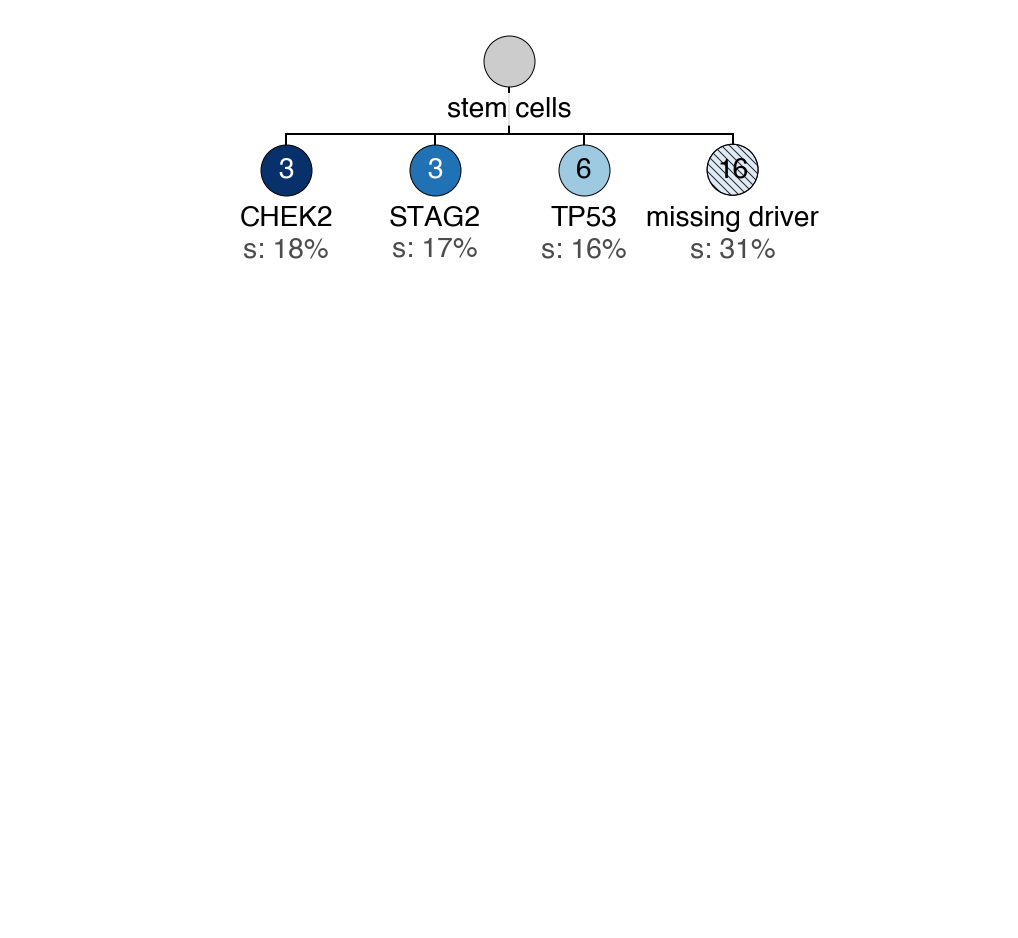

CNTRL_163
fittest variant =  GNAS_p.R86S


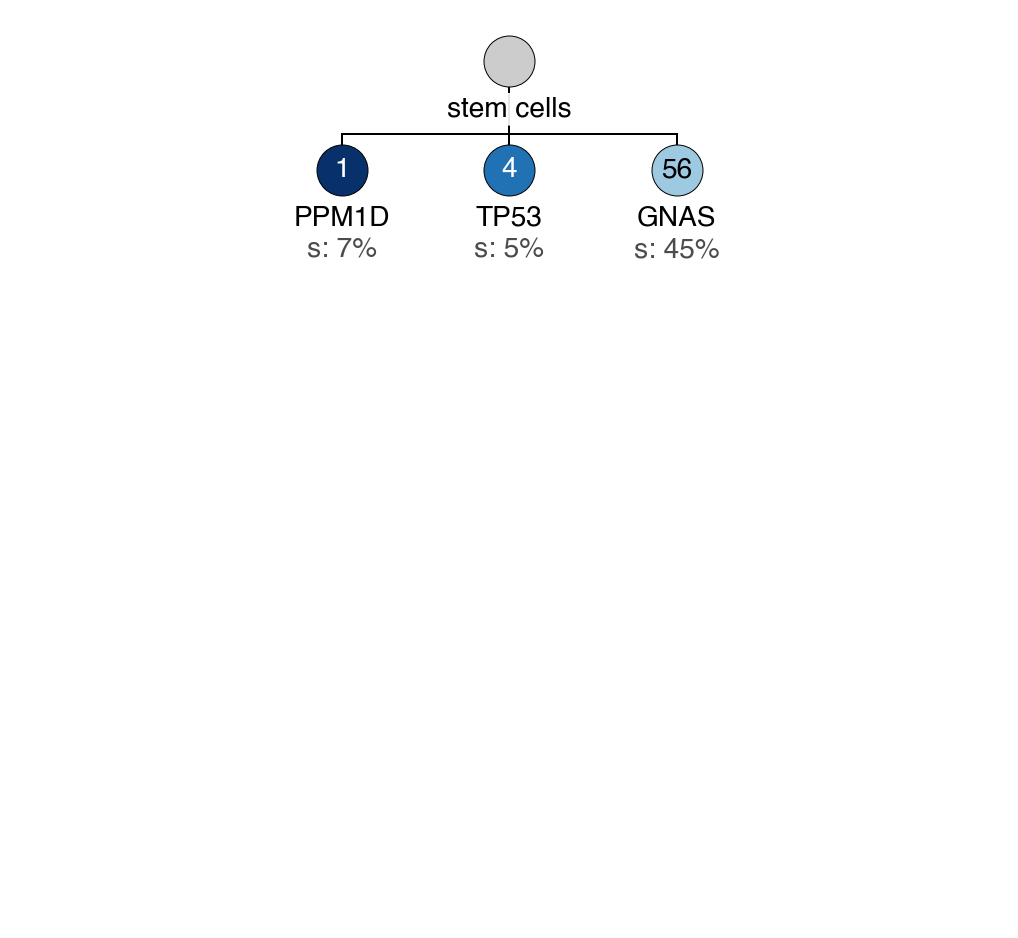

CNTRL_164
fittest variant =  TET2_p.P1194R


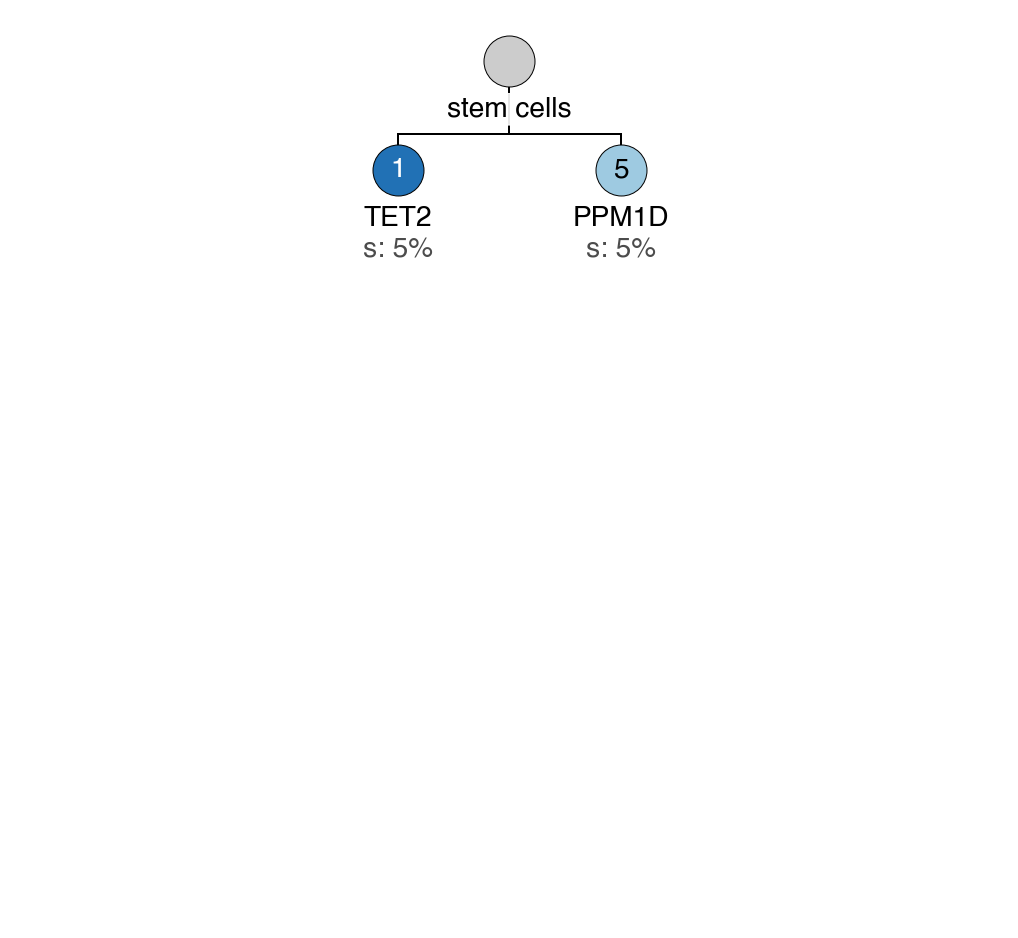

CNTRL_166
fittest variant =  EZH2_p.E740D


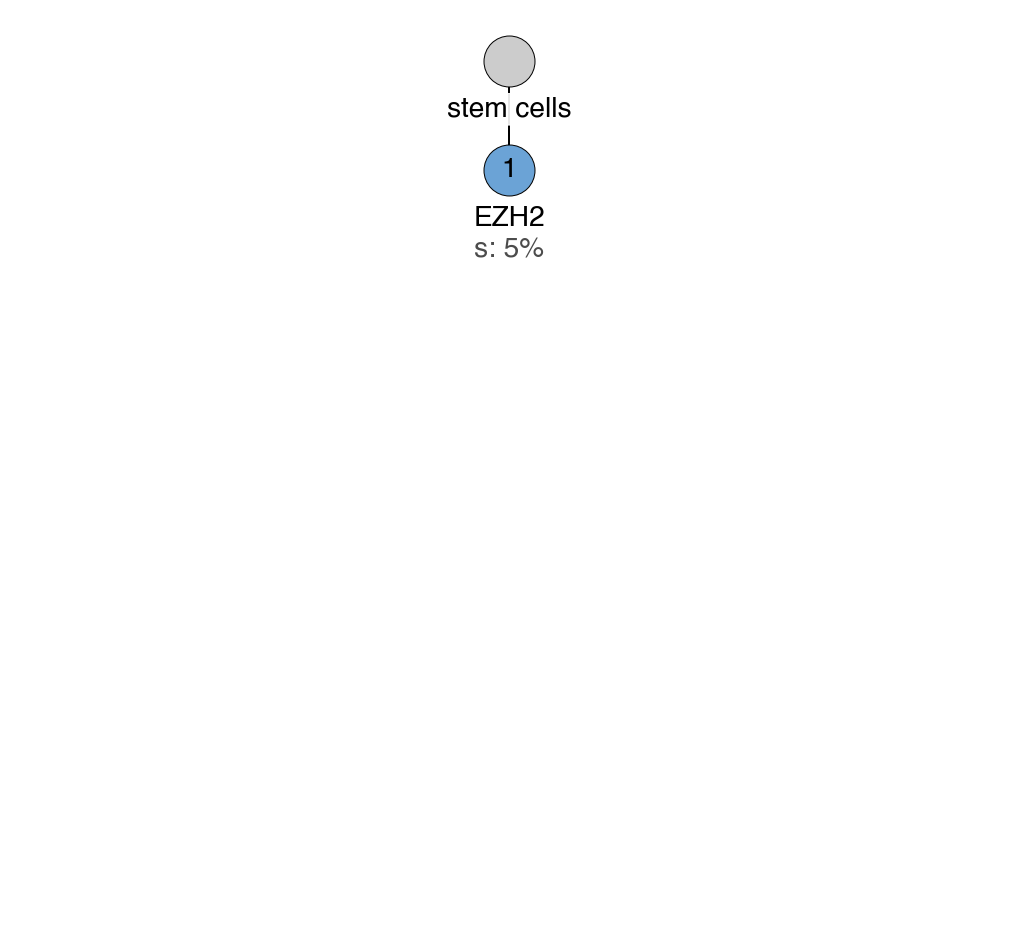

CNTRL_167
fittest variant =  X


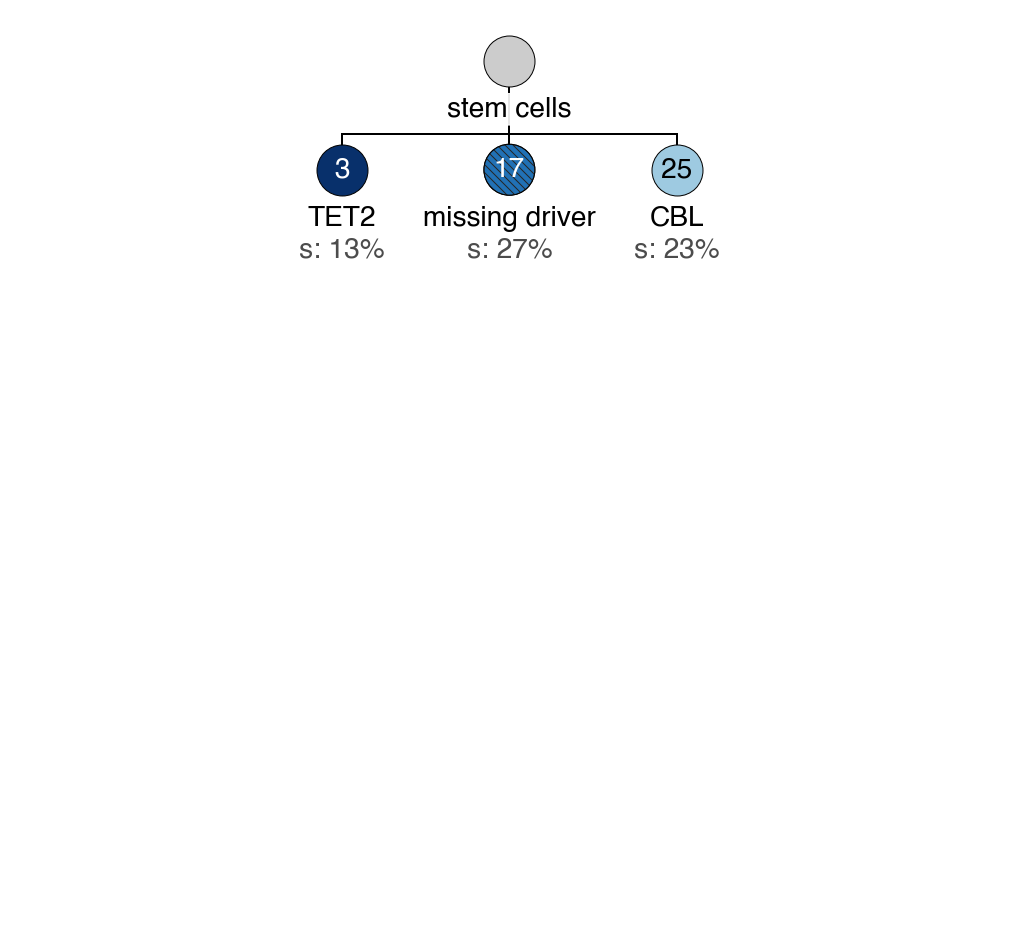

CNTRL_168
fittest variant =  DNMT3A_p.R556S


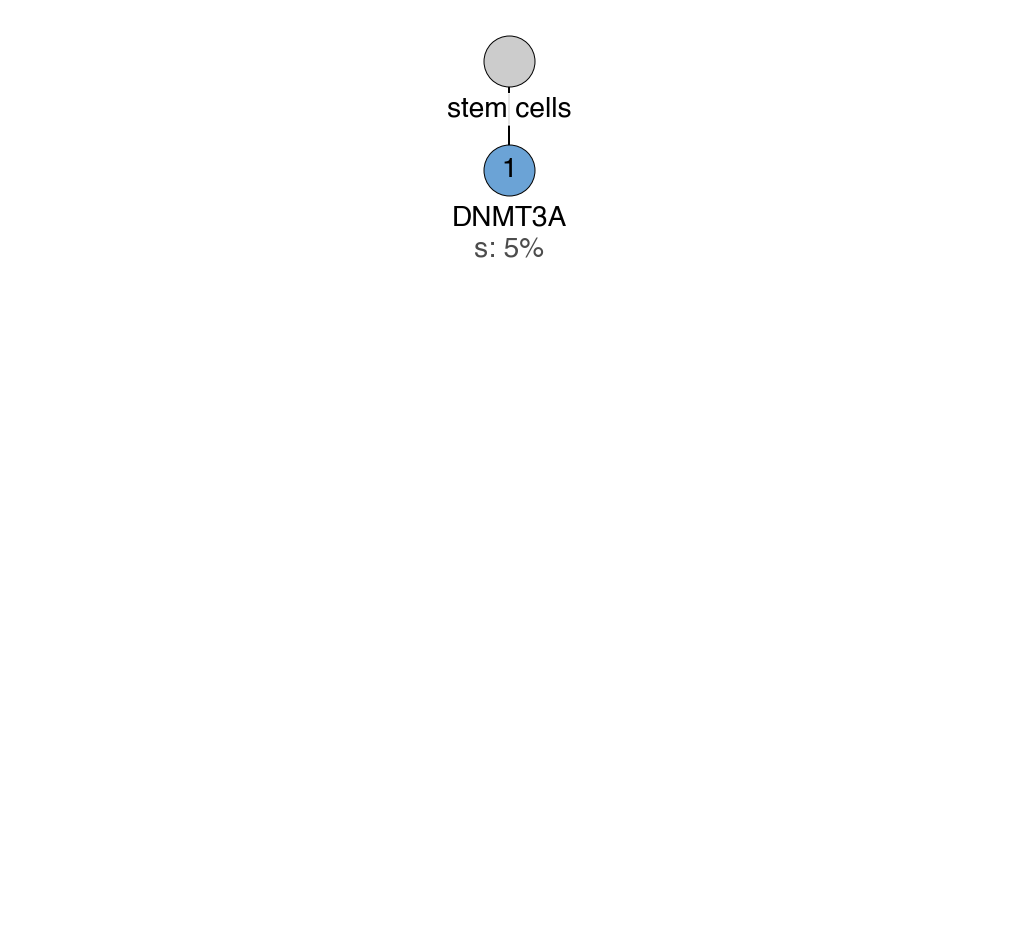

CNTRL_169
fittest variant =  DNMT3A_p.Q696P


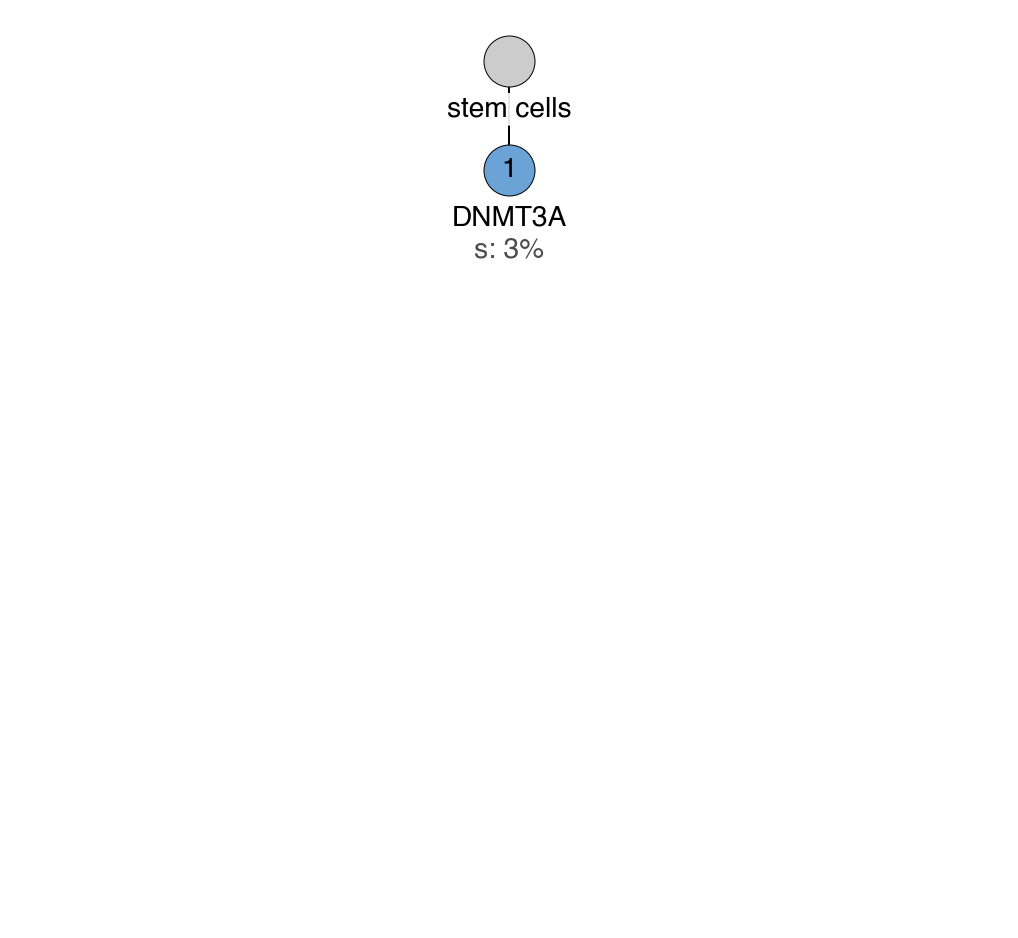

CNTRL_172
fittest variant =  PPM1D_p.S453X


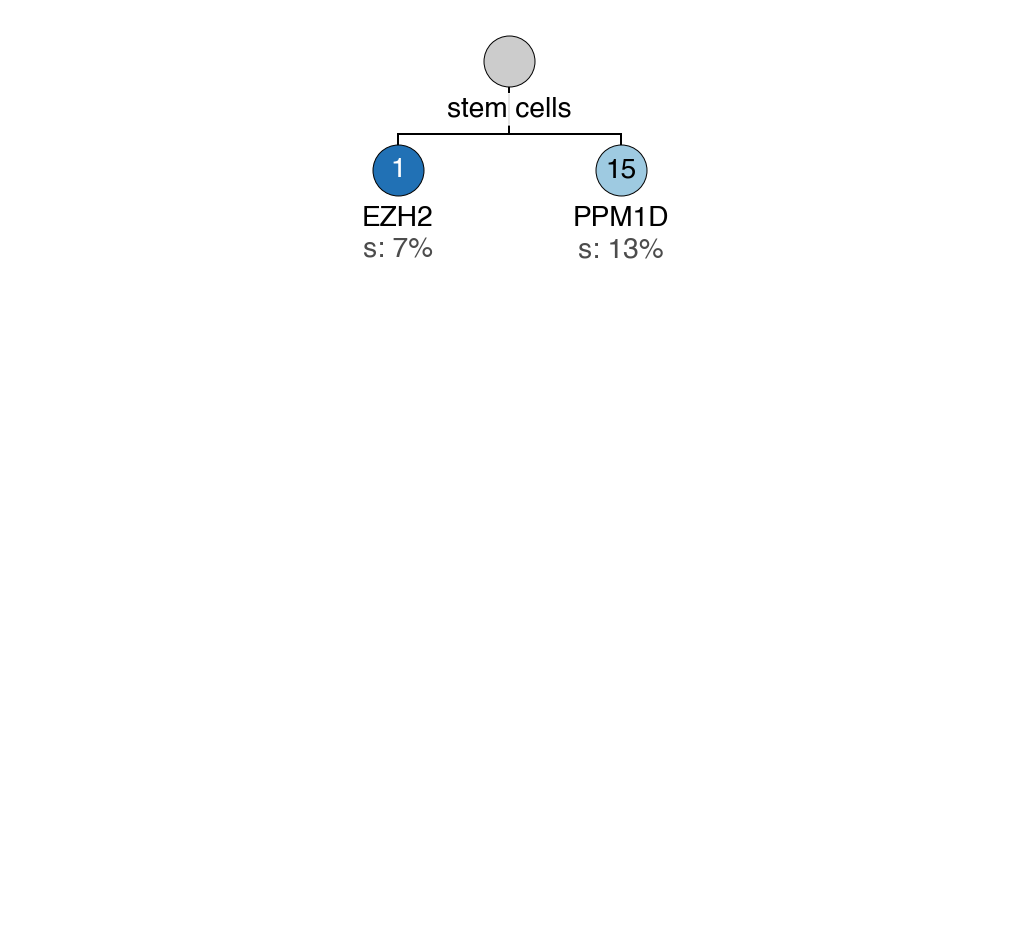

CNTRL_173
fittest variant =  DNMT3A_p.R771X


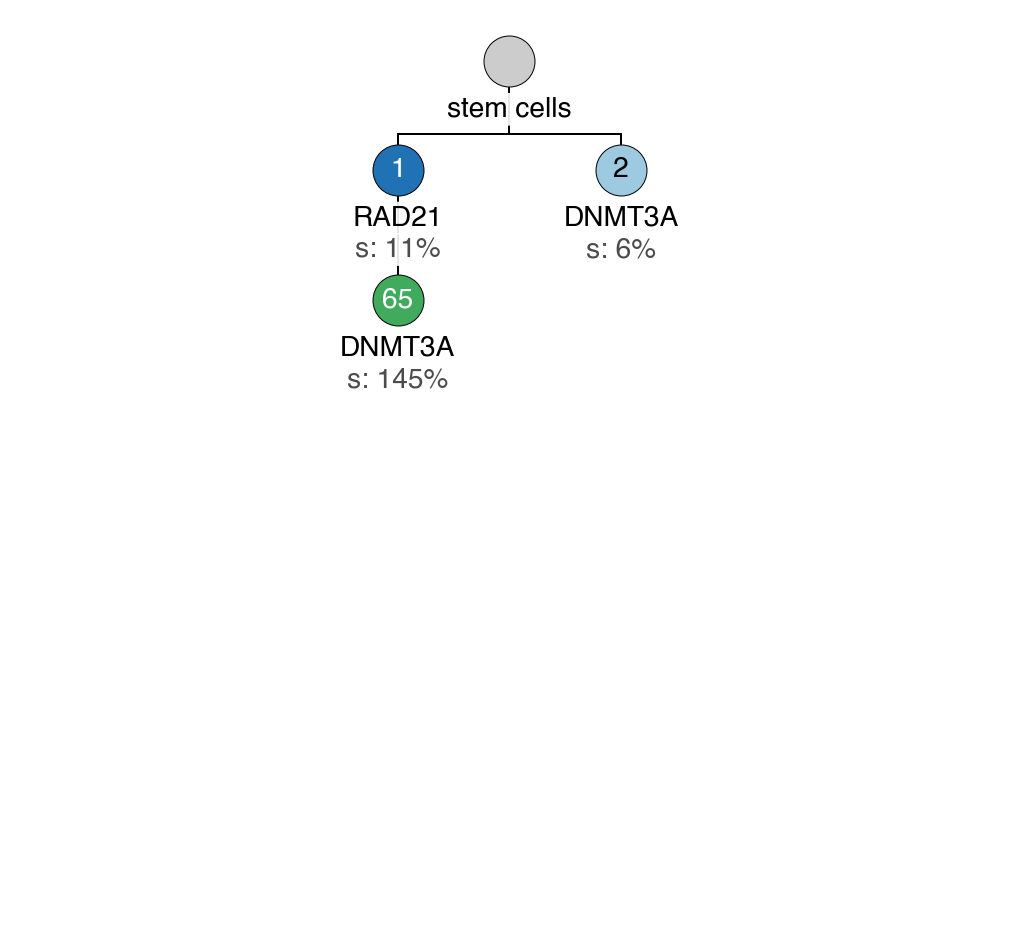

CNTRL_175
fittest variant =  TET2_p.R1516X


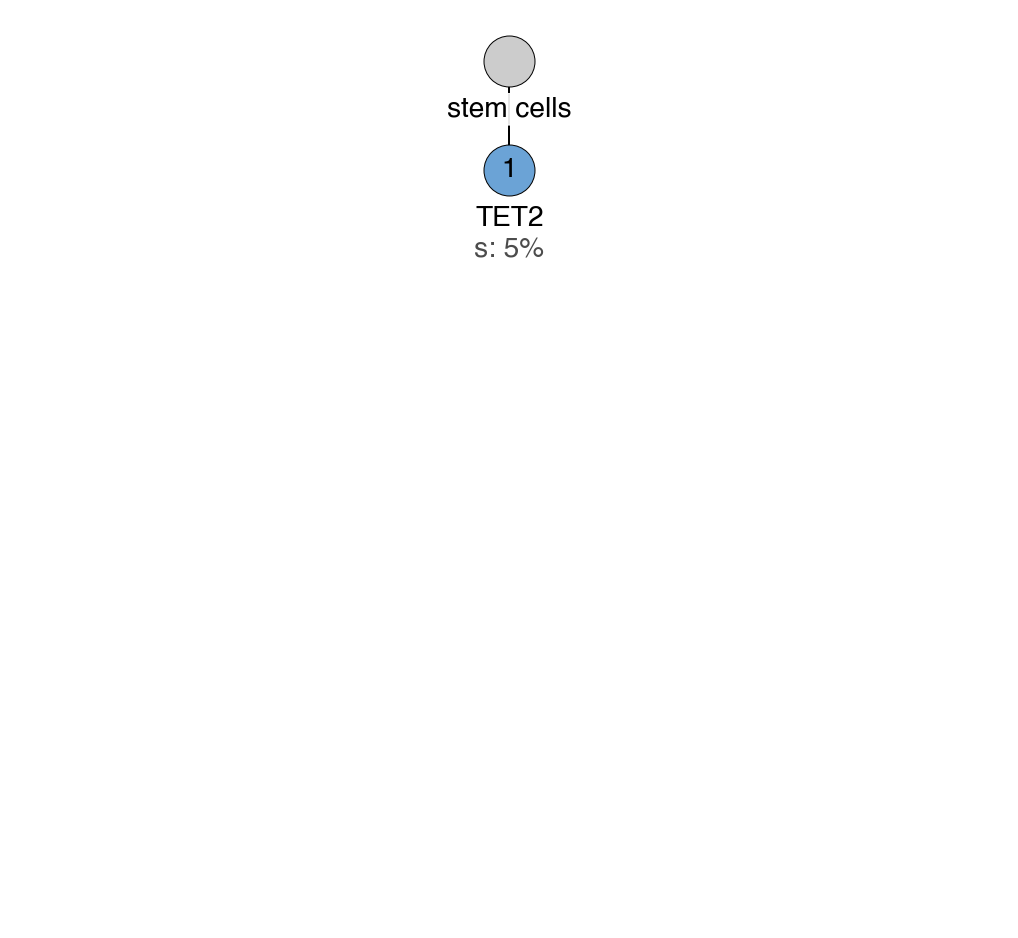

CNTRL_178
fittest variant =  TET2_p.R544X


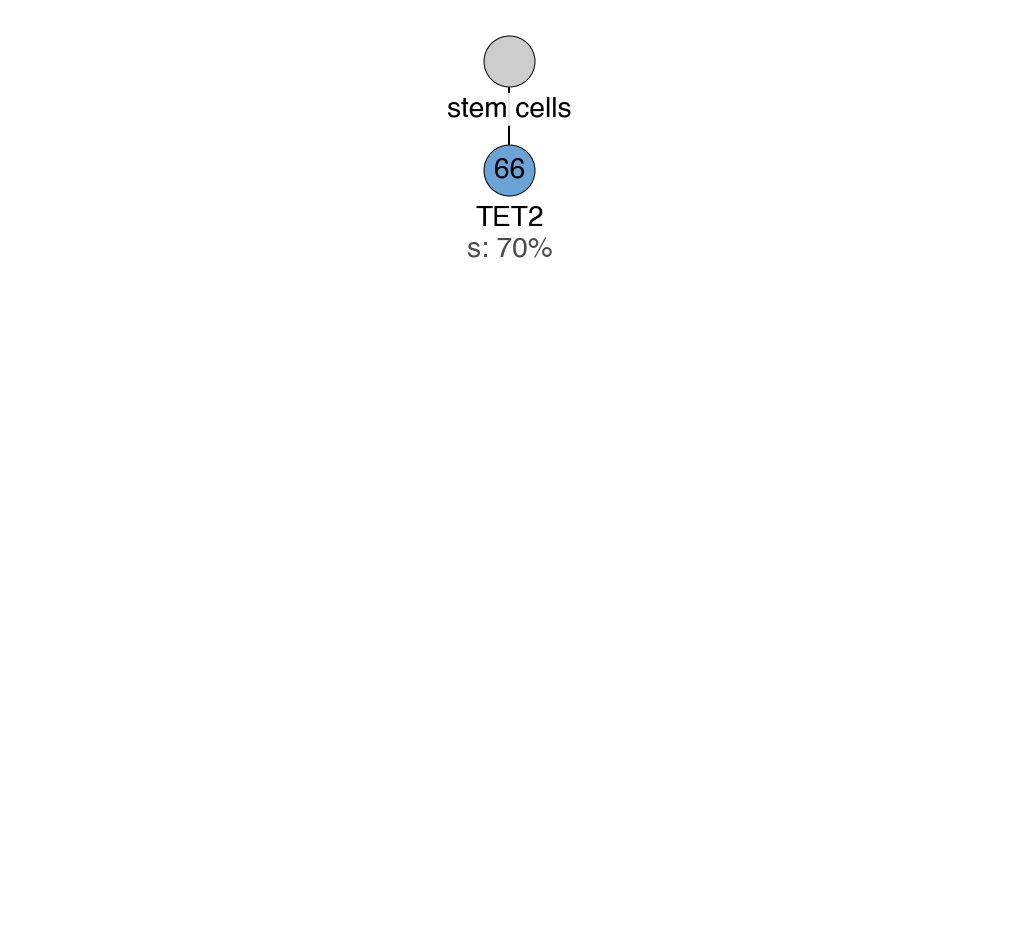

CNTRL_179
fittest variant =  ZRSR2_p.R126X


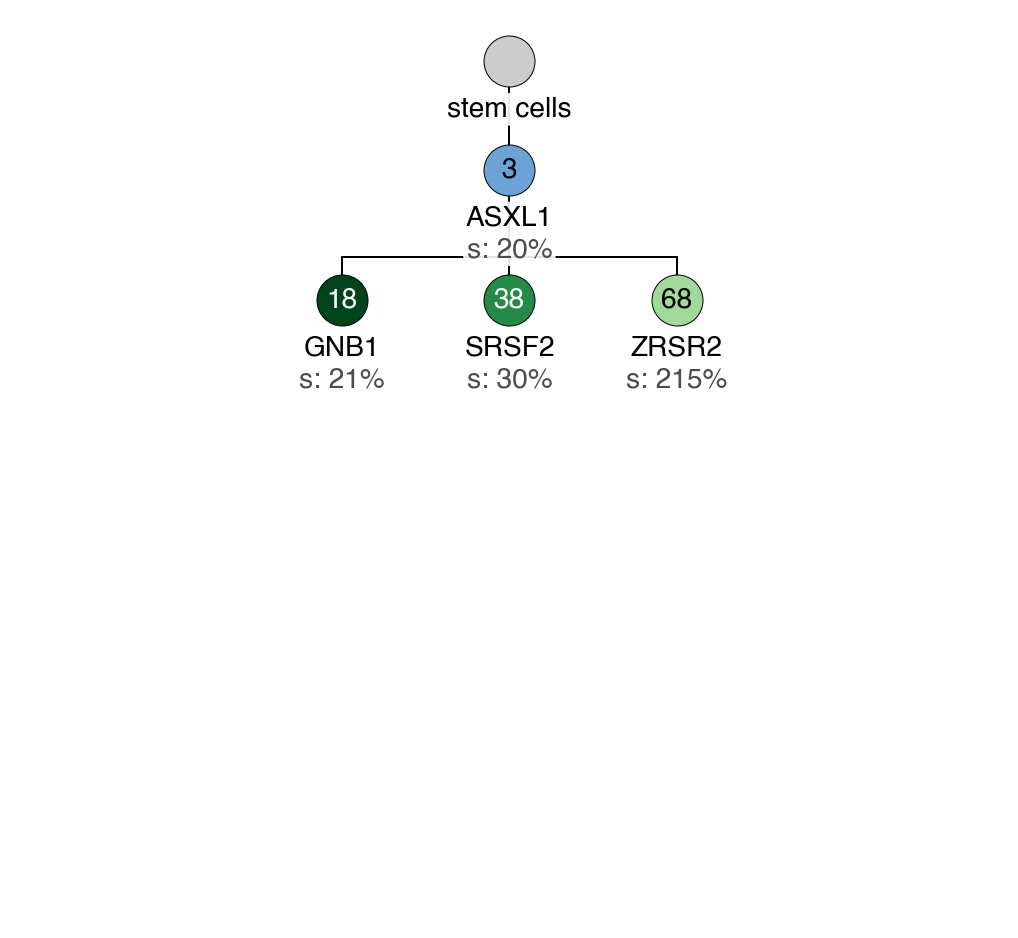

CNTRL_180
fittest variant =  CHEK2_p.R474C


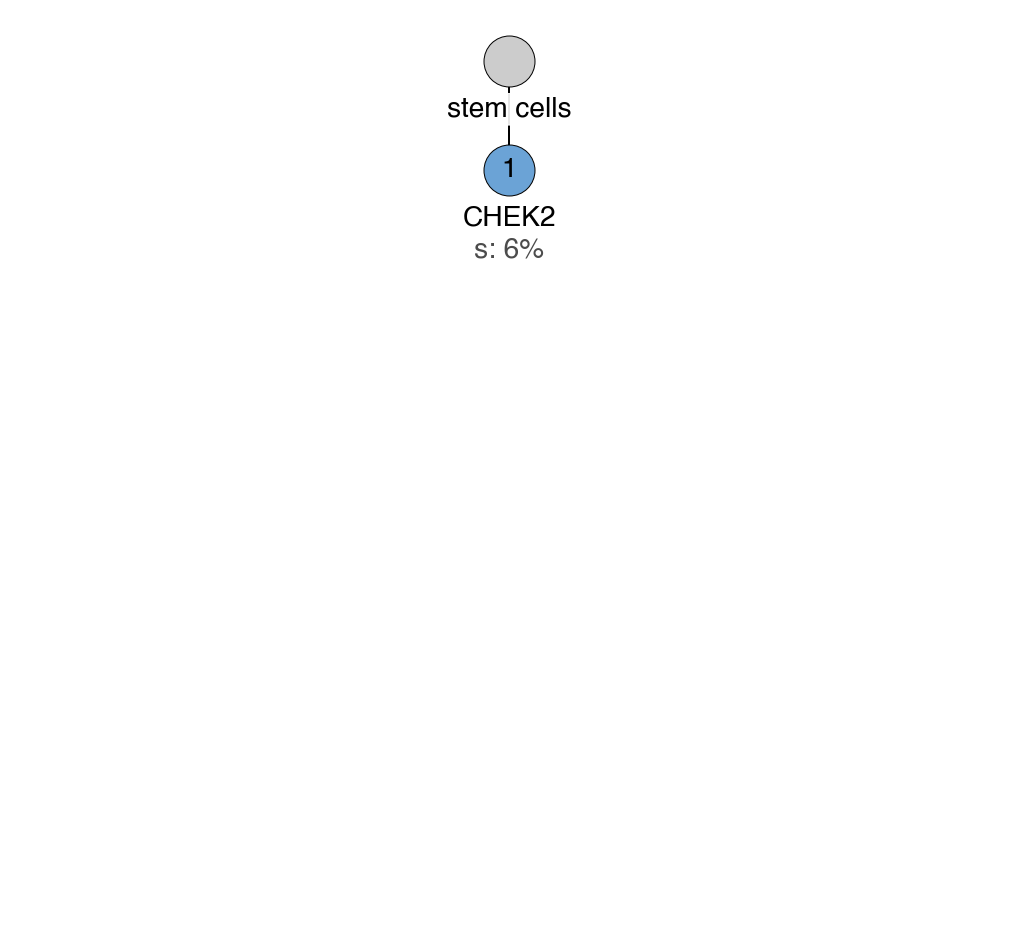

CNTRL_182
fittest variant =  DNMT3A_p.A571Sfs*3


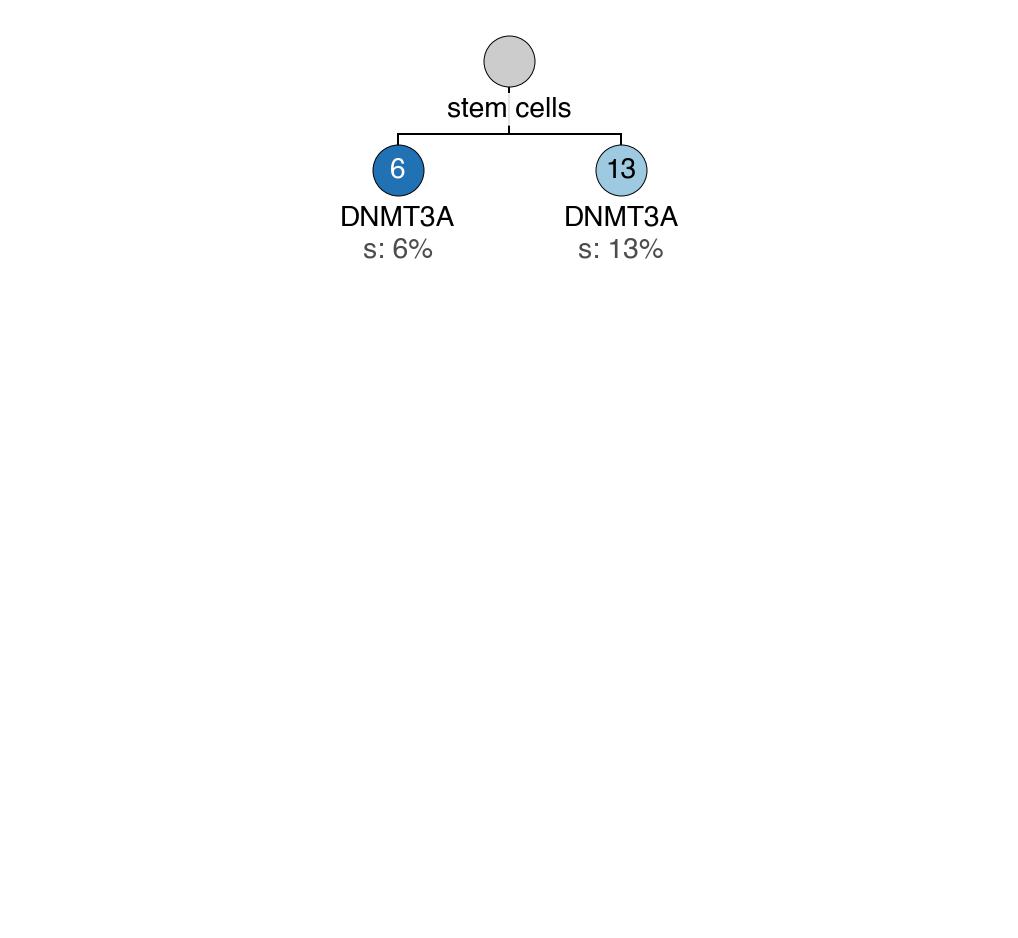

CNTRL_183
fittest variant =  CHEK2_p.Q11H


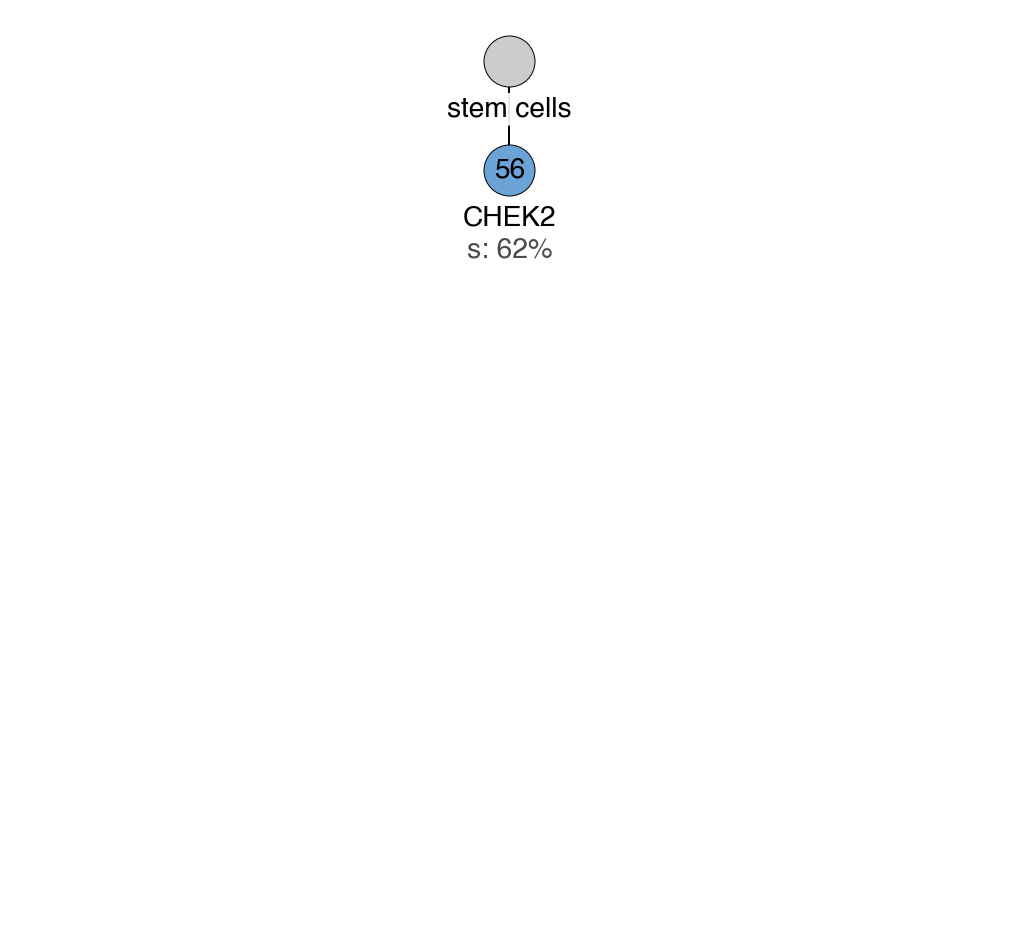

CNTRL_184
fittest variant =  DNMT3A_p.R882H


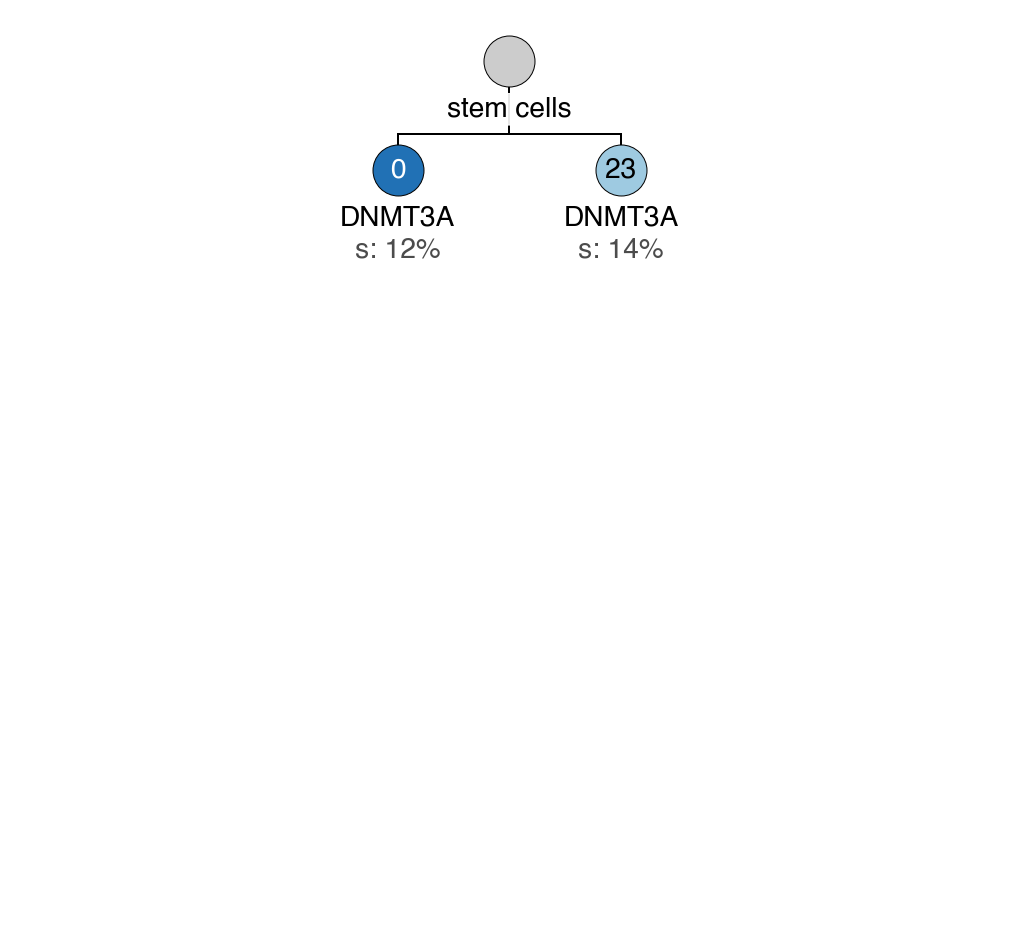

CNTRL_185
fittest variant =  DNMT3A_p.F732I


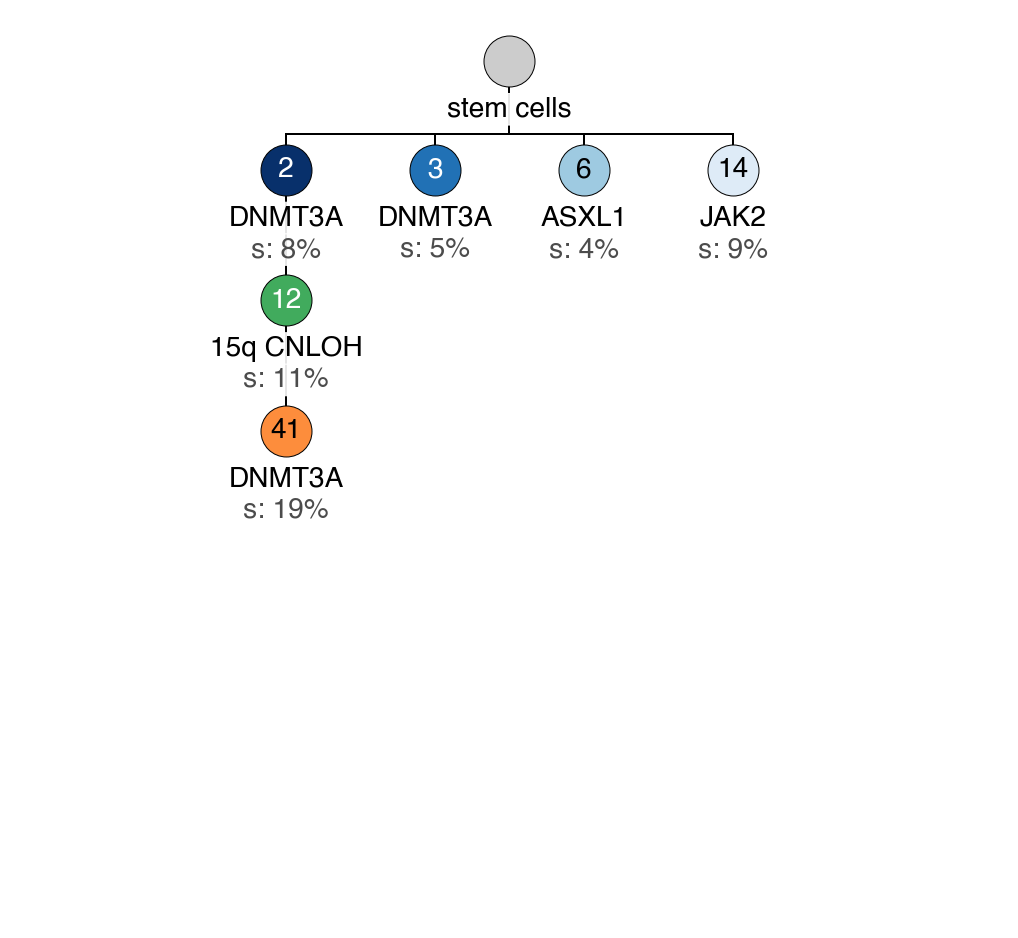

CNTRL_186
fittest variant =  TET2_p.T1884A


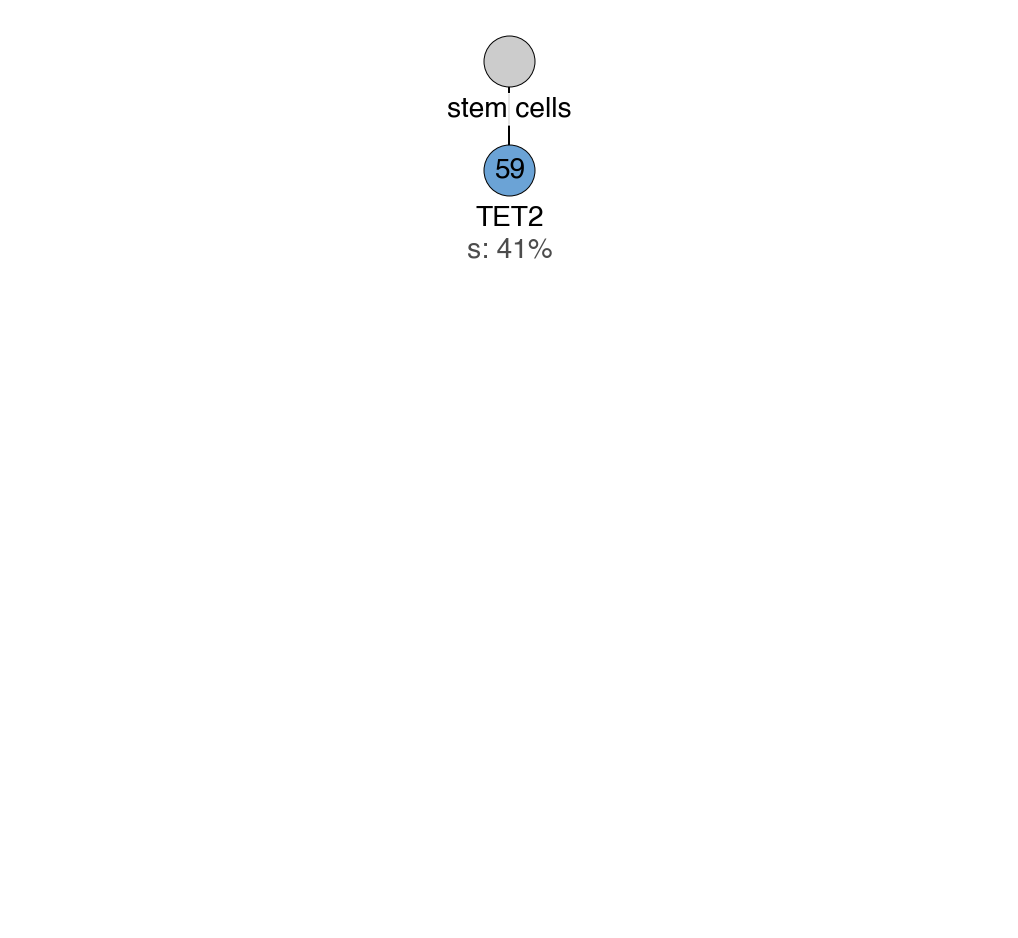

CNTRL_187
fittest variant =  GNB1_p.K57E


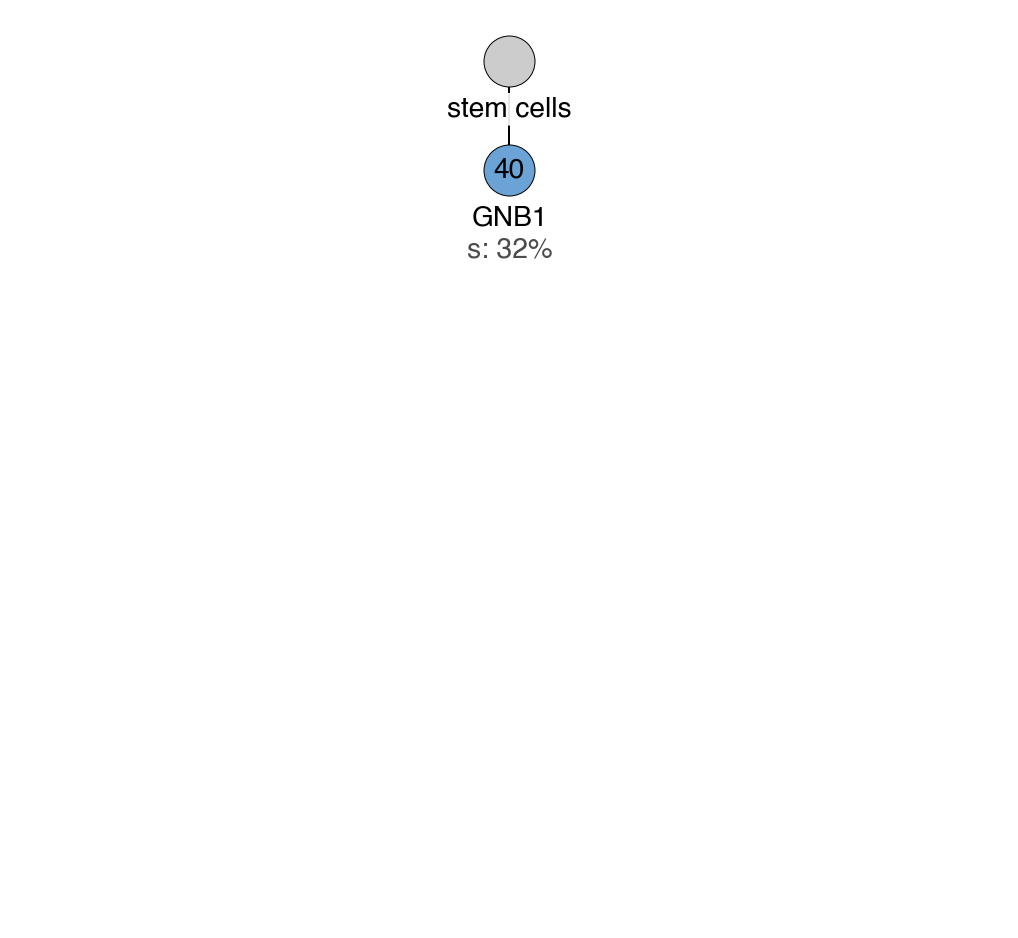

CNTRL_190
fittest variant =  TET2_p.N871Cfs*29


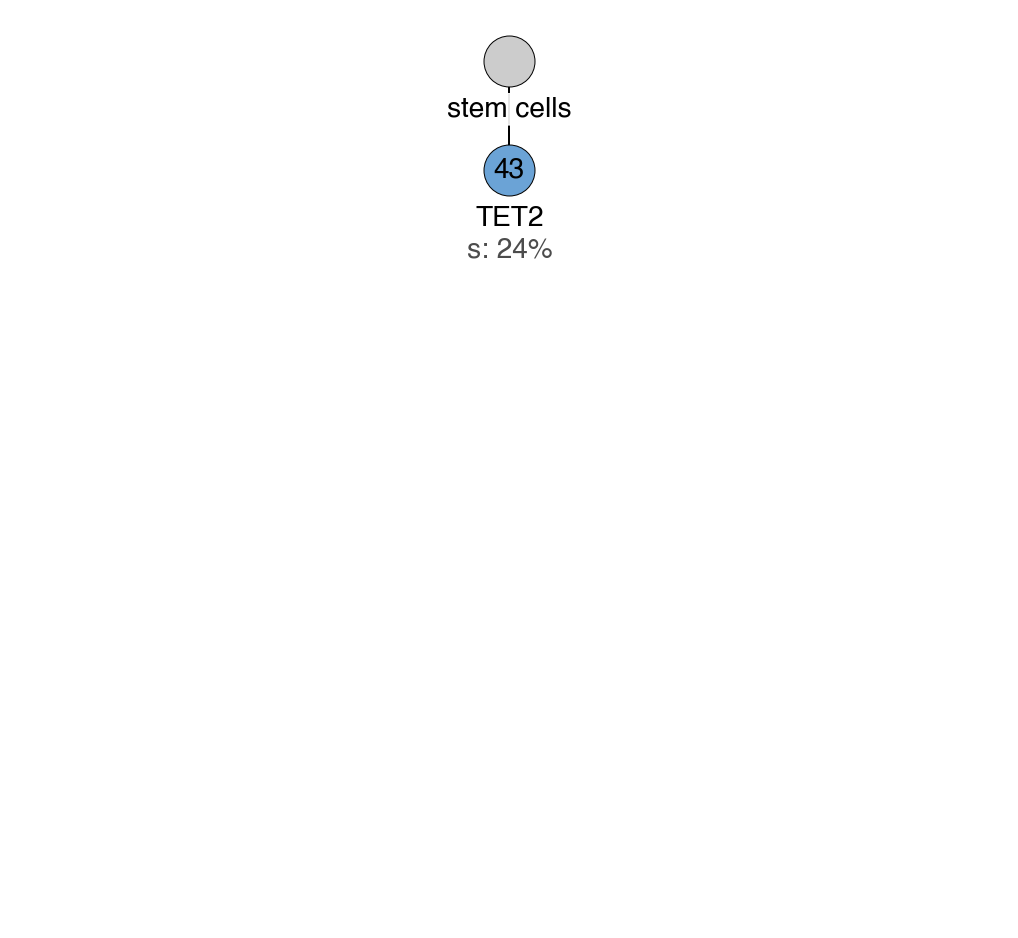

CNTRL_191
fittest variant =  DNMT3A_p.R635W


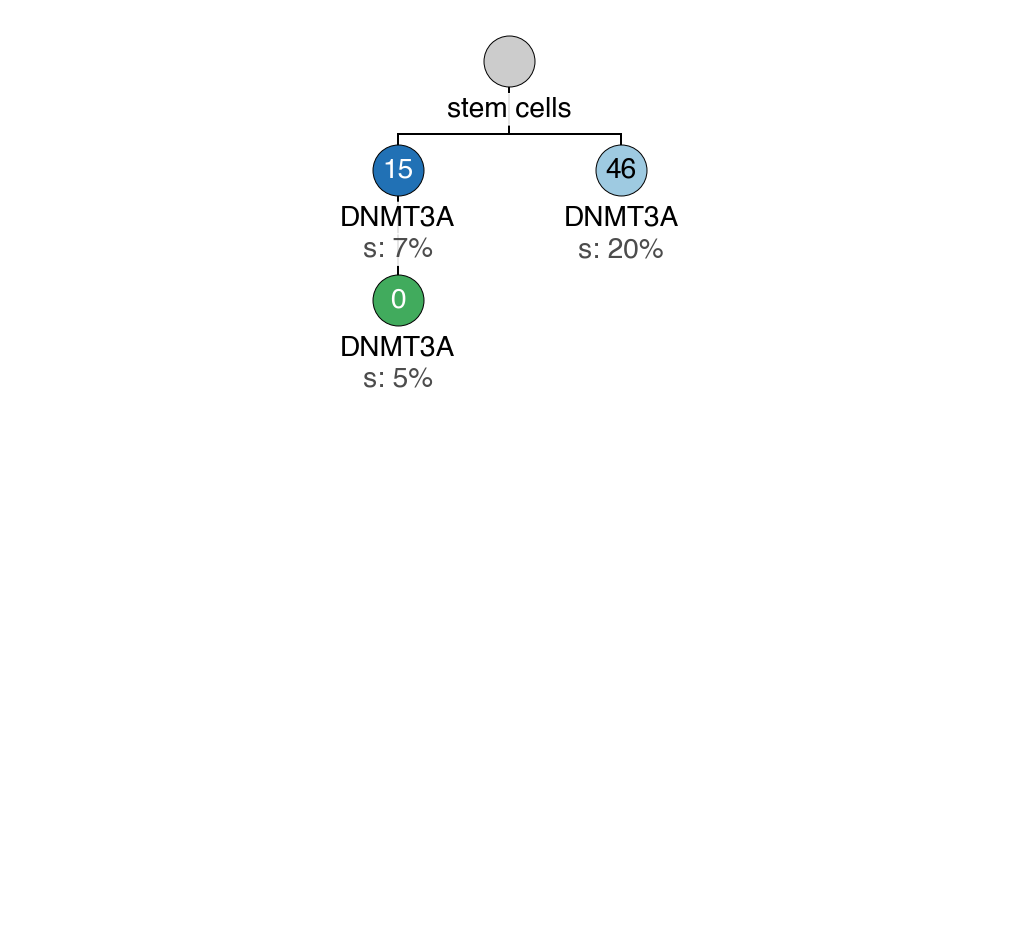

CNTRL_192
fittest variant =  DNMT3A_p.C562Y


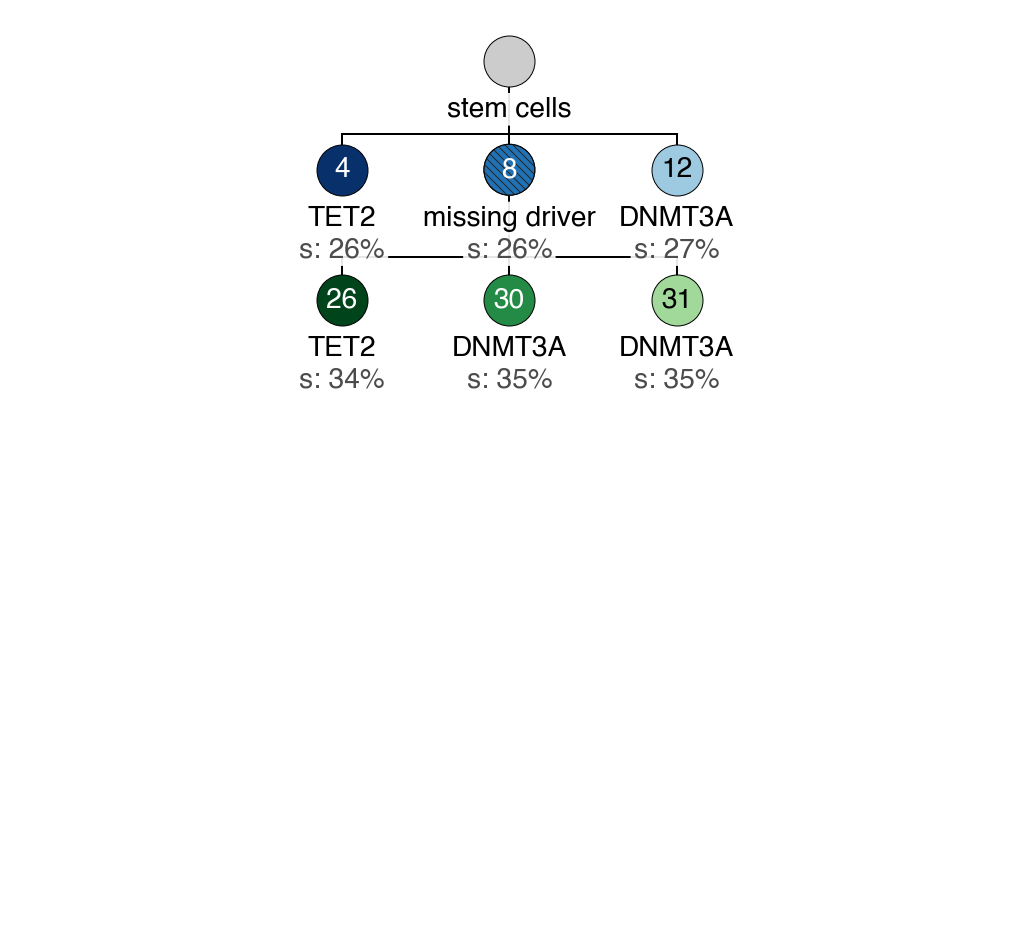

CNTRL_193
fittest variant =  DNMT3A_p.R882H


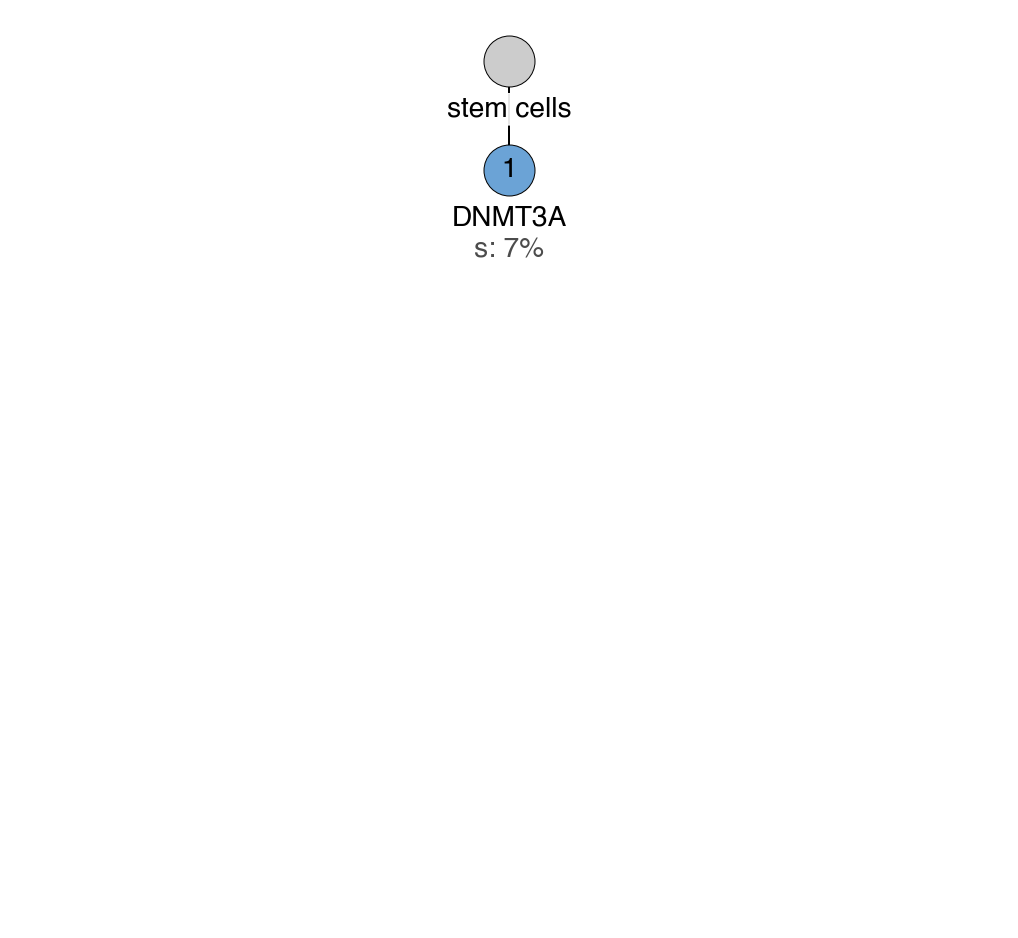

CNTRL_194
fittest variant =  GNB1_p.R48M


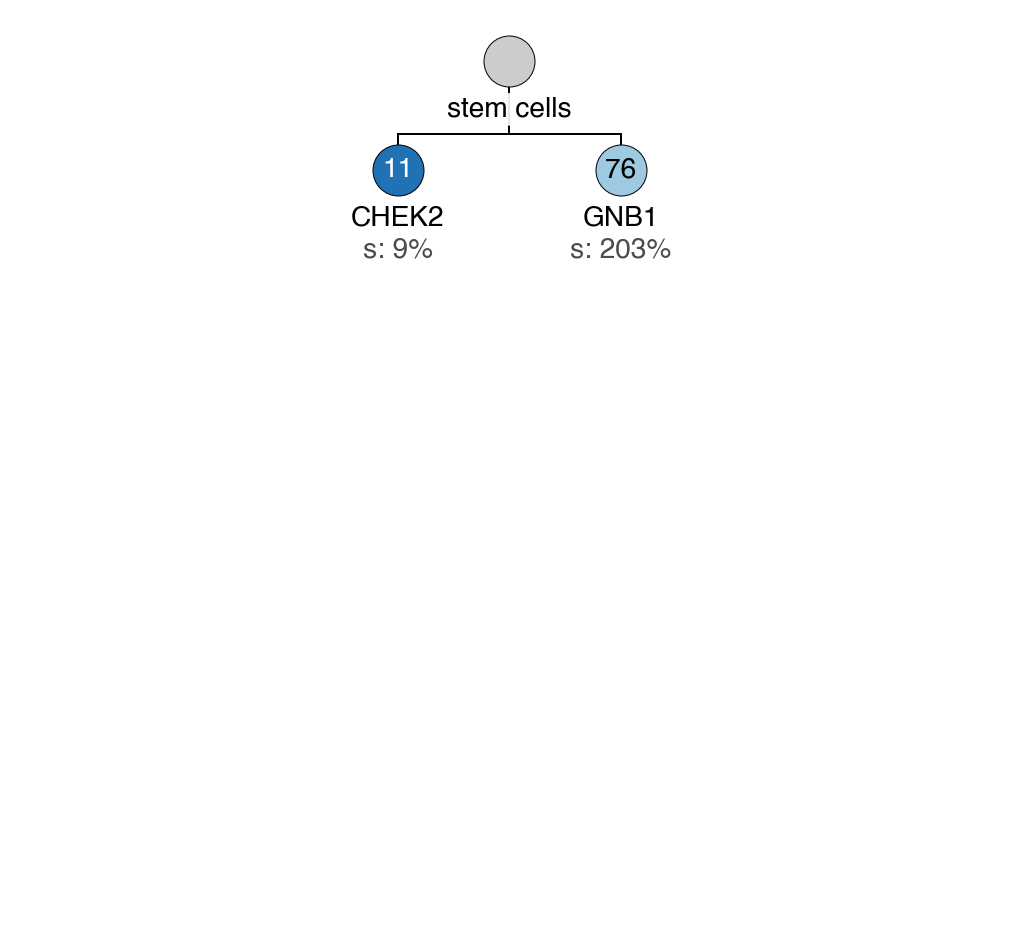

CNTRL_195
fittest variant =  DNMT3A_p.G699C


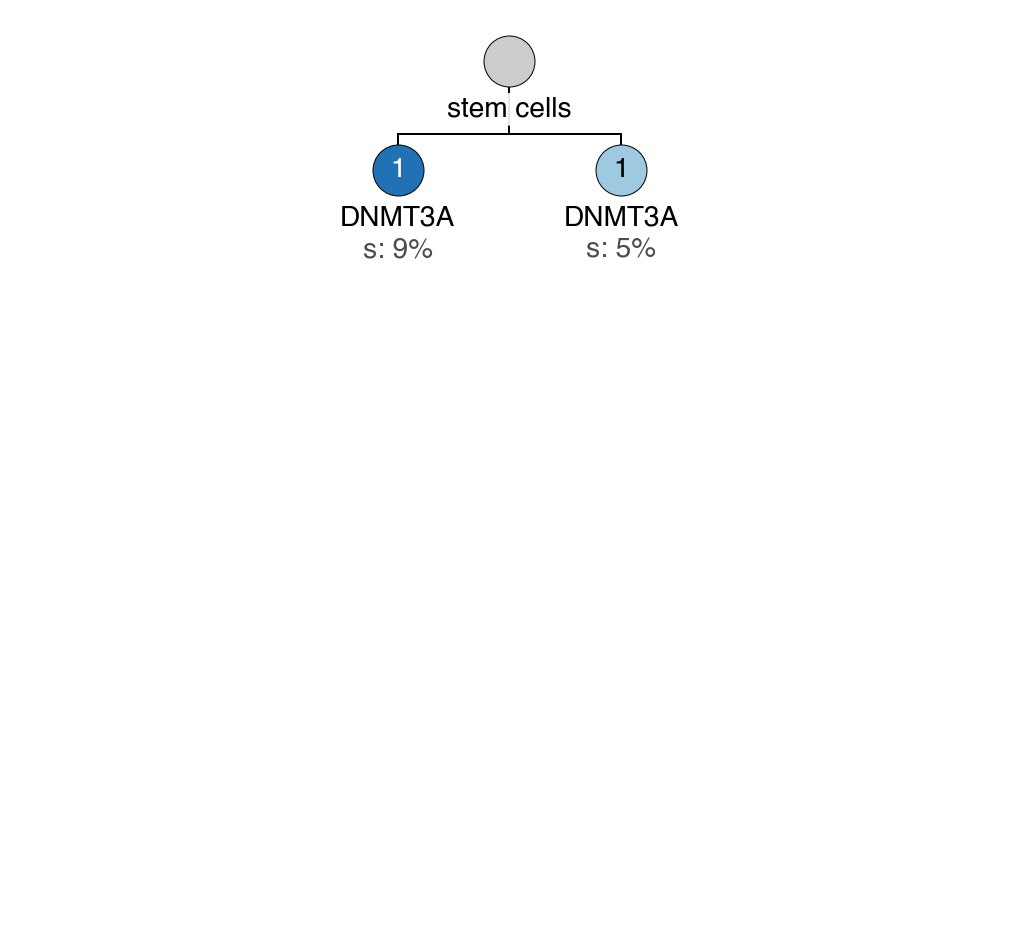

CNTRL_196
fittest variant =  DNMT3A_p.L738P


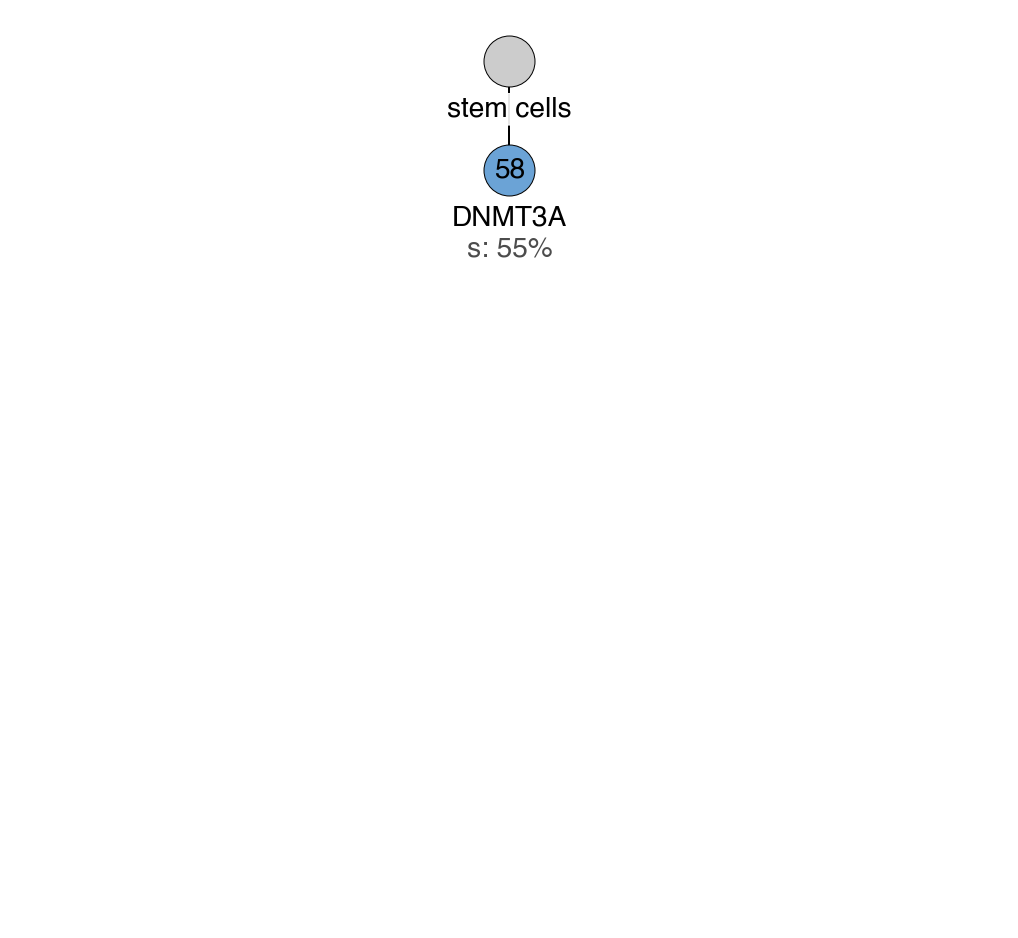

CNTRL_197
fittest variant =  TET2_p.I1873T


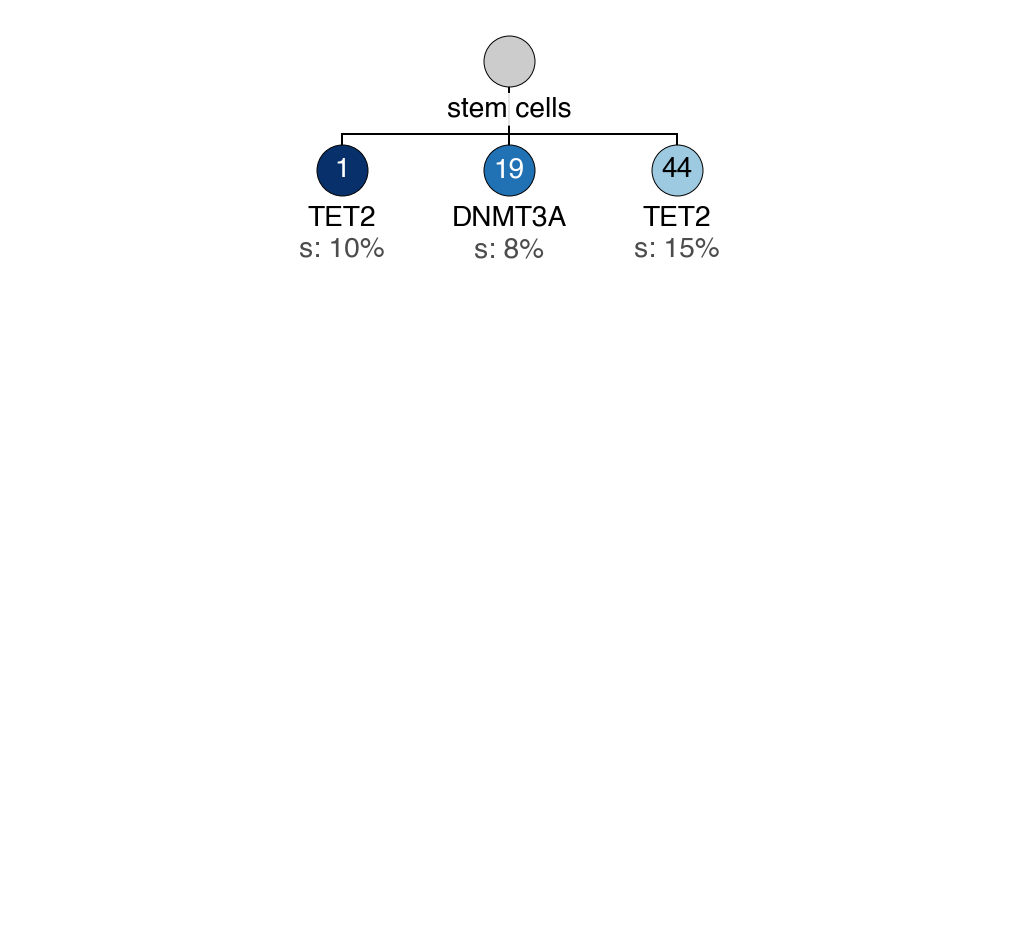

CNTRL_199
fittest variant =  DNMT3A_p.E342X


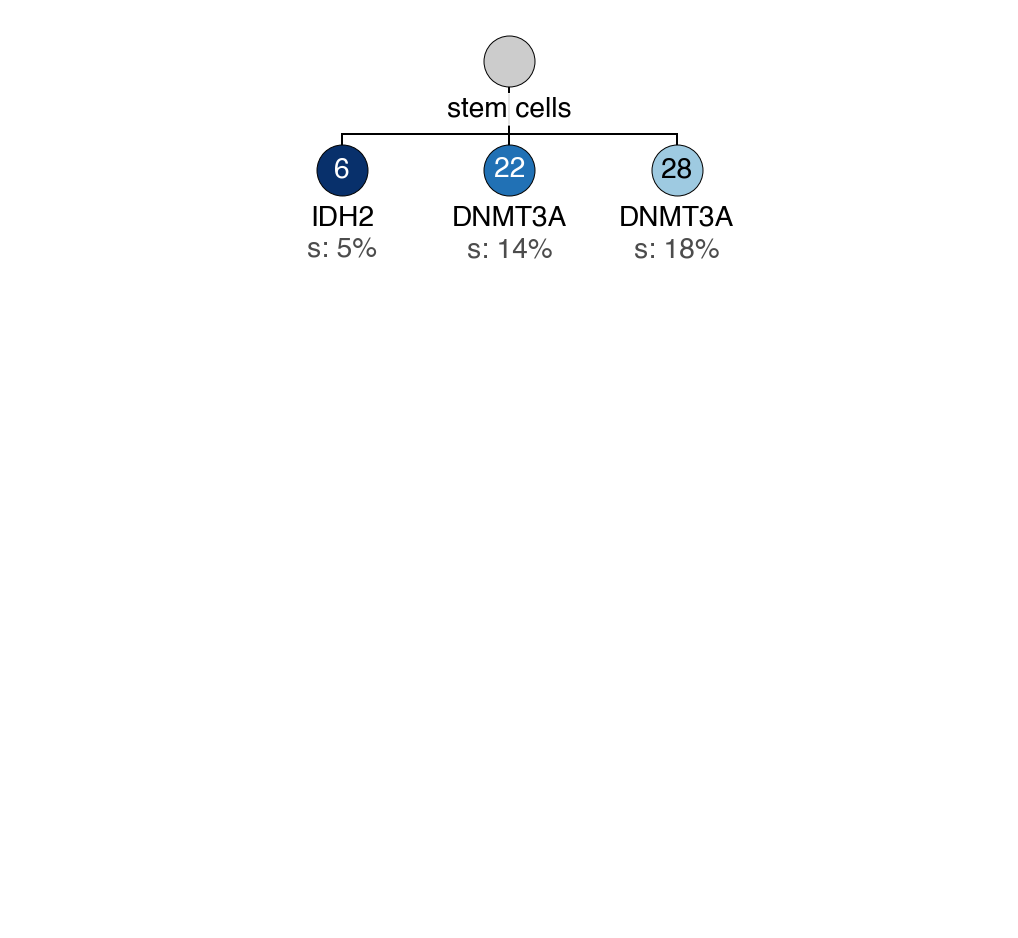

CNTRL_201
fittest variant =  X


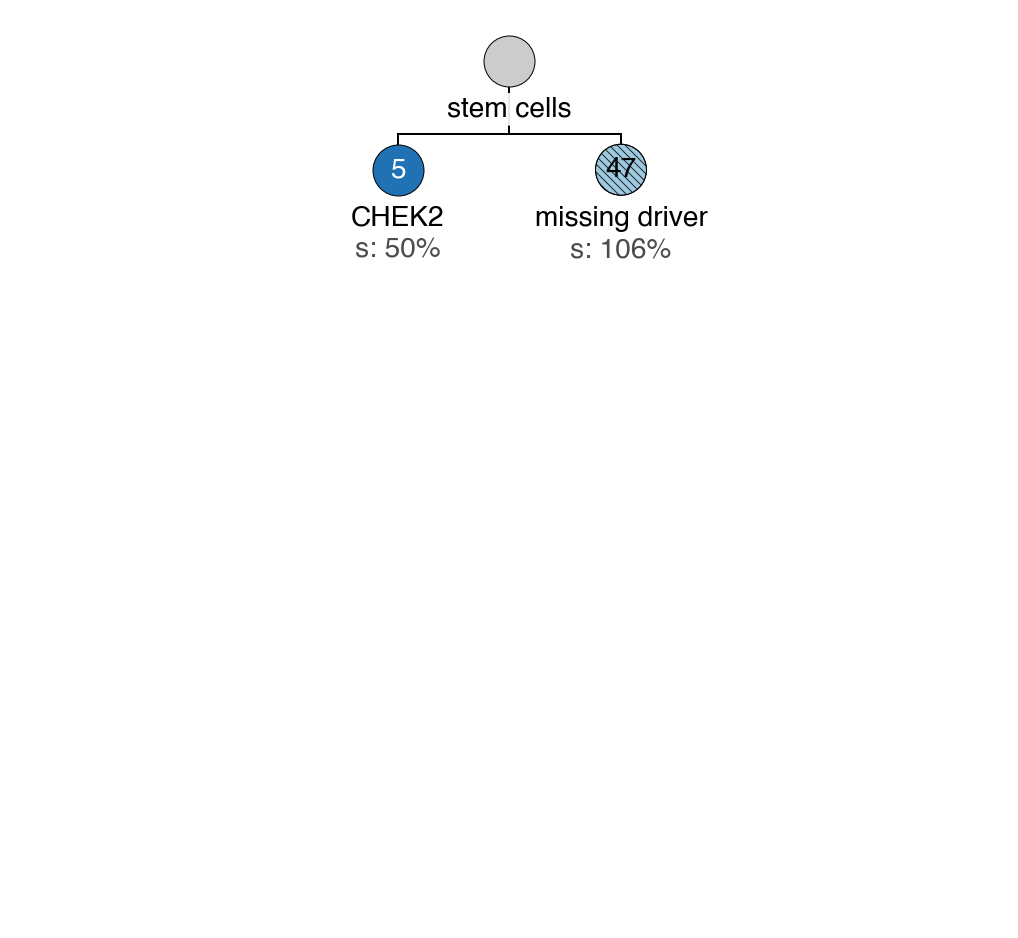

CNTRL_202
fittest variant =  TET2_p.T1884A


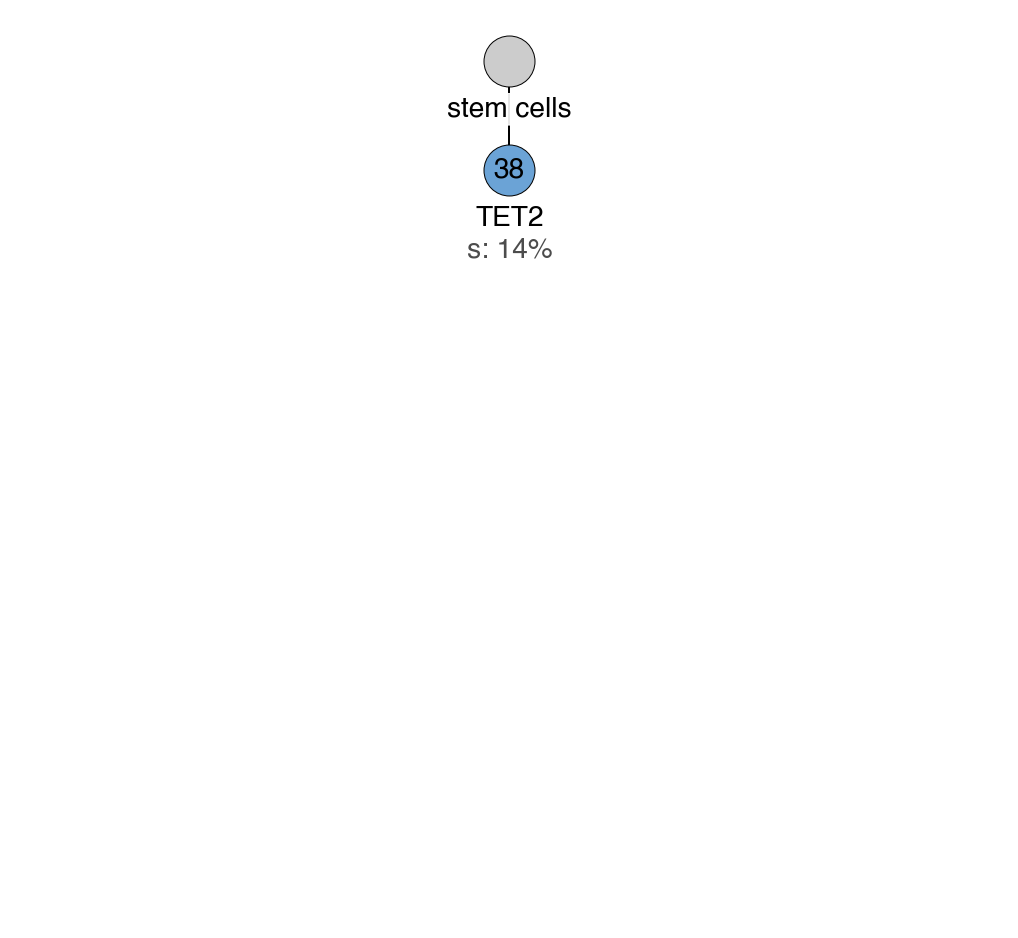

CNTRL_203
fittest variant =  KRAS_p.K117N


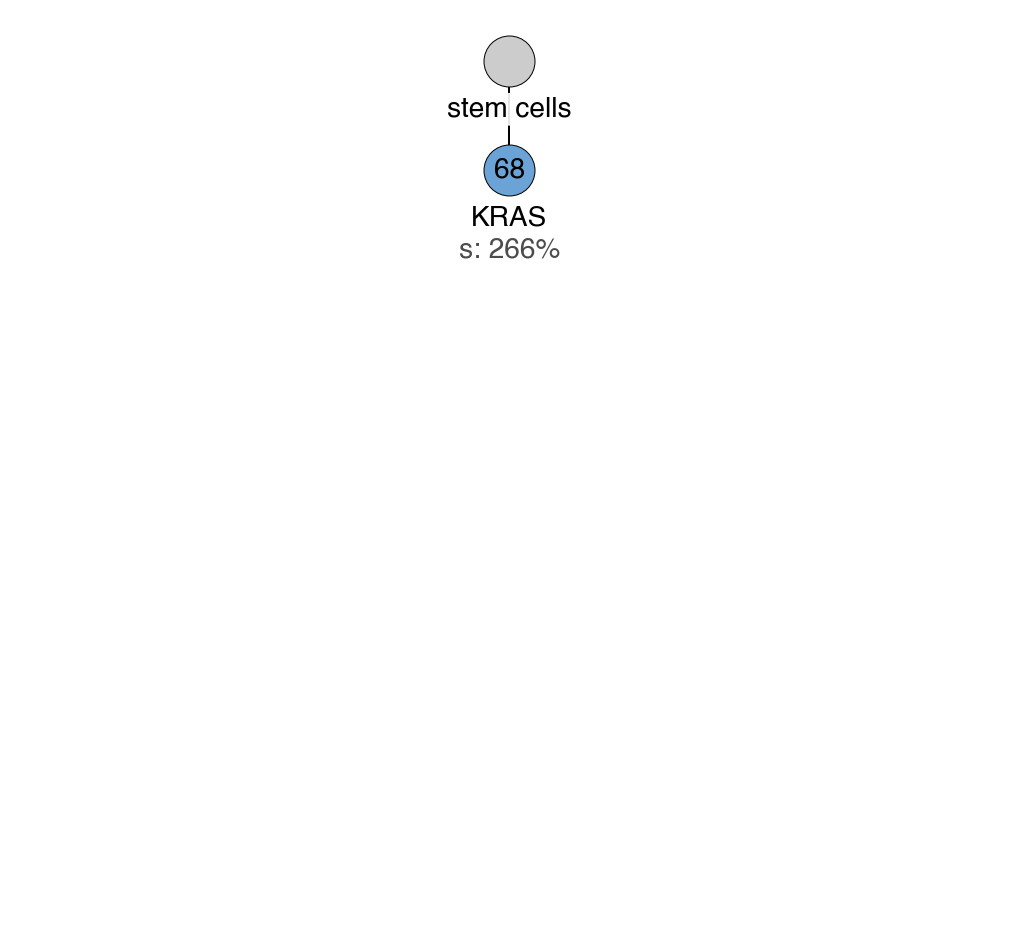

CNTRL_204
fittest variant =  DNMT3A_p.R882C


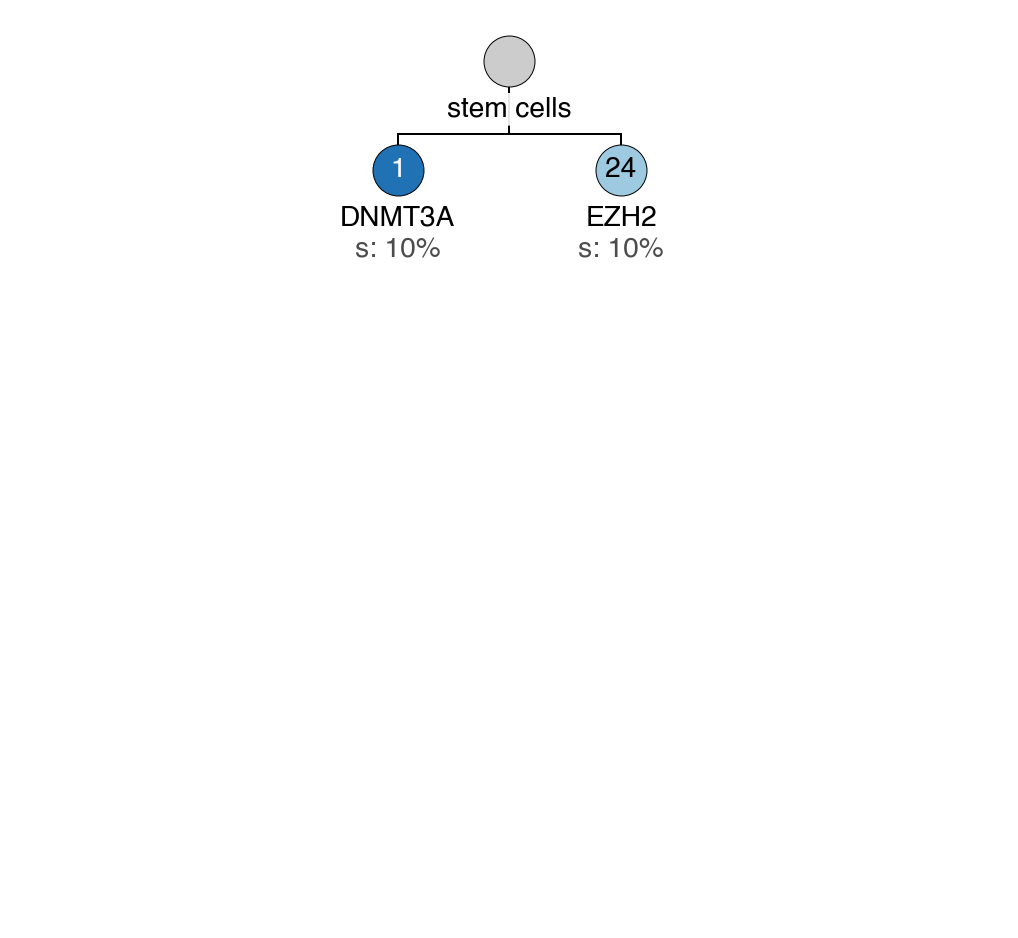

In [30]:
for control in controls.keys():
    if control not in ['CNTRL_003', 'CNTRL_161', 'CNTRL_165', 'CNTRL_170', 'CNTRL_171', 'CNTRL_174', 'CNTRL_177', 'CNTRL_181', 'CNTRL_188', 'CNTRL_189', 'CNTRL_198', 'CNTRL_200']: #these samples did not have detectable variants
        print(control)
        plot_phylogenies_v2(control, optimiser_df_d, dark_colors)